### Libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [30]:
df = pd.read_csv("C:\\Users\\AJIT\\Desktop\\Data science\\Hackathons\\previous hack\\L & T\\train.csv")
df_test = pd.read_csv("C:\\Users\\AJIT\\Desktop\\Data science\\Hackathons\\previous hack\\L & T\\test.csv")

In [31]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [32]:
df['Type']='Train'
df_test['Type']='Test'
data = pd.concat([df,df_test],axis=0)

C:\Users\AJIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
data.head()

,AVERAGE.ACCT.AGE,Aadhar_flag,CREDIT.HISTORY.LENGTH,Current_pincode_ID,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,Date.of.Birth,DisbursalDate,Driving_flag,Employee_code_ID,Employment.Type,...,Type,UniqueID,VoterID_flag,asset_cost,branch_id,disbursed_amount,loan_default,ltv,manufacturer_id,supplier_id
0,0yrs 0mon,1,0yrs 0mon,1441,0,01-01-84,03-08-18,0,1998,Salaried,...,Train,420825,0,58400,67,50578,0.0,89.55,45,22807
1,1yrs 11mon,1,1yrs 11mon,1502,1,31-07-85,26-09-18,0,1998,Self employed,...,Train,537409,0,65550,67,47145,1.0,73.23,45,22807
2,0yrs 0mon,1,0yrs 0mon,1497,0,24-08-85,01-08-18,0,1998,Self employed,...,Train,417566,0,61360,67,53278,0.0,89.63,45,22807
3,0yrs 8mon,1,1yrs 3mon,1501,0,30-12-93,26-10-18,0,1998,Self employed,...,Train,624493,0,66113,67,57513,1.0,88.48,45,22807
4,0yrs 0mon,1,0yrs 0mon,1495,0,09-12-77,26-09-18,0,1998,Self employed,...,Train,539055,0,60300,67,52378,1.0,88.39,45,22807


In [34]:
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()
data["Employment.Type"]=imputer.fit_transform(data["Employment.Type"])

In [35]:
Id_cols=["UniqueID"]
target_col = ["loan_default"]
cat_cols = ['AVERAGE.ACCT.AGE',
 'CREDIT.HISTORY.LENGTH',
 'Date.of.Birth',
 'DisbursalDate',
 'Employment.Type',
 'PERFORM_CNS.SCORE.DESCRIPTION']
other_col=['Type',"MobileNo_Avl_Flag"] #Test and Train Data set identifier
num_cols= list(set(list(data.columns))-set(cat_cols)-set(target_col)-set(other_col)-set(Id_cols))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E89D7642E8>,
      dtype=object)

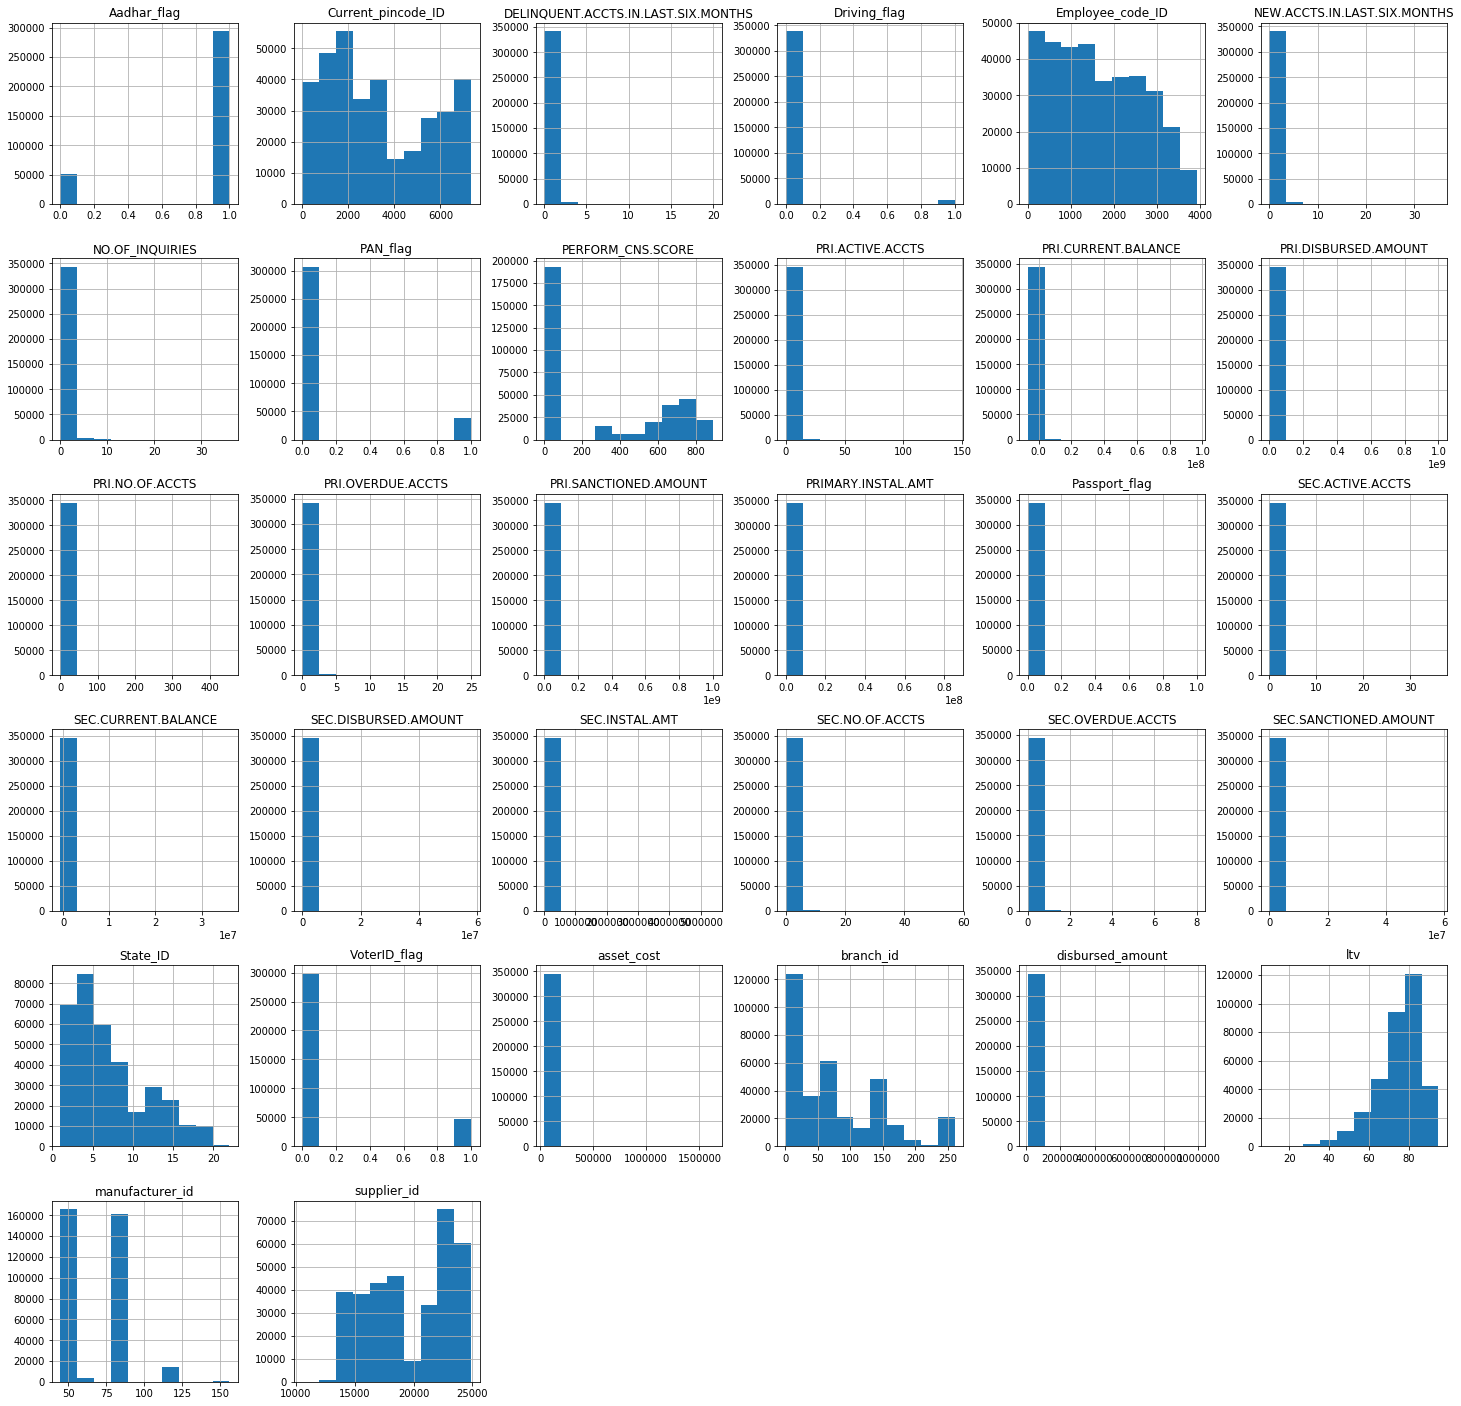

In [36]:
import matplotlib.pyplot as plt
data[num_cols].hist(figsize=[25,25])

In [37]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["AVERAGE.ACCT.AGE"] = labelencoder.fit_transform(data["AVERAGE.ACCT.AGE"])
data["CREDIT.HISTORY.LENGTH"] = labelencoder.fit_transform(data["CREDIT.HISTORY.LENGTH"])
data["Date.of.Birth"] = labelencoder.fit_transform(data["Date.of.Birth"])
data["DisbursalDate"] = labelencoder.fit_transform(data["DisbursalDate"])
data["Employment.Type"] = labelencoder.fit_transform(data["Employment.Type"])
data["PERFORM_CNS.SCORE.DESCRIPTION"] = labelencoder.fit_transform(data["PERFORM_CNS.SCORE.DESCRIPTION"])

In [38]:
data.head()

,AVERAGE.ACCT.AGE,Aadhar_flag,CREDIT.HISTORY.LENGTH,Current_pincode_ID,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,Date.of.Birth,DisbursalDate,Driving_flag,Employee_code_ID,Employment.Type,...,Type,UniqueID,VoterID_flag,asset_cost,branch_id,disbursed_amount,loan_default,ltv,manufacturer_id,supplier_id
0,0,1,0,1441,0,30,2,0,1998,0,...,Train,420825,0,58400,67,50578,0.0,89.55,45,22807
1,90,1,132,1502,1,15744,90,0,1998,1,...,Train,537409,0,65550,67,47145,1.0,73.23,45,22807
2,0,1,0,1497,0,12399,0,0,1998,1,...,Train,417566,0,61360,67,53278,0.0,89.63,45,22807
3,10,1,135,1501,0,15581,91,0,1998,1,...,Train,624493,0,66113,67,57513,1.0,88.48,45,22807
4,0,1,0,1495,0,4755,90,0,1998,1,...,Train,539055,0,60300,67,52378,1.0,88.39,45,22807


In [39]:
number = LabelEncoder()
#Target variable is also a categorical so convert it
data["loan_default"] = number.fit_transform(data["loan_default"].astype('str'))

train=data[data['Type']=='Train']
test=data[data['Type']=='Test']

train['is_train'] = np.random.uniform(0, 1, len(train)) <= .75
Train, Validate = train[train['is_train']==True], train[train['is_train']==False]

C:\Users\AJIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
data.head()

,AVERAGE.ACCT.AGE,Aadhar_flag,CREDIT.HISTORY.LENGTH,Current_pincode_ID,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,Date.of.Birth,DisbursalDate,Driving_flag,Employee_code_ID,Employment.Type,...,Type,UniqueID,VoterID_flag,asset_cost,branch_id,disbursed_amount,loan_default,ltv,manufacturer_id,supplier_id
0,0,1,0,1441,0,30,2,0,1998,0,...,Train,420825,0,58400,67,50578,0,89.55,45,22807
1,90,1,132,1502,1,15744,90,0,1998,1,...,Train,537409,0,65550,67,47145,1,73.23,45,22807
2,0,1,0,1497,0,12399,0,0,1998,1,...,Train,417566,0,61360,67,53278,0,89.63,45,22807
3,10,1,135,1501,0,15581,91,0,1998,1,...,Train,624493,0,66113,67,57513,1,88.48,45,22807
4,0,1,0,1495,0,4755,90,0,1998,1,...,Train,539055,0,60300,67,52378,1,88.39,45,22807


In [41]:
features=list(set(list(data.columns))-set(Id_cols)-set(target_col)-set(other_col))

In [42]:
x_train = Train[list(features)]
y_train = Train["loan_default"]
x_validate = Validate[list(features)]
y_validate = Validate["loan_default"]
x_test=test[list(features)]

In [43]:
x_train.head()

,VoterID_flag,branch_id,NEW.ACCTS.IN.LAST.SIX.MONTHS,PERFORM_CNS.SCORE.DESCRIPTION,disbursed_amount,SEC.NO.OF.ACCTS,asset_cost,AVERAGE.ACCT.AGE,Driving_flag,SEC.SANCTIONED.AMOUNT,...,PRI.DISBURSED.AMOUNT,PRI.ACTIVE.ACCTS,DisbursalDate,Date.of.Birth,PERFORM_CNS.SCORE,PRI.OVERDUE.ACCTS,SEC.DISBURSED.AMOUNT,PRI.SANCTIONED.AMOUNT,Passport_flag,PRIMARY.INSTAL.AMT
1,0,67,0,8,47145,0,65550,90,0,0,...,50200,1,90,15744,598,1,0,50200,0,1991
3,0,67,0,11,57513,0,66113,10,0,0,...,0,0,91,15581,305,0,0,0,0,31
4,0,67,0,13,52378,0,60300,0,0,0,...,0,0,90,4755,0,0,0,0,0,0
5,0,67,0,0,54513,0,61900,99,0,0,...,0,0,62,4120,825,0,0,0,0,1347
6,0,67,0,13,46349,0,61500,0,0,0,...,0,0,78,265,0,0,0,0,0,0


### Random Forest

In [41]:
random.seed(100)
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train, y_train)
probs = rf.predict_proba(x_validate)
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_validate, probs)
print('AUC: %.3f' % auc)

AUC: 0.643


In [105]:
final_status = rf.predict_proba(x_test)
df_test["loan_default"]=final_status[:,1]
df_test.to_csv('rf.csv',columns=['UniqueID','loan_default'])

### GBM

In [152]:
gbm= GradientBoostingClassifier()
gbm.fit(x_train,y_train)
probs = gbm.predict_proba(x_validate)
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_validate, probs)
print('AUC: %.3f' % auc)

AUC: 0.659


In [153]:
from sklearn.model_selection import GridSearchCV
gbm1 = GradientBoostingClassifier()
param_grid = {"n_estimators":[500]}
gbm_gscv = GridSearchCV(gbm1, param_grid, cv=5)
gbm_gscv.fit(x_train, y_train)
probs = gbm_gscv.predict_proba(x_validate)
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_validate, probs)
print('AUC: %.3f' % auc)

KeyboardInterrupt: 

In [ ]:
final_status = gbm_gscv.predict_proba(x_test)
df_test["loan_default"]=final_status[:,1]
df_test.to_csv("gbm_gscv.csv",columns=['UniqueID','loan_default'])

### Ada Boost

In [22]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
probs = ada.predict_proba(x_validate)
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_validate, probs)
print('AUC: %.3f' % auc)

AUC: 0.645


### Light GBM

In [96]:
import lightgbm as lgb
lg = lgb.LGBMClassifier(silent=False)
lg.fit(x_train,y_train)
probs = lg.predict_proba(x_validate)
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_validate, probs)
print('AUC: %.3f' % auc)

AUC: 0.664


In [115]:
from sklearn.model_selection import GridSearchCV
lg1 = lgb.LGBMClassifier(silent=False)
param_grid = {"n_estimators":[500]}
lg_gscv = GridSearchCV(lg1, param_grid, cv=5)
lg_gscv.fit(x_train, y_train)
probs = lg_gscv.predict_proba(x_validate)
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_validate, probs)
print('AUC: %.3f' % auc)

AUC: 0.663


### Xg Boost

In [24]:
import xgboost as xgb
xg=xgb.XGBClassifier()
xg.fit(x_train, y_train)
probs = xg.predict_proba(x_validate)
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_validate, probs)
print('AUC: %.3f' % auc)

AUC: 0.655


### Cat Boost

In [44]:
import catboost as cb
clf = cb.CatBoostClassifier(iterations=10000)
clf.fit(x_train,y_train)
probs = clf.predict_proba(x_validate)
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_validate, probs)
print('AUC: %.3f' % auc)

Learning rate set to 0.009284
0:	learn: 0.6894639	total: 174ms	remaining: 28m 57s
1:	learn: 0.6859483	total: 342ms	remaining: 28m 28s
2:	learn: 0.6824538	total: 497ms	remaining: 27m 35s
3:	learn: 0.6789606	total: 642ms	remaining: 26m 45s
4:	learn: 0.6756619	total: 846ms	remaining: 28m 12s
5:	learn: 0.6723126	total: 1s	remaining: 27m 55s
6:	learn: 0.6690646	total: 1.18s	remaining: 27m 57s
7:	learn: 0.6658697	total: 1.42s	remaining: 29m 32s
8:	learn: 0.6627743	total: 1.55s	remaining: 28m 37s
9:	learn: 0.6597523	total: 1.7s	remaining: 28m 14s
10:	learn: 0.6567620	total: 1.86s	remaining: 28m 8s
11:	learn: 0.6538207	total: 2.02s	remaining: 28m 4s
12:	learn: 0.6510524	total: 2.15s	remaining: 27m 35s
13:	learn: 0.6481977	total: 2.29s	remaining: 27m 14s
14:	learn: 0.6455548	total: 2.41s	remaining: 26m 46s
15:	learn: 0.6429038	total: 2.57s	remaining: 26m 45s
16:	learn: 0.6402490	total: 2.71s	remaining: 26m 32s
17:	learn: 0.6376675	total: 2.88s	remaining: 26m 35s
18:	learn: 0.6351085	total: 3.03

155:	learn: 0.5146006	total: 20s	remaining: 21m 3s
156:	learn: 0.5144051	total: 20.1s	remaining: 21m 2s
157:	learn: 0.5142150	total: 20.3s	remaining: 21m 1s
158:	learn: 0.5140056	total: 20.4s	remaining: 21m
159:	learn: 0.5138242	total: 20.5s	remaining: 20m 59s
160:	learn: 0.5136314	total: 20.6s	remaining: 20m 58s
161:	learn: 0.5134377	total: 20.7s	remaining: 20m 58s
162:	learn: 0.5132745	total: 20.8s	remaining: 20m 56s
163:	learn: 0.5130978	total: 20.9s	remaining: 20m 55s
164:	learn: 0.5129165	total: 21s	remaining: 20m 54s
165:	learn: 0.5127713	total: 21.2s	remaining: 20m 54s
166:	learn: 0.5125999	total: 21.3s	remaining: 20m 53s
167:	learn: 0.5124249	total: 21.4s	remaining: 20m 52s
168:	learn: 0.5122564	total: 21.5s	remaining: 20m 51s
169:	learn: 0.5120950	total: 21.6s	remaining: 20m 50s
170:	learn: 0.5119498	total: 21.7s	remaining: 20m 50s
171:	learn: 0.5117909	total: 21.9s	remaining: 20m 50s
172:	learn: 0.5116245	total: 22s	remaining: 20m 49s
173:	learn: 0.5114800	total: 22.1s	remain

309:	learn: 0.5012167	total: 38s	remaining: 19m 48s
310:	learn: 0.5011842	total: 38.1s	remaining: 19m 48s
311:	learn: 0.5011463	total: 38.3s	remaining: 19m 47s
312:	learn: 0.5011164	total: 38.4s	remaining: 19m 47s
313:	learn: 0.5010800	total: 38.5s	remaining: 19m 47s
314:	learn: 0.5010468	total: 38.6s	remaining: 19m 46s
315:	learn: 0.5010126	total: 38.7s	remaining: 19m 46s
316:	learn: 0.5009726	total: 38.8s	remaining: 19m 45s
317:	learn: 0.5009403	total: 38.9s	remaining: 19m 45s
318:	learn: 0.5009080	total: 39.1s	remaining: 19m 45s
319:	learn: 0.5008758	total: 39.2s	remaining: 19m 44s
320:	learn: 0.5008393	total: 39.3s	remaining: 19m 44s
321:	learn: 0.5008123	total: 39.4s	remaining: 19m 44s
322:	learn: 0.5007797	total: 39.5s	remaining: 19m 44s
323:	learn: 0.5007511	total: 39.6s	remaining: 19m 44s
324:	learn: 0.5007206	total: 39.8s	remaining: 19m 43s
325:	learn: 0.5006902	total: 39.9s	remaining: 19m 43s
326:	learn: 0.5006609	total: 40s	remaining: 19m 43s
327:	learn: 0.5006281	total: 40.

463:	learn: 0.4977293	total: 55.9s	remaining: 19m 9s
464:	learn: 0.4977118	total: 56.1s	remaining: 19m 9s
465:	learn: 0.4976925	total: 56.2s	remaining: 19m 9s
466:	learn: 0.4976762	total: 56.3s	remaining: 19m 8s
467:	learn: 0.4976600	total: 56.4s	remaining: 19m 8s
468:	learn: 0.4976421	total: 56.5s	remaining: 19m 8s
469:	learn: 0.4976241	total: 56.6s	remaining: 19m 8s
470:	learn: 0.4976104	total: 56.8s	remaining: 19m 8s
471:	learn: 0.4975963	total: 56.9s	remaining: 19m 8s
472:	learn: 0.4975822	total: 57s	remaining: 19m 7s
473:	learn: 0.4975675	total: 57.1s	remaining: 19m 7s
474:	learn: 0.4975469	total: 57.2s	remaining: 19m 7s
475:	learn: 0.4975269	total: 57.4s	remaining: 19m 7s
476:	learn: 0.4975141	total: 57.5s	remaining: 19m 7s
477:	learn: 0.4975002	total: 57.6s	remaining: 19m 7s
478:	learn: 0.4974890	total: 57.7s	remaining: 19m 6s
479:	learn: 0.4974766	total: 57.8s	remaining: 19m 6s
480:	learn: 0.4974547	total: 57.9s	remaining: 19m 6s
481:	learn: 0.4974420	total: 58.1s	remaining: 19

617:	learn: 0.4957479	total: 1m 16s	remaining: 19m 26s
618:	learn: 0.4957384	total: 1m 16s	remaining: 19m 26s
619:	learn: 0.4957307	total: 1m 17s	remaining: 19m 26s
620:	learn: 0.4957208	total: 1m 17s	remaining: 19m 26s
621:	learn: 0.4957133	total: 1m 17s	remaining: 19m 26s
622:	learn: 0.4957025	total: 1m 17s	remaining: 19m 25s
623:	learn: 0.4956906	total: 1m 17s	remaining: 19m 25s
624:	learn: 0.4956773	total: 1m 17s	remaining: 19m 25s
625:	learn: 0.4956649	total: 1m 17s	remaining: 19m 25s
626:	learn: 0.4956551	total: 1m 17s	remaining: 19m 25s
627:	learn: 0.4956435	total: 1m 18s	remaining: 19m 25s
628:	learn: 0.4956296	total: 1m 18s	remaining: 19m 25s
629:	learn: 0.4956194	total: 1m 18s	remaining: 19m 24s
630:	learn: 0.4956080	total: 1m 18s	remaining: 19m 24s
631:	learn: 0.4955959	total: 1m 18s	remaining: 19m 24s
632:	learn: 0.4955817	total: 1m 18s	remaining: 19m 24s
633:	learn: 0.4955733	total: 1m 18s	remaining: 19m 23s
634:	learn: 0.4955668	total: 1m 18s	remaining: 19m 23s
635:	learn

769:	learn: 0.4943272	total: 1m 34s	remaining: 18m 56s
770:	learn: 0.4943196	total: 1m 34s	remaining: 18m 56s
771:	learn: 0.4943143	total: 1m 35s	remaining: 18m 56s
772:	learn: 0.4943065	total: 1m 35s	remaining: 18m 55s
773:	learn: 0.4943021	total: 1m 35s	remaining: 18m 55s
774:	learn: 0.4942945	total: 1m 35s	remaining: 18m 55s
775:	learn: 0.4942878	total: 1m 35s	remaining: 18m 54s
776:	learn: 0.4942785	total: 1m 35s	remaining: 18m 54s
777:	learn: 0.4942641	total: 1m 35s	remaining: 18m 54s
778:	learn: 0.4942570	total: 1m 35s	remaining: 18m 54s
779:	learn: 0.4942508	total: 1m 35s	remaining: 18m 54s
780:	learn: 0.4942455	total: 1m 36s	remaining: 18m 53s
781:	learn: 0.4942392	total: 1m 36s	remaining: 18m 53s
782:	learn: 0.4942320	total: 1m 36s	remaining: 18m 53s
783:	learn: 0.4942238	total: 1m 36s	remaining: 18m 53s
784:	learn: 0.4942134	total: 1m 36s	remaining: 18m 52s
785:	learn: 0.4942078	total: 1m 36s	remaining: 18m 52s
786:	learn: 0.4942016	total: 1m 36s	remaining: 18m 52s
787:	learn

918:	learn: 0.4932263	total: 1m 52s	remaining: 18m 28s
919:	learn: 0.4932213	total: 1m 52s	remaining: 18m 27s
920:	learn: 0.4932152	total: 1m 52s	remaining: 18m 27s
921:	learn: 0.4932065	total: 1m 52s	remaining: 18m 27s
922:	learn: 0.4931988	total: 1m 52s	remaining: 18m 27s
923:	learn: 0.4931892	total: 1m 52s	remaining: 18m 27s
924:	learn: 0.4931836	total: 1m 52s	remaining: 18m 26s
925:	learn: 0.4931782	total: 1m 52s	remaining: 18m 26s
926:	learn: 0.4931692	total: 1m 53s	remaining: 18m 26s
927:	learn: 0.4931598	total: 1m 53s	remaining: 18m 26s
928:	learn: 0.4931546	total: 1m 53s	remaining: 18m 26s
929:	learn: 0.4931491	total: 1m 53s	remaining: 18m 25s
930:	learn: 0.4931427	total: 1m 53s	remaining: 18m 25s
931:	learn: 0.4931354	total: 1m 53s	remaining: 18m 25s
932:	learn: 0.4931303	total: 1m 53s	remaining: 18m 25s
933:	learn: 0.4931240	total: 1m 53s	remaining: 18m 24s
934:	learn: 0.4931194	total: 1m 53s	remaining: 18m 24s
935:	learn: 0.4931117	total: 1m 54s	remaining: 18m 24s
936:	learn

1070:	learn: 0.4922164	total: 2m 10s	remaining: 18m 5s
1071:	learn: 0.4922117	total: 2m 10s	remaining: 18m 5s
1072:	learn: 0.4922056	total: 2m 10s	remaining: 18m 5s
1073:	learn: 0.4922008	total: 2m 10s	remaining: 18m 5s
1074:	learn: 0.4921911	total: 2m 10s	remaining: 18m 5s
1075:	learn: 0.4921825	total: 2m 10s	remaining: 18m 4s
1076:	learn: 0.4921776	total: 2m 10s	remaining: 18m 4s
1077:	learn: 0.4921713	total: 2m 11s	remaining: 18m 4s
1078:	learn: 0.4921658	total: 2m 11s	remaining: 18m 4s
1079:	learn: 0.4921621	total: 2m 11s	remaining: 18m 4s
1080:	learn: 0.4921551	total: 2m 11s	remaining: 18m 3s
1081:	learn: 0.4921478	total: 2m 11s	remaining: 18m 3s
1082:	learn: 0.4921417	total: 2m 11s	remaining: 18m 3s
1083:	learn: 0.4921342	total: 2m 11s	remaining: 18m 3s
1084:	learn: 0.4921256	total: 2m 11s	remaining: 18m 3s
1085:	learn: 0.4921174	total: 2m 11s	remaining: 18m 3s
1086:	learn: 0.4921127	total: 2m 12s	remaining: 18m 2s
1087:	learn: 0.4921079	total: 2m 12s	remaining: 18m 2s
1088:	lear

1218:	learn: 0.4913476	total: 2m 27s	remaining: 17m 40s
1219:	learn: 0.4913418	total: 2m 27s	remaining: 17m 40s
1220:	learn: 0.4913358	total: 2m 27s	remaining: 17m 40s
1221:	learn: 0.4913301	total: 2m 27s	remaining: 17m 40s
1222:	learn: 0.4913259	total: 2m 27s	remaining: 17m 40s
1223:	learn: 0.4913203	total: 2m 27s	remaining: 17m 39s
1224:	learn: 0.4913128	total: 2m 27s	remaining: 17m 39s
1225:	learn: 0.4913041	total: 2m 28s	remaining: 17m 39s
1226:	learn: 0.4912919	total: 2m 28s	remaining: 17m 39s
1227:	learn: 0.4912856	total: 2m 28s	remaining: 17m 39s
1228:	learn: 0.4912779	total: 2m 28s	remaining: 17m 38s
1229:	learn: 0.4912671	total: 2m 28s	remaining: 17m 38s
1230:	learn: 0.4912627	total: 2m 28s	remaining: 17m 38s
1231:	learn: 0.4912541	total: 2m 28s	remaining: 17m 38s
1232:	learn: 0.4912475	total: 2m 28s	remaining: 17m 38s
1233:	learn: 0.4912433	total: 2m 28s	remaining: 17m 37s
1234:	learn: 0.4912382	total: 2m 29s	remaining: 17m 37s
1235:	learn: 0.4912354	total: 2m 29s	remaining: 

1366:	learn: 0.4904993	total: 2m 43s	remaining: 17m 15s
1367:	learn: 0.4904962	total: 2m 44s	remaining: 17m 15s
1368:	learn: 0.4904882	total: 2m 44s	remaining: 17m 15s
1369:	learn: 0.4904821	total: 2m 44s	remaining: 17m 14s
1370:	learn: 0.4904783	total: 2m 44s	remaining: 17m 14s
1371:	learn: 0.4904732	total: 2m 44s	remaining: 17m 14s
1372:	learn: 0.4904687	total: 2m 44s	remaining: 17m 14s
1373:	learn: 0.4904649	total: 2m 44s	remaining: 17m 14s
1374:	learn: 0.4904579	total: 2m 44s	remaining: 17m 13s
1375:	learn: 0.4904492	total: 2m 44s	remaining: 17m 13s
1376:	learn: 0.4904422	total: 2m 45s	remaining: 17m 13s
1377:	learn: 0.4904379	total: 2m 45s	remaining: 17m 13s
1378:	learn: 0.4904332	total: 2m 45s	remaining: 17m 13s
1379:	learn: 0.4904267	total: 2m 45s	remaining: 17m 13s
1380:	learn: 0.4904182	total: 2m 45s	remaining: 17m 13s
1381:	learn: 0.4904100	total: 2m 45s	remaining: 17m 12s
1382:	learn: 0.4904054	total: 2m 45s	remaining: 17m 12s
1383:	learn: 0.4903979	total: 2m 45s	remaining: 

1516:	learn: 0.4896248	total: 3m	remaining: 16m 51s
1517:	learn: 0.4896199	total: 3m	remaining: 16m 51s
1518:	learn: 0.4896148	total: 3m 1s	remaining: 16m 51s
1519:	learn: 0.4896090	total: 3m 1s	remaining: 16m 50s
1520:	learn: 0.4896039	total: 3m 1s	remaining: 16m 50s
1521:	learn: 0.4895994	total: 3m 1s	remaining: 16m 50s
1522:	learn: 0.4895950	total: 3m 1s	remaining: 16m 50s
1523:	learn: 0.4895873	total: 3m 1s	remaining: 16m 50s
1524:	learn: 0.4895840	total: 3m 1s	remaining: 16m 50s
1525:	learn: 0.4895802	total: 3m 1s	remaining: 16m 50s
1526:	learn: 0.4895740	total: 3m 1s	remaining: 16m 49s
1527:	learn: 0.4895689	total: 3m 2s	remaining: 16m 49s
1528:	learn: 0.4895650	total: 3m 2s	remaining: 16m 49s
1529:	learn: 0.4895577	total: 3m 2s	remaining: 16m 49s
1530:	learn: 0.4895517	total: 3m 2s	remaining: 16m 49s
1531:	learn: 0.4895424	total: 3m 2s	remaining: 16m 49s
1532:	learn: 0.4895367	total: 3m 2s	remaining: 16m 48s
1533:	learn: 0.4895315	total: 3m 2s	remaining: 16m 48s
1534:	learn: 0.4

1665:	learn: 0.4887781	total: 3m 17s	remaining: 16m 29s
1666:	learn: 0.4887730	total: 3m 17s	remaining: 16m 29s
1667:	learn: 0.4887689	total: 3m 17s	remaining: 16m 28s
1668:	learn: 0.4887622	total: 3m 18s	remaining: 16m 28s
1669:	learn: 0.4887578	total: 3m 18s	remaining: 16m 28s
1670:	learn: 0.4887527	total: 3m 18s	remaining: 16m 28s
1671:	learn: 0.4887478	total: 3m 18s	remaining: 16m 28s
1672:	learn: 0.4887417	total: 3m 18s	remaining: 16m 28s
1673:	learn: 0.4887362	total: 3m 18s	remaining: 16m 28s
1674:	learn: 0.4887310	total: 3m 18s	remaining: 16m 27s
1675:	learn: 0.4887277	total: 3m 18s	remaining: 16m 27s
1676:	learn: 0.4887204	total: 3m 18s	remaining: 16m 27s
1677:	learn: 0.4887138	total: 3m 19s	remaining: 16m 27s
1678:	learn: 0.4887088	total: 3m 19s	remaining: 16m 27s
1679:	learn: 0.4887032	total: 3m 19s	remaining: 16m 27s
1680:	learn: 0.4886983	total: 3m 19s	remaining: 16m 26s
1681:	learn: 0.4886930	total: 3m 19s	remaining: 16m 26s
1682:	learn: 0.4886880	total: 3m 19s	remaining: 

1813:	learn: 0.4880087	total: 3m 34s	remaining: 16m 7s
1814:	learn: 0.4880063	total: 3m 34s	remaining: 16m 7s
1815:	learn: 0.4880016	total: 3m 34s	remaining: 16m 7s
1816:	learn: 0.4879961	total: 3m 34s	remaining: 16m 7s
1817:	learn: 0.4879916	total: 3m 34s	remaining: 16m 7s
1818:	learn: 0.4879885	total: 3m 35s	remaining: 16m 7s
1819:	learn: 0.4879835	total: 3m 35s	remaining: 16m 7s
1820:	learn: 0.4879788	total: 3m 35s	remaining: 16m 7s
1821:	learn: 0.4879743	total: 3m 35s	remaining: 16m 6s
1822:	learn: 0.4879707	total: 3m 35s	remaining: 16m 6s
1823:	learn: 0.4879662	total: 3m 35s	remaining: 16m 6s
1824:	learn: 0.4879619	total: 3m 35s	remaining: 16m 6s
1825:	learn: 0.4879573	total: 3m 35s	remaining: 16m 6s
1826:	learn: 0.4879512	total: 3m 36s	remaining: 16m 6s
1827:	learn: 0.4879464	total: 3m 36s	remaining: 16m 6s
1828:	learn: 0.4879375	total: 3m 36s	remaining: 16m 6s
1829:	learn: 0.4879308	total: 3m 36s	remaining: 16m 5s
1830:	learn: 0.4879246	total: 3m 36s	remaining: 16m 5s
1831:	lear

1961:	learn: 0.4873020	total: 3m 51s	remaining: 15m 49s
1962:	learn: 0.4872976	total: 3m 51s	remaining: 15m 48s
1963:	learn: 0.4872949	total: 3m 51s	remaining: 15m 48s
1964:	learn: 0.4872902	total: 3m 51s	remaining: 15m 48s
1965:	learn: 0.4872857	total: 3m 52s	remaining: 15m 48s
1966:	learn: 0.4872806	total: 3m 52s	remaining: 15m 48s
1967:	learn: 0.4872755	total: 3m 52s	remaining: 15m 48s
1968:	learn: 0.4872708	total: 3m 52s	remaining: 15m 48s
1969:	learn: 0.4872666	total: 3m 52s	remaining: 15m 47s
1970:	learn: 0.4872621	total: 3m 52s	remaining: 15m 47s
1971:	learn: 0.4872556	total: 3m 52s	remaining: 15m 47s
1972:	learn: 0.4872497	total: 3m 52s	remaining: 15m 47s
1973:	learn: 0.4872457	total: 3m 53s	remaining: 15m 47s
1974:	learn: 0.4872430	total: 3m 53s	remaining: 15m 47s
1975:	learn: 0.4872377	total: 3m 53s	remaining: 15m 47s
1976:	learn: 0.4872337	total: 3m 53s	remaining: 15m 46s
1977:	learn: 0.4872285	total: 3m 53s	remaining: 15m 46s
1978:	learn: 0.4872223	total: 3m 53s	remaining: 

2111:	learn: 0.4865960	total: 4m 8s	remaining: 15m 29s
2112:	learn: 0.4865906	total: 4m 8s	remaining: 15m 28s
2113:	learn: 0.4865868	total: 4m 8s	remaining: 15m 28s
2114:	learn: 0.4865838	total: 4m 9s	remaining: 15m 28s
2115:	learn: 0.4865796	total: 4m 9s	remaining: 15m 28s
2116:	learn: 0.4865750	total: 4m 9s	remaining: 15m 28s
2117:	learn: 0.4865715	total: 4m 9s	remaining: 15m 28s
2118:	learn: 0.4865683	total: 4m 9s	remaining: 15m 28s
2119:	learn: 0.4865649	total: 4m 9s	remaining: 15m 28s
2120:	learn: 0.4865602	total: 4m 9s	remaining: 15m 28s
2121:	learn: 0.4865561	total: 4m 9s	remaining: 15m 27s
2122:	learn: 0.4865522	total: 4m 10s	remaining: 15m 27s
2123:	learn: 0.4865468	total: 4m 10s	remaining: 15m 27s
2124:	learn: 0.4865427	total: 4m 10s	remaining: 15m 27s
2125:	learn: 0.4865392	total: 4m 10s	remaining: 15m 27s
2126:	learn: 0.4865344	total: 4m 10s	remaining: 15m 27s
2127:	learn: 0.4865289	total: 4m 10s	remaining: 15m 27s
2128:	learn: 0.4865247	total: 4m 10s	remaining: 15m 26s
212

2259:	learn: 0.4859175	total: 4m 26s	remaining: 15m 12s
2260:	learn: 0.4859106	total: 4m 26s	remaining: 15m 12s
2261:	learn: 0.4859066	total: 4m 26s	remaining: 15m 12s
2262:	learn: 0.4859024	total: 4m 26s	remaining: 15m 12s
2263:	learn: 0.4858982	total: 4m 27s	remaining: 15m 12s
2264:	learn: 0.4858922	total: 4m 27s	remaining: 15m 12s
2265:	learn: 0.4858870	total: 4m 27s	remaining: 15m 12s
2266:	learn: 0.4858820	total: 4m 27s	remaining: 15m 12s
2267:	learn: 0.4858755	total: 4m 27s	remaining: 15m 12s
2268:	learn: 0.4858690	total: 4m 27s	remaining: 15m 12s
2269:	learn: 0.4858640	total: 4m 27s	remaining: 15m 12s
2270:	learn: 0.4858606	total: 4m 28s	remaining: 15m 12s
2271:	learn: 0.4858577	total: 4m 28s	remaining: 15m 12s
2272:	learn: 0.4858516	total: 4m 28s	remaining: 15m 12s
2273:	learn: 0.4858468	total: 4m 28s	remaining: 15m 12s
2274:	learn: 0.4858430	total: 4m 28s	remaining: 15m 12s
2275:	learn: 0.4858372	total: 4m 28s	remaining: 15m 12s
2276:	learn: 0.4858352	total: 4m 28s	remaining: 

2408:	learn: 0.4852724	total: 4m 44s	remaining: 14m 58s
2409:	learn: 0.4852699	total: 4m 45s	remaining: 14m 57s
2410:	learn: 0.4852670	total: 4m 45s	remaining: 14m 57s
2411:	learn: 0.4852623	total: 4m 45s	remaining: 14m 57s
2412:	learn: 0.4852577	total: 4m 45s	remaining: 14m 57s
2413:	learn: 0.4852537	total: 4m 45s	remaining: 14m 57s
2414:	learn: 0.4852498	total: 4m 45s	remaining: 14m 57s
2415:	learn: 0.4852479	total: 4m 45s	remaining: 14m 57s
2416:	learn: 0.4852443	total: 4m 45s	remaining: 14m 56s
2417:	learn: 0.4852392	total: 4m 46s	remaining: 14m 56s
2418:	learn: 0.4852348	total: 4m 46s	remaining: 14m 56s
2419:	learn: 0.4852304	total: 4m 46s	remaining: 14m 56s
2420:	learn: 0.4852232	total: 4m 46s	remaining: 14m 56s
2421:	learn: 0.4852194	total: 4m 46s	remaining: 14m 56s
2422:	learn: 0.4852157	total: 4m 46s	remaining: 14m 56s
2423:	learn: 0.4852106	total: 4m 46s	remaining: 14m 56s
2424:	learn: 0.4852062	total: 4m 46s	remaining: 14m 56s
2425:	learn: 0.4852014	total: 4m 46s	remaining: 

2556:	learn: 0.4846253	total: 5m 1s	remaining: 14m 38s
2557:	learn: 0.4846226	total: 5m 2s	remaining: 14m 38s
2558:	learn: 0.4846203	total: 5m 2s	remaining: 14m 38s
2559:	learn: 0.4846164	total: 5m 2s	remaining: 14m 38s
2560:	learn: 0.4846132	total: 5m 2s	remaining: 14m 38s
2561:	learn: 0.4846089	total: 5m 2s	remaining: 14m 38s
2562:	learn: 0.4846060	total: 5m 2s	remaining: 14m 38s
2563:	learn: 0.4846020	total: 5m 2s	remaining: 14m 37s
2564:	learn: 0.4845982	total: 5m 2s	remaining: 14m 37s
2565:	learn: 0.4845940	total: 5m 2s	remaining: 14m 37s
2566:	learn: 0.4845895	total: 5m 3s	remaining: 14m 37s
2567:	learn: 0.4845856	total: 5m 3s	remaining: 14m 37s
2568:	learn: 0.4845808	total: 5m 3s	remaining: 14m 37s
2569:	learn: 0.4845743	total: 5m 3s	remaining: 14m 37s
2570:	learn: 0.4845714	total: 5m 3s	remaining: 14m 37s
2571:	learn: 0.4845668	total: 5m 3s	remaining: 14m 36s
2572:	learn: 0.4845627	total: 5m 3s	remaining: 14m 36s
2573:	learn: 0.4845581	total: 5m 3s	remaining: 14m 36s
2574:	lear

2705:	learn: 0.4839997	total: 5m 18s	remaining: 14m 19s
2706:	learn: 0.4839952	total: 5m 18s	remaining: 14m 19s
2707:	learn: 0.4839903	total: 5m 19s	remaining: 14m 19s
2708:	learn: 0.4839866	total: 5m 19s	remaining: 14m 19s
2709:	learn: 0.4839817	total: 5m 19s	remaining: 14m 18s
2710:	learn: 0.4839771	total: 5m 19s	remaining: 14m 18s
2711:	learn: 0.4839724	total: 5m 19s	remaining: 14m 18s
2712:	learn: 0.4839691	total: 5m 19s	remaining: 14m 18s
2713:	learn: 0.4839633	total: 5m 19s	remaining: 14m 18s
2714:	learn: 0.4839573	total: 5m 19s	remaining: 14m 18s
2715:	learn: 0.4839537	total: 5m 19s	remaining: 14m 18s
2716:	learn: 0.4839514	total: 5m 20s	remaining: 14m 18s
2717:	learn: 0.4839468	total: 5m 20s	remaining: 14m 17s
2718:	learn: 0.4839429	total: 5m 20s	remaining: 14m 17s
2719:	learn: 0.4839394	total: 5m 20s	remaining: 14m 17s
2720:	learn: 0.4839369	total: 5m 20s	remaining: 14m 17s
2721:	learn: 0.4839325	total: 5m 20s	remaining: 14m 17s
2722:	learn: 0.4839288	total: 5m 20s	remaining: 

2853:	learn: 0.4833955	total: 5m 35s	remaining: 14m
2854:	learn: 0.4833917	total: 5m 35s	remaining: 14m
2855:	learn: 0.4833882	total: 5m 35s	remaining: 14m
2856:	learn: 0.4833831	total: 5m 35s	remaining: 13m 59s
2857:	learn: 0.4833780	total: 5m 36s	remaining: 13m 59s
2858:	learn: 0.4833758	total: 5m 36s	remaining: 13m 59s
2859:	learn: 0.4833715	total: 5m 36s	remaining: 13m 59s
2860:	learn: 0.4833690	total: 5m 36s	remaining: 13m 59s
2861:	learn: 0.4833649	total: 5m 36s	remaining: 13m 59s
2862:	learn: 0.4833610	total: 5m 36s	remaining: 13m 59s
2863:	learn: 0.4833546	total: 5m 36s	remaining: 13m 59s
2864:	learn: 0.4833505	total: 5m 37s	remaining: 13m 59s
2865:	learn: 0.4833440	total: 5m 37s	remaining: 13m 59s
2866:	learn: 0.4833394	total: 5m 37s	remaining: 13m 59s
2867:	learn: 0.4833349	total: 5m 37s	remaining: 13m 58s
2868:	learn: 0.4833306	total: 5m 37s	remaining: 13m 58s
2869:	learn: 0.4833256	total: 5m 37s	remaining: 13m 58s
2870:	learn: 0.4833213	total: 5m 37s	remaining: 13m 58s
2871

3001:	learn: 0.4828152	total: 5m 52s	remaining: 13m 41s
3002:	learn: 0.4828090	total: 5m 52s	remaining: 13m 41s
3003:	learn: 0.4828070	total: 5m 52s	remaining: 13m 41s
3004:	learn: 0.4828033	total: 5m 52s	remaining: 13m 41s
3005:	learn: 0.4827988	total: 5m 53s	remaining: 13m 41s
3006:	learn: 0.4827930	total: 5m 53s	remaining: 13m 41s
3007:	learn: 0.4827889	total: 5m 53s	remaining: 13m 41s
3008:	learn: 0.4827844	total: 5m 53s	remaining: 13m 41s
3009:	learn: 0.4827799	total: 5m 53s	remaining: 13m 40s
3010:	learn: 0.4827758	total: 5m 53s	remaining: 13m 40s
3011:	learn: 0.4827718	total: 5m 53s	remaining: 13m 40s
3012:	learn: 0.4827673	total: 5m 53s	remaining: 13m 40s
3013:	learn: 0.4827619	total: 5m 53s	remaining: 13m 40s
3014:	learn: 0.4827569	total: 5m 54s	remaining: 13m 40s
3015:	learn: 0.4827544	total: 5m 54s	remaining: 13m 40s
3016:	learn: 0.4827510	total: 5m 54s	remaining: 13m 40s
3017:	learn: 0.4827482	total: 5m 54s	remaining: 13m 39s
3018:	learn: 0.4827446	total: 5m 54s	remaining: 

3151:	learn: 0.4822378	total: 6m 9s	remaining: 13m 23s
3152:	learn: 0.4822331	total: 6m 9s	remaining: 13m 22s
3153:	learn: 0.4822282	total: 6m 9s	remaining: 13m 22s
3154:	learn: 0.4822264	total: 6m 9s	remaining: 13m 22s
3155:	learn: 0.4822243	total: 6m 10s	remaining: 13m 22s
3156:	learn: 0.4822207	total: 6m 10s	remaining: 13m 22s
3157:	learn: 0.4822151	total: 6m 10s	remaining: 13m 22s
3158:	learn: 0.4822127	total: 6m 10s	remaining: 13m 22s
3159:	learn: 0.4822099	total: 6m 10s	remaining: 13m 22s
3160:	learn: 0.4822048	total: 6m 10s	remaining: 13m 21s
3161:	learn: 0.4822012	total: 6m 10s	remaining: 13m 21s
3162:	learn: 0.4821970	total: 6m 10s	remaining: 13m 21s
3163:	learn: 0.4821925	total: 6m 11s	remaining: 13m 21s
3164:	learn: 0.4821899	total: 6m 11s	remaining: 13m 21s
3165:	learn: 0.4821870	total: 6m 11s	remaining: 13m 21s
3166:	learn: 0.4821825	total: 6m 11s	remaining: 13m 21s
3167:	learn: 0.4821791	total: 6m 11s	remaining: 13m 21s
3168:	learn: 0.4821747	total: 6m 11s	remaining: 13m 

3299:	learn: 0.4816732	total: 6m 26s	remaining: 13m 4s
3300:	learn: 0.4816693	total: 6m 26s	remaining: 13m 4s
3301:	learn: 0.4816665	total: 6m 26s	remaining: 13m 4s
3302:	learn: 0.4816621	total: 6m 26s	remaining: 13m 4s
3303:	learn: 0.4816584	total: 6m 26s	remaining: 13m 4s
3304:	learn: 0.4816543	total: 6m 27s	remaining: 13m 4s
3305:	learn: 0.4816523	total: 6m 27s	remaining: 13m 3s
3306:	learn: 0.4816501	total: 6m 27s	remaining: 13m 3s
3307:	learn: 0.4816469	total: 6m 27s	remaining: 13m 3s
3308:	learn: 0.4816425	total: 6m 27s	remaining: 13m 3s
3309:	learn: 0.4816385	total: 6m 27s	remaining: 13m 3s
3310:	learn: 0.4816341	total: 6m 27s	remaining: 13m 3s
3311:	learn: 0.4816300	total: 6m 27s	remaining: 13m 3s
3312:	learn: 0.4816269	total: 6m 27s	remaining: 13m 3s
3313:	learn: 0.4816223	total: 6m 28s	remaining: 13m 2s
3314:	learn: 0.4816183	total: 6m 28s	remaining: 13m 2s
3315:	learn: 0.4816160	total: 6m 28s	remaining: 13m 2s
3316:	learn: 0.4816125	total: 6m 28s	remaining: 13m 2s
3317:	lear

3447:	learn: 0.4811345	total: 6m 43s	remaining: 12m 46s
3448:	learn: 0.4811305	total: 6m 43s	remaining: 12m 46s
3449:	learn: 0.4811266	total: 6m 43s	remaining: 12m 46s
3450:	learn: 0.4811229	total: 6m 43s	remaining: 12m 45s
3451:	learn: 0.4811191	total: 6m 43s	remaining: 12m 45s
3452:	learn: 0.4811157	total: 6m 43s	remaining: 12m 45s
3453:	learn: 0.4811121	total: 6m 43s	remaining: 12m 45s
3454:	learn: 0.4811089	total: 6m 44s	remaining: 12m 45s
3455:	learn: 0.4811052	total: 6m 44s	remaining: 12m 45s
3456:	learn: 0.4811026	total: 6m 44s	remaining: 12m 45s
3457:	learn: 0.4810984	total: 6m 44s	remaining: 12m 45s
3458:	learn: 0.4810930	total: 6m 44s	remaining: 12m 44s
3459:	learn: 0.4810881	total: 6m 44s	remaining: 12m 44s
3460:	learn: 0.4810837	total: 6m 44s	remaining: 12m 44s
3461:	learn: 0.4810809	total: 6m 44s	remaining: 12m 44s
3462:	learn: 0.4810772	total: 6m 44s	remaining: 12m 44s
3463:	learn: 0.4810743	total: 6m 45s	remaining: 12m 44s
3464:	learn: 0.4810716	total: 6m 45s	remaining: 

3594:	learn: 0.4805730	total: 7m	remaining: 12m 28s
3595:	learn: 0.4805696	total: 7m	remaining: 12m 28s
3596:	learn: 0.4805640	total: 7m	remaining: 12m 28s
3597:	learn: 0.4805610	total: 7m	remaining: 12m 27s
3598:	learn: 0.4805582	total: 7m	remaining: 12m 27s
3599:	learn: 0.4805556	total: 7m	remaining: 12m 27s
3600:	learn: 0.4805527	total: 7m	remaining: 12m 27s
3601:	learn: 0.4805501	total: 7m	remaining: 12m 27s
3602:	learn: 0.4805467	total: 7m	remaining: 12m 27s
3603:	learn: 0.4805420	total: 7m 1s	remaining: 12m 27s
3604:	learn: 0.4805381	total: 7m 1s	remaining: 12m 27s
3605:	learn: 0.4805345	total: 7m 1s	remaining: 12m 26s
3606:	learn: 0.4805309	total: 7m 1s	remaining: 12m 26s
3607:	learn: 0.4805285	total: 7m 1s	remaining: 12m 26s
3608:	learn: 0.4805268	total: 7m 1s	remaining: 12m 26s
3609:	learn: 0.4805220	total: 7m 1s	remaining: 12m 26s
3610:	learn: 0.4805170	total: 7m 1s	remaining: 12m 26s
3611:	learn: 0.4805141	total: 7m 1s	remaining: 12m 26s
3612:	learn: 0.4805108	total: 7m 2s	r

3744:	learn: 0.4800433	total: 7m 16s	remaining: 12m 9s
3745:	learn: 0.4800389	total: 7m 17s	remaining: 12m 9s
3746:	learn: 0.4800357	total: 7m 17s	remaining: 12m 9s
3747:	learn: 0.4800317	total: 7m 17s	remaining: 12m 9s
3748:	learn: 0.4800262	total: 7m 17s	remaining: 12m 9s
3749:	learn: 0.4800229	total: 7m 17s	remaining: 12m 9s
3750:	learn: 0.4800183	total: 7m 17s	remaining: 12m 9s
3751:	learn: 0.4800151	total: 7m 17s	remaining: 12m 9s
3752:	learn: 0.4800110	total: 7m 17s	remaining: 12m 8s
3753:	learn: 0.4800077	total: 7m 17s	remaining: 12m 8s
3754:	learn: 0.4800046	total: 7m 18s	remaining: 12m 8s
3755:	learn: 0.4800017	total: 7m 18s	remaining: 12m 8s
3756:	learn: 0.4799975	total: 7m 18s	remaining: 12m 8s
3757:	learn: 0.4799946	total: 7m 18s	remaining: 12m 8s
3758:	learn: 0.4799921	total: 7m 18s	remaining: 12m 8s
3759:	learn: 0.4799876	total: 7m 18s	remaining: 12m 7s
3760:	learn: 0.4799846	total: 7m 18s	remaining: 12m 7s
3761:	learn: 0.4799806	total: 7m 18s	remaining: 12m 7s
3762:	lear

3893:	learn: 0.4795054	total: 7m 37s	remaining: 11m 58s
3894:	learn: 0.4795011	total: 7m 38s	remaining: 11m 57s
3895:	learn: 0.4794983	total: 7m 38s	remaining: 11m 57s
3896:	learn: 0.4794953	total: 7m 38s	remaining: 11m 57s
3897:	learn: 0.4794915	total: 7m 38s	remaining: 11m 57s
3898:	learn: 0.4794876	total: 7m 38s	remaining: 11m 57s
3899:	learn: 0.4794852	total: 7m 38s	remaining: 11m 57s
3900:	learn: 0.4794831	total: 7m 39s	remaining: 11m 57s
3901:	learn: 0.4794803	total: 7m 39s	remaining: 11m 57s
3902:	learn: 0.4794780	total: 7m 39s	remaining: 11m 57s
3903:	learn: 0.4794734	total: 7m 39s	remaining: 11m 57s
3904:	learn: 0.4794692	total: 7m 39s	remaining: 11m 57s
3905:	learn: 0.4794659	total: 7m 39s	remaining: 11m 57s
3906:	learn: 0.4794636	total: 7m 40s	remaining: 11m 57s
3907:	learn: 0.4794610	total: 7m 40s	remaining: 11m 57s
3908:	learn: 0.4794573	total: 7m 40s	remaining: 11m 57s
3909:	learn: 0.4794545	total: 7m 40s	remaining: 11m 57s
3910:	learn: 0.4794479	total: 7m 40s	remaining: 

4041:	learn: 0.4789950	total: 7m 59s	remaining: 11m 47s
4042:	learn: 0.4789920	total: 8m	remaining: 11m 47s
4043:	learn: 0.4789878	total: 8m	remaining: 11m 47s
4044:	learn: 0.4789859	total: 8m	remaining: 11m 47s
4045:	learn: 0.4789830	total: 8m	remaining: 11m 47s
4046:	learn: 0.4789790	total: 8m	remaining: 11m 47s
4047:	learn: 0.4789749	total: 8m	remaining: 11m 46s
4048:	learn: 0.4789697	total: 8m	remaining: 11m 46s
4049:	learn: 0.4789673	total: 8m 1s	remaining: 11m 46s
4050:	learn: 0.4789630	total: 8m 1s	remaining: 11m 46s
4051:	learn: 0.4789591	total: 8m 1s	remaining: 11m 46s
4052:	learn: 0.4789555	total: 8m 1s	remaining: 11m 46s
4053:	learn: 0.4789523	total: 8m 1s	remaining: 11m 46s
4054:	learn: 0.4789501	total: 8m 1s	remaining: 11m 46s
4055:	learn: 0.4789481	total: 8m 2s	remaining: 11m 46s
4056:	learn: 0.4789453	total: 8m 2s	remaining: 11m 46s
4057:	learn: 0.4789424	total: 8m 2s	remaining: 11m 46s
4058:	learn: 0.4789376	total: 8m 2s	remaining: 11m 46s
4059:	learn: 0.4789354	total: 

4190:	learn: 0.4784928	total: 8m 19s	remaining: 11m 32s
4191:	learn: 0.4784883	total: 8m 19s	remaining: 11m 32s
4192:	learn: 0.4784836	total: 8m 19s	remaining: 11m 31s
4193:	learn: 0.4784796	total: 8m 19s	remaining: 11m 31s
4194:	learn: 0.4784773	total: 8m 19s	remaining: 11m 31s
4195:	learn: 0.4784733	total: 8m 19s	remaining: 11m 31s
4196:	learn: 0.4784704	total: 8m 20s	remaining: 11m 31s
4197:	learn: 0.4784672	total: 8m 20s	remaining: 11m 31s
4198:	learn: 0.4784639	total: 8m 20s	remaining: 11m 31s
4199:	learn: 0.4784604	total: 8m 20s	remaining: 11m 31s
4200:	learn: 0.4784571	total: 8m 20s	remaining: 11m 30s
4201:	learn: 0.4784526	total: 8m 20s	remaining: 11m 30s
4202:	learn: 0.4784488	total: 8m 20s	remaining: 11m 30s
4203:	learn: 0.4784440	total: 8m 20s	remaining: 11m 30s
4204:	learn: 0.4784408	total: 8m 20s	remaining: 11m 30s
4205:	learn: 0.4784366	total: 8m 21s	remaining: 11m 30s
4206:	learn: 0.4784323	total: 8m 21s	remaining: 11m 30s
4207:	learn: 0.4784303	total: 8m 21s	remaining: 

4338:	learn: 0.4779753	total: 8m 35s	remaining: 11m 12s
4339:	learn: 0.4779719	total: 8m 35s	remaining: 11m 12s
4340:	learn: 0.4779692	total: 8m 36s	remaining: 11m 12s
4341:	learn: 0.4779661	total: 8m 36s	remaining: 11m 12s
4342:	learn: 0.4779639	total: 8m 36s	remaining: 11m 12s
4343:	learn: 0.4779603	total: 8m 36s	remaining: 11m 12s
4344:	learn: 0.4779562	total: 8m 36s	remaining: 11m 12s
4345:	learn: 0.4779525	total: 8m 36s	remaining: 11m 11s
4346:	learn: 0.4779480	total: 8m 36s	remaining: 11m 11s
4347:	learn: 0.4779434	total: 8m 36s	remaining: 11m 11s
4348:	learn: 0.4779419	total: 8m 36s	remaining: 11m 11s
4349:	learn: 0.4779363	total: 8m 37s	remaining: 11m 11s
4350:	learn: 0.4779343	total: 8m 37s	remaining: 11m 11s
4351:	learn: 0.4779292	total: 8m 37s	remaining: 11m 11s
4352:	learn: 0.4779262	total: 8m 37s	remaining: 11m 11s
4353:	learn: 0.4779229	total: 8m 37s	remaining: 11m 11s
4354:	learn: 0.4779191	total: 8m 37s	remaining: 11m 11s
4355:	learn: 0.4779153	total: 8m 37s	remaining: 

4488:	learn: 0.4774382	total: 8m 52s	remaining: 10m 53s
4489:	learn: 0.4774350	total: 8m 52s	remaining: 10m 53s
4490:	learn: 0.4774314	total: 8m 52s	remaining: 10m 53s
4491:	learn: 0.4774286	total: 8m 52s	remaining: 10m 53s
4492:	learn: 0.4774245	total: 8m 52s	remaining: 10m 52s
4493:	learn: 0.4774209	total: 8m 52s	remaining: 10m 52s
4494:	learn: 0.4774181	total: 8m 52s	remaining: 10m 52s
4495:	learn: 0.4774142	total: 8m 53s	remaining: 10m 52s
4496:	learn: 0.4774119	total: 8m 53s	remaining: 10m 52s
4497:	learn: 0.4774091	total: 8m 53s	remaining: 10m 52s
4498:	learn: 0.4774058	total: 8m 53s	remaining: 10m 52s
4499:	learn: 0.4774021	total: 8m 53s	remaining: 10m 52s
4500:	learn: 0.4773975	total: 8m 53s	remaining: 10m 52s
4501:	learn: 0.4773933	total: 8m 54s	remaining: 10m 52s
4502:	learn: 0.4773896	total: 8m 54s	remaining: 10m 52s
4503:	learn: 0.4773884	total: 8m 54s	remaining: 10m 52s
4504:	learn: 0.4773841	total: 8m 54s	remaining: 10m 52s
4505:	learn: 0.4773810	total: 8m 54s	remaining: 

4638:	learn: 0.4769085	total: 9m 12s	remaining: 10m 38s
4639:	learn: 0.4769058	total: 9m 12s	remaining: 10m 38s
4640:	learn: 0.4769036	total: 9m 12s	remaining: 10m 37s
4641:	learn: 0.4768986	total: 9m 12s	remaining: 10m 37s
4642:	learn: 0.4768950	total: 9m 12s	remaining: 10m 37s
4643:	learn: 0.4768912	total: 9m 12s	remaining: 10m 37s
4644:	learn: 0.4768883	total: 9m 12s	remaining: 10m 37s
4645:	learn: 0.4768851	total: 9m 12s	remaining: 10m 37s
4646:	learn: 0.4768808	total: 9m 13s	remaining: 10m 37s
4647:	learn: 0.4768776	total: 9m 13s	remaining: 10m 36s
4648:	learn: 0.4768734	total: 9m 13s	remaining: 10m 36s
4649:	learn: 0.4768711	total: 9m 13s	remaining: 10m 36s
4650:	learn: 0.4768672	total: 9m 13s	remaining: 10m 36s
4651:	learn: 0.4768639	total: 9m 13s	remaining: 10m 36s
4652:	learn: 0.4768606	total: 9m 13s	remaining: 10m 36s
4653:	learn: 0.4768558	total: 9m 13s	remaining: 10m 36s
4654:	learn: 0.4768528	total: 9m 13s	remaining: 10m 36s
4655:	learn: 0.4768493	total: 9m 14s	remaining: 

4785:	learn: 0.4764168	total: 9m 29s	remaining: 10m 19s
4786:	learn: 0.4764139	total: 9m 29s	remaining: 10m 19s
4787:	learn: 0.4764100	total: 9m 29s	remaining: 10m 19s
4788:	learn: 0.4764064	total: 9m 29s	remaining: 10m 19s
4789:	learn: 0.4764028	total: 9m 29s	remaining: 10m 19s
4790:	learn: 0.4764005	total: 9m 29s	remaining: 10m 19s
4791:	learn: 0.4763975	total: 9m 29s	remaining: 10m 19s
4792:	learn: 0.4763946	total: 9m 29s	remaining: 10m 19s
4793:	learn: 0.4763909	total: 9m 29s	remaining: 10m 18s
4794:	learn: 0.4763864	total: 9m 30s	remaining: 10m 18s
4795:	learn: 0.4763818	total: 9m 30s	remaining: 10m 18s
4796:	learn: 0.4763783	total: 9m 30s	remaining: 10m 18s
4797:	learn: 0.4763746	total: 9m 30s	remaining: 10m 18s
4798:	learn: 0.4763711	total: 9m 30s	remaining: 10m 18s
4799:	learn: 0.4763694	total: 9m 30s	remaining: 10m 18s
4800:	learn: 0.4763653	total: 9m 30s	remaining: 10m 18s
4801:	learn: 0.4763623	total: 9m 31s	remaining: 10m 18s
4802:	learn: 0.4763590	total: 9m 31s	remaining: 

4933:	learn: 0.4759329	total: 9m 45s	remaining: 10m 1s
4934:	learn: 0.4759300	total: 9m 45s	remaining: 10m
4935:	learn: 0.4759252	total: 9m 45s	remaining: 10m
4936:	learn: 0.4759218	total: 9m 45s	remaining: 10m
4937:	learn: 0.4759174	total: 9m 45s	remaining: 10m
4938:	learn: 0.4759130	total: 9m 45s	remaining: 10m
4939:	learn: 0.4759105	total: 9m 46s	remaining: 10m
4940:	learn: 0.4759067	total: 9m 46s	remaining: 10m
4941:	learn: 0.4759033	total: 9m 46s	remaining: 10m
4942:	learn: 0.4758999	total: 9m 46s	remaining: 9m 59s
4943:	learn: 0.4758965	total: 9m 46s	remaining: 9m 59s
4944:	learn: 0.4758943	total: 9m 46s	remaining: 9m 59s
4945:	learn: 0.4758923	total: 9m 46s	remaining: 9m 59s
4946:	learn: 0.4758900	total: 9m 46s	remaining: 9m 59s
4947:	learn: 0.4758868	total: 9m 46s	remaining: 9m 59s
4948:	learn: 0.4758828	total: 9m 47s	remaining: 9m 59s
4949:	learn: 0.4758791	total: 9m 47s	remaining: 9m 59s
4950:	learn: 0.4758755	total: 9m 47s	remaining: 9m 58s
4951:	learn: 0.4758728	total: 9m 4

5084:	learn: 0.4754162	total: 10m 8s	remaining: 9m 48s
5085:	learn: 0.4754121	total: 10m 8s	remaining: 9m 47s
5086:	learn: 0.4754089	total: 10m 8s	remaining: 9m 47s
5087:	learn: 0.4754066	total: 10m 8s	remaining: 9m 47s
5088:	learn: 0.4754043	total: 10m 9s	remaining: 9m 47s
5089:	learn: 0.4754011	total: 10m 9s	remaining: 9m 47s
5090:	learn: 0.4753973	total: 10m 9s	remaining: 9m 47s
5091:	learn: 0.4753941	total: 10m 9s	remaining: 9m 47s
5092:	learn: 0.4753900	total: 10m 9s	remaining: 9m 47s
5093:	learn: 0.4753875	total: 10m 10s	remaining: 9m 47s
5094:	learn: 0.4753846	total: 10m 10s	remaining: 9m 47s
5095:	learn: 0.4753822	total: 10m 10s	remaining: 9m 47s
5096:	learn: 0.4753795	total: 10m 10s	remaining: 9m 47s
5097:	learn: 0.4753757	total: 10m 10s	remaining: 9m 47s
5098:	learn: 0.4753730	total: 10m 10s	remaining: 9m 47s
5099:	learn: 0.4753692	total: 10m 10s	remaining: 9m 47s
5100:	learn: 0.4753641	total: 10m 11s	remaining: 9m 46s
5101:	learn: 0.4753612	total: 10m 11s	remaining: 9m 46s
5

5231:	learn: 0.4749389	total: 10m 25s	remaining: 9m 30s
5232:	learn: 0.4749348	total: 10m 25s	remaining: 9m 30s
5233:	learn: 0.4749328	total: 10m 25s	remaining: 9m 29s
5234:	learn: 0.4749294	total: 10m 25s	remaining: 9m 29s
5235:	learn: 0.4749241	total: 10m 26s	remaining: 9m 29s
5236:	learn: 0.4749206	total: 10m 26s	remaining: 9m 29s
5237:	learn: 0.4749173	total: 10m 26s	remaining: 9m 29s
5238:	learn: 0.4749135	total: 10m 26s	remaining: 9m 29s
5239:	learn: 0.4749106	total: 10m 26s	remaining: 9m 29s
5240:	learn: 0.4749075	total: 10m 26s	remaining: 9m 29s
5241:	learn: 0.4749037	total: 10m 26s	remaining: 9m 28s
5242:	learn: 0.4749002	total: 10m 26s	remaining: 9m 28s
5243:	learn: 0.4748968	total: 10m 26s	remaining: 9m 28s
5244:	learn: 0.4748947	total: 10m 27s	remaining: 9m 28s
5245:	learn: 0.4748906	total: 10m 27s	remaining: 9m 28s
5246:	learn: 0.4748887	total: 10m 27s	remaining: 9m 28s
5247:	learn: 0.4748869	total: 10m 27s	remaining: 9m 28s
5248:	learn: 0.4748832	total: 10m 27s	remaining:

5378:	learn: 0.4744555	total: 10m 41s	remaining: 9m 11s
5379:	learn: 0.4744519	total: 10m 41s	remaining: 9m 10s
5380:	learn: 0.4744482	total: 10m 41s	remaining: 9m 10s
5381:	learn: 0.4744453	total: 10m 41s	remaining: 9m 10s
5382:	learn: 0.4744429	total: 10m 41s	remaining: 9m 10s
5383:	learn: 0.4744383	total: 10m 42s	remaining: 9m 10s
5384:	learn: 0.4744341	total: 10m 42s	remaining: 9m 10s
5385:	learn: 0.4744321	total: 10m 42s	remaining: 9m 10s
5386:	learn: 0.4744297	total: 10m 42s	remaining: 9m 10s
5387:	learn: 0.4744264	total: 10m 42s	remaining: 9m 9s
5388:	learn: 0.4744230	total: 10m 42s	remaining: 9m 9s
5389:	learn: 0.4744189	total: 10m 42s	remaining: 9m 9s
5390:	learn: 0.4744171	total: 10m 42s	remaining: 9m 9s
5391:	learn: 0.4744145	total: 10m 42s	remaining: 9m 9s
5392:	learn: 0.4744112	total: 10m 42s	remaining: 9m 9s
5393:	learn: 0.4744084	total: 10m 43s	remaining: 9m 9s
5394:	learn: 0.4744035	total: 10m 43s	remaining: 9m 9s
5395:	learn: 0.4744011	total: 10m 43s	remaining: 9m 8s
5

5528:	learn: 0.4739626	total: 10m 57s	remaining: 8m 52s
5529:	learn: 0.4739579	total: 10m 58s	remaining: 8m 51s
5530:	learn: 0.4739561	total: 10m 58s	remaining: 8m 51s
5531:	learn: 0.4739519	total: 10m 58s	remaining: 8m 51s
5532:	learn: 0.4739486	total: 10m 58s	remaining: 8m 51s
5533:	learn: 0.4739456	total: 10m 58s	remaining: 8m 51s
5534:	learn: 0.4739423	total: 10m 58s	remaining: 8m 51s
5535:	learn: 0.4739391	total: 10m 58s	remaining: 8m 51s
5536:	learn: 0.4739368	total: 10m 58s	remaining: 8m 51s
5537:	learn: 0.4739349	total: 10m 58s	remaining: 8m 50s
5538:	learn: 0.4739314	total: 10m 58s	remaining: 8m 50s
5539:	learn: 0.4739292	total: 10m 59s	remaining: 8m 50s
5540:	learn: 0.4739268	total: 10m 59s	remaining: 8m 50s
5541:	learn: 0.4739244	total: 10m 59s	remaining: 8m 50s
5542:	learn: 0.4739215	total: 10m 59s	remaining: 8m 50s
5543:	learn: 0.4739187	total: 10m 59s	remaining: 8m 50s
5544:	learn: 0.4739160	total: 10m 59s	remaining: 8m 49s
5545:	learn: 0.4739124	total: 10m 59s	remaining:

5678:	learn: 0.4734888	total: 11m 18s	remaining: 8m 36s
5679:	learn: 0.4734861	total: 11m 18s	remaining: 8m 36s
5680:	learn: 0.4734836	total: 11m 18s	remaining: 8m 35s
5681:	learn: 0.4734815	total: 11m 18s	remaining: 8m 35s
5682:	learn: 0.4734788	total: 11m 18s	remaining: 8m 35s
5683:	learn: 0.4734758	total: 11m 18s	remaining: 8m 35s
5684:	learn: 0.4734733	total: 11m 18s	remaining: 8m 35s
5685:	learn: 0.4734689	total: 11m 19s	remaining: 8m 35s
5686:	learn: 0.4734653	total: 11m 19s	remaining: 8m 35s
5687:	learn: 0.4734629	total: 11m 19s	remaining: 8m 34s
5688:	learn: 0.4734591	total: 11m 19s	remaining: 8m 34s
5689:	learn: 0.4734560	total: 11m 19s	remaining: 8m 34s
5690:	learn: 0.4734523	total: 11m 19s	remaining: 8m 34s
5691:	learn: 0.4734490	total: 11m 19s	remaining: 8m 34s
5692:	learn: 0.4734458	total: 11m 19s	remaining: 8m 34s
5693:	learn: 0.4734422	total: 11m 19s	remaining: 8m 34s
5694:	learn: 0.4734399	total: 11m 20s	remaining: 8m 34s
5695:	learn: 0.4734365	total: 11m 20s	remaining:

5825:	learn: 0.4730041	total: 11m 34s	remaining: 8m 17s
5826:	learn: 0.4730020	total: 11m 34s	remaining: 8m 17s
5827:	learn: 0.4729985	total: 11m 34s	remaining: 8m 17s
5828:	learn: 0.4729931	total: 11m 34s	remaining: 8m 17s
5829:	learn: 0.4729892	total: 11m 34s	remaining: 8m 16s
5830:	learn: 0.4729861	total: 11m 34s	remaining: 8m 16s
5831:	learn: 0.4729825	total: 11m 34s	remaining: 8m 16s
5832:	learn: 0.4729781	total: 11m 35s	remaining: 8m 16s
5833:	learn: 0.4729740	total: 11m 35s	remaining: 8m 16s
5834:	learn: 0.4729712	total: 11m 35s	remaining: 8m 16s
5835:	learn: 0.4729666	total: 11m 35s	remaining: 8m 16s
5836:	learn: 0.4729635	total: 11m 35s	remaining: 8m 16s
5837:	learn: 0.4729610	total: 11m 35s	remaining: 8m 15s
5838:	learn: 0.4729580	total: 11m 35s	remaining: 8m 15s
5839:	learn: 0.4729550	total: 11m 35s	remaining: 8m 15s
5840:	learn: 0.4729506	total: 11m 35s	remaining: 8m 15s
5841:	learn: 0.4729478	total: 11m 35s	remaining: 8m 15s
5842:	learn: 0.4729444	total: 11m 36s	remaining:

5975:	learn: 0.4725163	total: 11m 50s	remaining: 7m 58s
5976:	learn: 0.4725149	total: 11m 50s	remaining: 7m 58s
5977:	learn: 0.4725113	total: 11m 50s	remaining: 7m 58s
5978:	learn: 0.4725072	total: 11m 50s	remaining: 7m 58s
5979:	learn: 0.4725040	total: 11m 51s	remaining: 7m 57s
5980:	learn: 0.4725020	total: 11m 51s	remaining: 7m 57s
5981:	learn: 0.4724988	total: 11m 51s	remaining: 7m 57s
5982:	learn: 0.4724961	total: 11m 51s	remaining: 7m 57s
5983:	learn: 0.4724937	total: 11m 51s	remaining: 7m 57s
5984:	learn: 0.4724904	total: 11m 51s	remaining: 7m 57s
5985:	learn: 0.4724865	total: 11m 51s	remaining: 7m 57s
5986:	learn: 0.4724843	total: 11m 51s	remaining: 7m 57s
5987:	learn: 0.4724816	total: 11m 51s	remaining: 7m 56s
5988:	learn: 0.4724793	total: 11m 51s	remaining: 7m 56s
5989:	learn: 0.4724772	total: 11m 52s	remaining: 7m 56s
5990:	learn: 0.4724741	total: 11m 52s	remaining: 7m 56s
5991:	learn: 0.4724702	total: 11m 52s	remaining: 7m 56s
5992:	learn: 0.4724663	total: 11m 52s	remaining:

6123:	learn: 0.4720384	total: 12m 6s	remaining: 7m 40s
6124:	learn: 0.4720354	total: 12m 6s	remaining: 7m 39s
6125:	learn: 0.4720328	total: 12m 7s	remaining: 7m 39s
6126:	learn: 0.4720300	total: 12m 7s	remaining: 7m 39s
6127:	learn: 0.4720264	total: 12m 7s	remaining: 7m 39s
6128:	learn: 0.4720235	total: 12m 7s	remaining: 7m 39s
6129:	learn: 0.4720203	total: 12m 7s	remaining: 7m 39s
6130:	learn: 0.4720159	total: 12m 7s	remaining: 7m 39s
6131:	learn: 0.4720138	total: 12m 7s	remaining: 7m 39s
6132:	learn: 0.4720123	total: 12m 7s	remaining: 7m 38s
6133:	learn: 0.4720098	total: 12m 7s	remaining: 7m 38s
6134:	learn: 0.4720056	total: 12m 7s	remaining: 7m 38s
6135:	learn: 0.4720024	total: 12m 8s	remaining: 7m 38s
6136:	learn: 0.4719994	total: 12m 8s	remaining: 7m 38s
6137:	learn: 0.4719957	total: 12m 8s	remaining: 7m 38s
6138:	learn: 0.4719917	total: 12m 8s	remaining: 7m 38s
6139:	learn: 0.4719879	total: 12m 8s	remaining: 7m 38s
6140:	learn: 0.4719853	total: 12m 8s	remaining: 7m 37s
6141:	lear

6270:	learn: 0.4715870	total: 12m 22s	remaining: 7m 21s
6271:	learn: 0.4715837	total: 12m 23s	remaining: 7m 21s
6272:	learn: 0.4715813	total: 12m 23s	remaining: 7m 21s
6273:	learn: 0.4715783	total: 12m 23s	remaining: 7m 21s
6274:	learn: 0.4715757	total: 12m 23s	remaining: 7m 21s
6275:	learn: 0.4715729	total: 12m 23s	remaining: 7m 21s
6276:	learn: 0.4715699	total: 12m 23s	remaining: 7m 21s
6277:	learn: 0.4715670	total: 12m 23s	remaining: 7m 20s
6278:	learn: 0.4715635	total: 12m 23s	remaining: 7m 20s
6279:	learn: 0.4715603	total: 12m 23s	remaining: 7m 20s
6280:	learn: 0.4715568	total: 12m 23s	remaining: 7m 20s
6281:	learn: 0.4715541	total: 12m 24s	remaining: 7m 20s
6282:	learn: 0.4715512	total: 12m 24s	remaining: 7m 20s
6283:	learn: 0.4715483	total: 12m 24s	remaining: 7m 20s
6284:	learn: 0.4715462	total: 12m 24s	remaining: 7m 20s
6285:	learn: 0.4715434	total: 12m 24s	remaining: 7m 19s
6286:	learn: 0.4715390	total: 12m 24s	remaining: 7m 19s
6287:	learn: 0.4715365	total: 12m 24s	remaining:

6419:	learn: 0.4711346	total: 12m 40s	remaining: 7m 4s
6420:	learn: 0.4711306	total: 12m 41s	remaining: 7m 4s
6421:	learn: 0.4711282	total: 12m 41s	remaining: 7m 4s
6422:	learn: 0.4711236	total: 12m 41s	remaining: 7m 3s
6423:	learn: 0.4711206	total: 12m 41s	remaining: 7m 3s
6424:	learn: 0.4711172	total: 12m 41s	remaining: 7m 3s
6425:	learn: 0.4711142	total: 12m 41s	remaining: 7m 3s
6426:	learn: 0.4711111	total: 12m 41s	remaining: 7m 3s
6427:	learn: 0.4711080	total: 12m 41s	remaining: 7m 3s
6428:	learn: 0.4711047	total: 12m 41s	remaining: 7m 3s
6429:	learn: 0.4711014	total: 12m 42s	remaining: 7m 3s
6430:	learn: 0.4710981	total: 12m 42s	remaining: 7m 2s
6431:	learn: 0.4710951	total: 12m 42s	remaining: 7m 2s
6432:	learn: 0.4710935	total: 12m 42s	remaining: 7m 2s
6433:	learn: 0.4710900	total: 12m 42s	remaining: 7m 2s
6434:	learn: 0.4710871	total: 12m 42s	remaining: 7m 2s
6435:	learn: 0.4710836	total: 12m 42s	remaining: 7m 2s
6436:	learn: 0.4710798	total: 12m 42s	remaining: 7m 2s
6437:	lear

6568:	learn: 0.4706658	total: 13m	remaining: 6m 47s
6569:	learn: 0.4706617	total: 13m	remaining: 6m 47s
6570:	learn: 0.4706575	total: 13m	remaining: 6m 47s
6571:	learn: 0.4706542	total: 13m 1s	remaining: 6m 47s
6572:	learn: 0.4706521	total: 13m 1s	remaining: 6m 47s
6573:	learn: 0.4706478	total: 13m 1s	remaining: 6m 47s
6574:	learn: 0.4706449	total: 13m 1s	remaining: 6m 47s
6575:	learn: 0.4706415	total: 13m 1s	remaining: 6m 46s
6576:	learn: 0.4706378	total: 13m 1s	remaining: 6m 46s
6577:	learn: 0.4706337	total: 13m 1s	remaining: 6m 46s
6578:	learn: 0.4706308	total: 13m 1s	remaining: 6m 46s
6579:	learn: 0.4706262	total: 13m 2s	remaining: 6m 46s
6580:	learn: 0.4706218	total: 13m 2s	remaining: 6m 46s
6581:	learn: 0.4706190	total: 13m 2s	remaining: 6m 46s
6582:	learn: 0.4706164	total: 13m 2s	remaining: 6m 46s
6583:	learn: 0.4706129	total: 13m 2s	remaining: 6m 46s
6584:	learn: 0.4706091	total: 13m 2s	remaining: 6m 45s
6585:	learn: 0.4706053	total: 13m 2s	remaining: 6m 45s
6586:	learn: 0.4706

6717:	learn: 0.4701962	total: 13m 21s	remaining: 6m 31s
6718:	learn: 0.4701945	total: 13m 21s	remaining: 6m 31s
6719:	learn: 0.4701905	total: 13m 21s	remaining: 6m 31s
6720:	learn: 0.4701865	total: 13m 22s	remaining: 6m 31s
6721:	learn: 0.4701835	total: 13m 22s	remaining: 6m 31s
6722:	learn: 0.4701806	total: 13m 22s	remaining: 6m 31s
6723:	learn: 0.4701767	total: 13m 22s	remaining: 6m 31s
6724:	learn: 0.4701740	total: 13m 22s	remaining: 6m 30s
6725:	learn: 0.4701716	total: 13m 22s	remaining: 6m 30s
6726:	learn: 0.4701684	total: 13m 23s	remaining: 6m 30s
6727:	learn: 0.4701653	total: 13m 23s	remaining: 6m 30s
6728:	learn: 0.4701618	total: 13m 23s	remaining: 6m 30s
6729:	learn: 0.4701575	total: 13m 23s	remaining: 6m 30s
6730:	learn: 0.4701549	total: 13m 23s	remaining: 6m 30s
6731:	learn: 0.4701517	total: 13m 24s	remaining: 6m 30s
6732:	learn: 0.4701499	total: 13m 24s	remaining: 6m 30s
6733:	learn: 0.4701462	total: 13m 24s	remaining: 6m 30s
6734:	learn: 0.4701429	total: 13m 24s	remaining:

6865:	learn: 0.4697472	total: 13m 39s	remaining: 6m 13s
6866:	learn: 0.4697447	total: 13m 39s	remaining: 6m 13s
6867:	learn: 0.4697415	total: 13m 39s	remaining: 6m 13s
6868:	learn: 0.4697378	total: 13m 39s	remaining: 6m 13s
6869:	learn: 0.4697352	total: 13m 39s	remaining: 6m 13s
6870:	learn: 0.4697336	total: 13m 39s	remaining: 6m 13s
6871:	learn: 0.4697313	total: 13m 40s	remaining: 6m 13s
6872:	learn: 0.4697287	total: 13m 40s	remaining: 6m 13s
6873:	learn: 0.4697276	total: 13m 40s	remaining: 6m 13s
6874:	learn: 0.4697252	total: 13m 40s	remaining: 6m 12s
6875:	learn: 0.4697212	total: 13m 40s	remaining: 6m 12s
6876:	learn: 0.4697187	total: 13m 40s	remaining: 6m 12s
6877:	learn: 0.4697156	total: 13m 40s	remaining: 6m 12s
6878:	learn: 0.4697140	total: 13m 40s	remaining: 6m 12s
6879:	learn: 0.4697112	total: 13m 40s	remaining: 6m 12s
6880:	learn: 0.4697082	total: 13m 41s	remaining: 6m 12s
6881:	learn: 0.4697060	total: 13m 41s	remaining: 6m 12s
6882:	learn: 0.4697035	total: 13m 41s	remaining:

7015:	learn: 0.4692880	total: 13m 56s	remaining: 5m 55s
7016:	learn: 0.4692851	total: 13m 56s	remaining: 5m 55s
7017:	learn: 0.4692834	total: 13m 56s	remaining: 5m 55s
7018:	learn: 0.4692808	total: 13m 56s	remaining: 5m 55s
7019:	learn: 0.4692774	total: 13m 57s	remaining: 5m 55s
7020:	learn: 0.4692739	total: 13m 57s	remaining: 5m 55s
7021:	learn: 0.4692703	total: 13m 57s	remaining: 5m 55s
7022:	learn: 0.4692671	total: 13m 57s	remaining: 5m 55s
7023:	learn: 0.4692636	total: 13m 57s	remaining: 5m 54s
7024:	learn: 0.4692611	total: 13m 57s	remaining: 5m 54s
7025:	learn: 0.4692581	total: 13m 58s	remaining: 5m 54s
7026:	learn: 0.4692561	total: 13m 58s	remaining: 5m 54s
7027:	learn: 0.4692534	total: 13m 58s	remaining: 5m 54s
7028:	learn: 0.4692514	total: 13m 58s	remaining: 5m 54s
7029:	learn: 0.4692475	total: 13m 58s	remaining: 5m 54s
7030:	learn: 0.4692437	total: 13m 58s	remaining: 5m 54s
7031:	learn: 0.4692410	total: 13m 58s	remaining: 5m 54s
7032:	learn: 0.4692378	total: 13m 59s	remaining:

7163:	learn: 0.4688483	total: 14m 16s	remaining: 5m 39s
7164:	learn: 0.4688455	total: 14m 17s	remaining: 5m 39s
7165:	learn: 0.4688431	total: 14m 17s	remaining: 5m 38s
7166:	learn: 0.4688373	total: 14m 17s	remaining: 5m 38s
7167:	learn: 0.4688339	total: 14m 17s	remaining: 5m 38s
7168:	learn: 0.4688297	total: 14m 17s	remaining: 5m 38s
7169:	learn: 0.4688257	total: 14m 17s	remaining: 5m 38s
7170:	learn: 0.4688217	total: 14m 17s	remaining: 5m 38s
7171:	learn: 0.4688180	total: 14m 17s	remaining: 5m 38s
7172:	learn: 0.4688155	total: 14m 17s	remaining: 5m 38s
7173:	learn: 0.4688129	total: 14m 18s	remaining: 5m 37s
7174:	learn: 0.4688103	total: 14m 18s	remaining: 5m 37s
7175:	learn: 0.4688073	total: 14m 18s	remaining: 5m 37s
7176:	learn: 0.4688049	total: 14m 18s	remaining: 5m 37s
7177:	learn: 0.4688007	total: 14m 18s	remaining: 5m 37s
7178:	learn: 0.4687989	total: 14m 18s	remaining: 5m 37s
7179:	learn: 0.4687973	total: 14m 18s	remaining: 5m 37s
7180:	learn: 0.4687942	total: 14m 18s	remaining:

7311:	learn: 0.4683954	total: 14m 34s	remaining: 5m 21s
7312:	learn: 0.4683903	total: 14m 34s	remaining: 5m 21s
7313:	learn: 0.4683874	total: 14m 34s	remaining: 5m 21s
7314:	learn: 0.4683841	total: 14m 34s	remaining: 5m 21s
7315:	learn: 0.4683822	total: 14m 34s	remaining: 5m 20s
7316:	learn: 0.4683797	total: 14m 34s	remaining: 5m 20s
7317:	learn: 0.4683759	total: 14m 34s	remaining: 5m 20s
7318:	learn: 0.4683719	total: 14m 35s	remaining: 5m 20s
7319:	learn: 0.4683691	total: 14m 35s	remaining: 5m 20s
7320:	learn: 0.4683659	total: 14m 35s	remaining: 5m 20s
7321:	learn: 0.4683626	total: 14m 35s	remaining: 5m 20s
7322:	learn: 0.4683581	total: 14m 35s	remaining: 5m 20s
7323:	learn: 0.4683538	total: 14m 36s	remaining: 5m 20s
7324:	learn: 0.4683509	total: 14m 36s	remaining: 5m 20s
7325:	learn: 0.4683466	total: 14m 36s	remaining: 5m 19s
7326:	learn: 0.4683440	total: 14m 36s	remaining: 5m 19s
7327:	learn: 0.4683415	total: 14m 36s	remaining: 5m 19s
7328:	learn: 0.4683401	total: 14m 37s	remaining:

7459:	learn: 0.4679312	total: 14m 55s	remaining: 5m 4s
7460:	learn: 0.4679289	total: 14m 55s	remaining: 5m 4s
7461:	learn: 0.4679267	total: 14m 55s	remaining: 5m 4s
7462:	learn: 0.4679240	total: 14m 56s	remaining: 5m 4s
7463:	learn: 0.4679223	total: 14m 56s	remaining: 5m 4s
7464:	learn: 0.4679178	total: 14m 56s	remaining: 5m 4s
7465:	learn: 0.4679156	total: 14m 56s	remaining: 5m 4s
7466:	learn: 0.4679129	total: 14m 56s	remaining: 5m 4s
7467:	learn: 0.4679100	total: 14m 56s	remaining: 5m 4s
7468:	learn: 0.4679077	total: 14m 56s	remaining: 5m 3s
7469:	learn: 0.4679045	total: 14m 56s	remaining: 5m 3s
7470:	learn: 0.4679013	total: 14m 56s	remaining: 5m 3s
7471:	learn: 0.4678992	total: 14m 57s	remaining: 5m 3s
7472:	learn: 0.4678958	total: 14m 57s	remaining: 5m 3s
7473:	learn: 0.4678925	total: 14m 57s	remaining: 5m 3s
7474:	learn: 0.4678896	total: 14m 57s	remaining: 5m 3s
7475:	learn: 0.4678871	total: 14m 57s	remaining: 5m 3s
7476:	learn: 0.4678837	total: 14m 57s	remaining: 5m 2s
7477:	lear

7610:	learn: 0.4674706	total: 15m 15s	remaining: 4m 47s
7611:	learn: 0.4674683	total: 15m 15s	remaining: 4m 47s
7612:	learn: 0.4674655	total: 15m 15s	remaining: 4m 47s
7613:	learn: 0.4674619	total: 15m 15s	remaining: 4m 46s
7614:	learn: 0.4674590	total: 15m 15s	remaining: 4m 46s
7615:	learn: 0.4674563	total: 15m 15s	remaining: 4m 46s
7616:	learn: 0.4674536	total: 15m 16s	remaining: 4m 46s
7617:	learn: 0.4674511	total: 15m 16s	remaining: 4m 46s
7618:	learn: 0.4674479	total: 15m 16s	remaining: 4m 46s
7619:	learn: 0.4674455	total: 15m 16s	remaining: 4m 46s
7620:	learn: 0.4674424	total: 15m 16s	remaining: 4m 46s
7621:	learn: 0.4674386	total: 15m 17s	remaining: 4m 46s
7622:	learn: 0.4674361	total: 15m 17s	remaining: 4m 46s
7623:	learn: 0.4674317	total: 15m 17s	remaining: 4m 45s
7624:	learn: 0.4674281	total: 15m 17s	remaining: 4m 45s
7625:	learn: 0.4674242	total: 15m 17s	remaining: 4m 45s
7626:	learn: 0.4674212	total: 15m 17s	remaining: 4m 45s
7627:	learn: 0.4674176	total: 15m 17s	remaining:

7757:	learn: 0.4670261	total: 15m 40s	remaining: 4m 31s
7758:	learn: 0.4670228	total: 15m 40s	remaining: 4m 31s
7759:	learn: 0.4670196	total: 15m 40s	remaining: 4m 31s
7760:	learn: 0.4670157	total: 15m 41s	remaining: 4m 31s
7761:	learn: 0.4670140	total: 15m 41s	remaining: 4m 31s
7762:	learn: 0.4670101	total: 15m 41s	remaining: 4m 31s
7763:	learn: 0.4670062	total: 15m 41s	remaining: 4m 31s
7764:	learn: 0.4670029	total: 15m 41s	remaining: 4m 31s
7765:	learn: 0.4670007	total: 15m 41s	remaining: 4m 30s
7766:	learn: 0.4669982	total: 15m 41s	remaining: 4m 30s
7767:	learn: 0.4669943	total: 15m 42s	remaining: 4m 30s
7768:	learn: 0.4669907	total: 15m 42s	remaining: 4m 30s
7769:	learn: 0.4669871	total: 15m 42s	remaining: 4m 30s
7770:	learn: 0.4669841	total: 15m 42s	remaining: 4m 30s
7771:	learn: 0.4669818	total: 15m 42s	remaining: 4m 30s
7772:	learn: 0.4669786	total: 15m 42s	remaining: 4m 30s
7773:	learn: 0.4669758	total: 15m 43s	remaining: 4m 30s
7774:	learn: 0.4669738	total: 15m 43s	remaining:

7905:	learn: 0.4665793	total: 16m 2s	remaining: 4m 14s
7906:	learn: 0.4665763	total: 16m 2s	remaining: 4m 14s
7907:	learn: 0.4665728	total: 16m 2s	remaining: 4m 14s
7908:	learn: 0.4665696	total: 16m 2s	remaining: 4m 14s
7909:	learn: 0.4665660	total: 16m 2s	remaining: 4m 14s
7910:	learn: 0.4665634	total: 16m 2s	remaining: 4m 14s
7911:	learn: 0.4665600	total: 16m 2s	remaining: 4m 14s
7912:	learn: 0.4665586	total: 16m 2s	remaining: 4m 13s
7913:	learn: 0.4665555	total: 16m 3s	remaining: 4m 13s
7914:	learn: 0.4665524	total: 16m 3s	remaining: 4m 13s
7915:	learn: 0.4665499	total: 16m 3s	remaining: 4m 13s
7916:	learn: 0.4665474	total: 16m 3s	remaining: 4m 13s
7917:	learn: 0.4665452	total: 16m 3s	remaining: 4m 13s
7918:	learn: 0.4665434	total: 16m 3s	remaining: 4m 13s
7919:	learn: 0.4665398	total: 16m 3s	remaining: 4m 13s
7920:	learn: 0.4665370	total: 16m 3s	remaining: 4m 12s
7921:	learn: 0.4665343	total: 16m 3s	remaining: 4m 12s
7922:	learn: 0.4665317	total: 16m 4s	remaining: 4m 12s
7923:	lear

8055:	learn: 0.4661317	total: 16m 22s	remaining: 3m 57s
8056:	learn: 0.4661293	total: 16m 22s	remaining: 3m 57s
8057:	learn: 0.4661256	total: 16m 23s	remaining: 3m 56s
8058:	learn: 0.4661230	total: 16m 23s	remaining: 3m 56s
8059:	learn: 0.4661202	total: 16m 23s	remaining: 3m 56s
8060:	learn: 0.4661165	total: 16m 23s	remaining: 3m 56s
8061:	learn: 0.4661132	total: 16m 23s	remaining: 3m 56s
8062:	learn: 0.4661108	total: 16m 23s	remaining: 3m 56s
8063:	learn: 0.4661079	total: 16m 23s	remaining: 3m 56s
8064:	learn: 0.4661048	total: 16m 24s	remaining: 3m 56s
8065:	learn: 0.4661010	total: 16m 24s	remaining: 3m 55s
8066:	learn: 0.4660968	total: 16m 24s	remaining: 3m 55s
8067:	learn: 0.4660950	total: 16m 24s	remaining: 3m 55s
8068:	learn: 0.4660917	total: 16m 24s	remaining: 3m 55s
8069:	learn: 0.4660894	total: 16m 24s	remaining: 3m 55s
8070:	learn: 0.4660864	total: 16m 24s	remaining: 3m 55s
8071:	learn: 0.4660848	total: 16m 25s	remaining: 3m 55s
8072:	learn: 0.4660825	total: 16m 25s	remaining:

8203:	learn: 0.4656926	total: 16m 45s	remaining: 3m 40s
8204:	learn: 0.4656897	total: 16m 46s	remaining: 3m 40s
8205:	learn: 0.4656857	total: 16m 46s	remaining: 3m 39s
8206:	learn: 0.4656828	total: 16m 46s	remaining: 3m 39s
8207:	learn: 0.4656802	total: 16m 46s	remaining: 3m 39s
8208:	learn: 0.4656776	total: 16m 46s	remaining: 3m 39s
8209:	learn: 0.4656745	total: 16m 46s	remaining: 3m 39s
8210:	learn: 0.4656721	total: 16m 47s	remaining: 3m 39s
8211:	learn: 0.4656686	total: 16m 47s	remaining: 3m 39s
8212:	learn: 0.4656673	total: 16m 47s	remaining: 3m 39s
8213:	learn: 0.4656639	total: 16m 47s	remaining: 3m 39s
8214:	learn: 0.4656612	total: 16m 47s	remaining: 3m 38s
8215:	learn: 0.4656582	total: 16m 47s	remaining: 3m 38s
8216:	learn: 0.4656562	total: 16m 48s	remaining: 3m 38s
8217:	learn: 0.4656529	total: 16m 48s	remaining: 3m 38s
8218:	learn: 0.4656502	total: 16m 48s	remaining: 3m 38s
8219:	learn: 0.4656467	total: 16m 48s	remaining: 3m 38s
8220:	learn: 0.4656447	total: 16m 48s	remaining:

8352:	learn: 0.4652497	total: 17m 7s	remaining: 3m 22s
8353:	learn: 0.4652468	total: 17m 8s	remaining: 3m 22s
8354:	learn: 0.4652437	total: 17m 8s	remaining: 3m 22s
8355:	learn: 0.4652408	total: 17m 8s	remaining: 3m 22s
8356:	learn: 0.4652377	total: 17m 8s	remaining: 3m 22s
8357:	learn: 0.4652342	total: 17m 8s	remaining: 3m 22s
8358:	learn: 0.4652302	total: 17m 8s	remaining: 3m 21s
8359:	learn: 0.4652251	total: 17m 8s	remaining: 3m 21s
8360:	learn: 0.4652216	total: 17m 8s	remaining: 3m 21s
8361:	learn: 0.4652185	total: 17m 9s	remaining: 3m 21s
8362:	learn: 0.4652156	total: 17m 9s	remaining: 3m 21s
8363:	learn: 0.4652130	total: 17m 9s	remaining: 3m 21s
8364:	learn: 0.4652084	total: 17m 9s	remaining: 3m 21s
8365:	learn: 0.4652059	total: 17m 9s	remaining: 3m 21s
8366:	learn: 0.4652028	total: 17m 9s	remaining: 3m 20s
8367:	learn: 0.4652007	total: 17m 9s	remaining: 3m 20s
8368:	learn: 0.4651997	total: 17m 10s	remaining: 3m 20s
8369:	learn: 0.4651972	total: 17m 10s	remaining: 3m 20s
8370:	le

8500:	learn: 0.4648180	total: 17m 26s	remaining: 3m 4s
8501:	learn: 0.4648147	total: 17m 26s	remaining: 3m 4s
8502:	learn: 0.4648120	total: 17m 26s	remaining: 3m 4s
8503:	learn: 0.4648090	total: 17m 26s	remaining: 3m 4s
8504:	learn: 0.4648066	total: 17m 26s	remaining: 3m 4s
8505:	learn: 0.4648048	total: 17m 26s	remaining: 3m 3s
8506:	learn: 0.4648011	total: 17m 27s	remaining: 3m 3s
8507:	learn: 0.4647978	total: 17m 27s	remaining: 3m 3s
8508:	learn: 0.4647950	total: 17m 27s	remaining: 3m 3s
8509:	learn: 0.4647918	total: 17m 27s	remaining: 3m 3s
8510:	learn: 0.4647891	total: 17m 27s	remaining: 3m 3s
8511:	learn: 0.4647873	total: 17m 27s	remaining: 3m 3s
8512:	learn: 0.4647834	total: 17m 27s	remaining: 3m 3s
8513:	learn: 0.4647811	total: 17m 27s	remaining: 3m 2s
8514:	learn: 0.4647788	total: 17m 27s	remaining: 3m 2s
8515:	learn: 0.4647762	total: 17m 27s	remaining: 3m 2s
8516:	learn: 0.4647737	total: 17m 28s	remaining: 3m 2s
8517:	learn: 0.4647722	total: 17m 28s	remaining: 3m 2s
8518:	lear

8648:	learn: 0.4643942	total: 17m 48s	remaining: 2m 46s
8649:	learn: 0.4643893	total: 17m 48s	remaining: 2m 46s
8650:	learn: 0.4643855	total: 17m 49s	remaining: 2m 46s
8651:	learn: 0.4643828	total: 17m 49s	remaining: 2m 46s
8652:	learn: 0.4643801	total: 17m 49s	remaining: 2m 46s
8653:	learn: 0.4643770	total: 17m 49s	remaining: 2m 46s
8654:	learn: 0.4643741	total: 17m 49s	remaining: 2m 46s
8655:	learn: 0.4643710	total: 17m 49s	remaining: 2m 46s
8656:	learn: 0.4643672	total: 17m 50s	remaining: 2m 46s
8657:	learn: 0.4643651	total: 17m 50s	remaining: 2m 45s
8658:	learn: 0.4643626	total: 17m 50s	remaining: 2m 45s
8659:	learn: 0.4643598	total: 17m 50s	remaining: 2m 45s
8660:	learn: 0.4643562	total: 17m 50s	remaining: 2m 45s
8661:	learn: 0.4643515	total: 17m 50s	remaining: 2m 45s
8662:	learn: 0.4643485	total: 17m 50s	remaining: 2m 45s
8663:	learn: 0.4643460	total: 17m 51s	remaining: 2m 45s
8664:	learn: 0.4643426	total: 17m 51s	remaining: 2m 45s
8665:	learn: 0.4643401	total: 17m 51s	remaining:

8796:	learn: 0.4639731	total: 18m 7s	remaining: 2m 28s
8797:	learn: 0.4639682	total: 18m 7s	remaining: 2m 28s
8798:	learn: 0.4639661	total: 18m 7s	remaining: 2m 28s
8799:	learn: 0.4639634	total: 18m 7s	remaining: 2m 28s
8800:	learn: 0.4639610	total: 18m 7s	remaining: 2m 28s
8801:	learn: 0.4639579	total: 18m 7s	remaining: 2m 28s
8802:	learn: 0.4639531	total: 18m 7s	remaining: 2m 27s
8803:	learn: 0.4639502	total: 18m 7s	remaining: 2m 27s
8804:	learn: 0.4639487	total: 18m 7s	remaining: 2m 27s
8805:	learn: 0.4639469	total: 18m 8s	remaining: 2m 27s
8806:	learn: 0.4639429	total: 18m 8s	remaining: 2m 27s
8807:	learn: 0.4639404	total: 18m 8s	remaining: 2m 27s
8808:	learn: 0.4639362	total: 18m 8s	remaining: 2m 27s
8809:	learn: 0.4639337	total: 18m 8s	remaining: 2m 27s
8810:	learn: 0.4639307	total: 18m 8s	remaining: 2m 26s
8811:	learn: 0.4639286	total: 18m 8s	remaining: 2m 26s
8812:	learn: 0.4639266	total: 18m 8s	remaining: 2m 26s
8813:	learn: 0.4639234	total: 18m 8s	remaining: 2m 26s
8814:	lear

8944:	learn: 0.4635525	total: 18m 27s	remaining: 2m 10s
8945:	learn: 0.4635497	total: 18m 27s	remaining: 2m 10s
8946:	learn: 0.4635476	total: 18m 27s	remaining: 2m 10s
8947:	learn: 0.4635434	total: 18m 27s	remaining: 2m 10s
8948:	learn: 0.4635403	total: 18m 27s	remaining: 2m 10s
8949:	learn: 0.4635385	total: 18m 27s	remaining: 2m 9s
8950:	learn: 0.4635354	total: 18m 28s	remaining: 2m 9s
8951:	learn: 0.4635325	total: 18m 28s	remaining: 2m 9s
8952:	learn: 0.4635298	total: 18m 28s	remaining: 2m 9s
8953:	learn: 0.4635258	total: 18m 28s	remaining: 2m 9s
8954:	learn: 0.4635233	total: 18m 28s	remaining: 2m 9s
8955:	learn: 0.4635207	total: 18m 28s	remaining: 2m 9s
8956:	learn: 0.4635167	total: 18m 28s	remaining: 2m 9s
8957:	learn: 0.4635146	total: 18m 29s	remaining: 2m 9s
8958:	learn: 0.4635125	total: 18m 29s	remaining: 2m 8s
8959:	learn: 0.4635099	total: 18m 29s	remaining: 2m 8s
8960:	learn: 0.4635079	total: 18m 29s	remaining: 2m 8s
8961:	learn: 0.4635053	total: 18m 29s	remaining: 2m 8s
8962:

9094:	learn: 0.4631421	total: 18m 45s	remaining: 1m 52s
9095:	learn: 0.4631394	total: 18m 45s	remaining: 1m 51s
9096:	learn: 0.4631369	total: 18m 45s	remaining: 1m 51s
9097:	learn: 0.4631339	total: 18m 46s	remaining: 1m 51s
9098:	learn: 0.4631307	total: 18m 46s	remaining: 1m 51s
9099:	learn: 0.4631273	total: 18m 46s	remaining: 1m 51s
9100:	learn: 0.4631241	total: 18m 46s	remaining: 1m 51s
9101:	learn: 0.4631216	total: 18m 46s	remaining: 1m 51s
9102:	learn: 0.4631189	total: 18m 46s	remaining: 1m 51s
9103:	learn: 0.4631169	total: 18m 46s	remaining: 1m 50s
9104:	learn: 0.4631135	total: 18m 46s	remaining: 1m 50s
9105:	learn: 0.4631097	total: 18m 46s	remaining: 1m 50s
9106:	learn: 0.4631065	total: 18m 47s	remaining: 1m 50s
9107:	learn: 0.4631040	total: 18m 47s	remaining: 1m 50s
9108:	learn: 0.4631015	total: 18m 47s	remaining: 1m 50s
9109:	learn: 0.4630984	total: 18m 47s	remaining: 1m 50s
9110:	learn: 0.4630941	total: 18m 47s	remaining: 1m 50s
9111:	learn: 0.4630915	total: 18m 47s	remaining:

9242:	learn: 0.4627223	total: 19m 2s	remaining: 1m 33s
9243:	learn: 0.4627186	total: 19m 2s	remaining: 1m 33s
9244:	learn: 0.4627153	total: 19m 3s	remaining: 1m 33s
9245:	learn: 0.4627132	total: 19m 3s	remaining: 1m 33s
9246:	learn: 0.4627097	total: 19m 3s	remaining: 1m 33s
9247:	learn: 0.4627079	total: 19m 3s	remaining: 1m 32s
9248:	learn: 0.4627062	total: 19m 3s	remaining: 1m 32s
9249:	learn: 0.4627022	total: 19m 3s	remaining: 1m 32s
9250:	learn: 0.4626999	total: 19m 3s	remaining: 1m 32s
9251:	learn: 0.4626971	total: 19m 3s	remaining: 1m 32s
9252:	learn: 0.4626936	total: 19m 4s	remaining: 1m 32s
9253:	learn: 0.4626924	total: 19m 4s	remaining: 1m 32s
9254:	learn: 0.4626899	total: 19m 4s	remaining: 1m 32s
9255:	learn: 0.4626863	total: 19m 4s	remaining: 1m 31s
9256:	learn: 0.4626834	total: 19m 4s	remaining: 1m 31s
9257:	learn: 0.4626805	total: 19m 4s	remaining: 1m 31s
9258:	learn: 0.4626779	total: 19m 4s	remaining: 1m 31s
9259:	learn: 0.4626752	total: 19m 4s	remaining: 1m 31s
9260:	lear

9391:	learn: 0.4623088	total: 19m 23s	remaining: 1m 15s
9392:	learn: 0.4623058	total: 19m 23s	remaining: 1m 15s
9393:	learn: 0.4623034	total: 19m 23s	remaining: 1m 15s
9394:	learn: 0.4623014	total: 19m 23s	remaining: 1m 14s
9395:	learn: 0.4622995	total: 19m 23s	remaining: 1m 14s
9396:	learn: 0.4622974	total: 19m 23s	remaining: 1m 14s
9397:	learn: 0.4622946	total: 19m 23s	remaining: 1m 14s
9398:	learn: 0.4622908	total: 19m 24s	remaining: 1m 14s
9399:	learn: 0.4622892	total: 19m 24s	remaining: 1m 14s
9400:	learn: 0.4622858	total: 19m 24s	remaining: 1m 14s
9401:	learn: 0.4622828	total: 19m 24s	remaining: 1m 14s
9402:	learn: 0.4622810	total: 19m 24s	remaining: 1m 13s
9403:	learn: 0.4622776	total: 19m 24s	remaining: 1m 13s
9404:	learn: 0.4622738	total: 19m 24s	remaining: 1m 13s
9405:	learn: 0.4622713	total: 19m 25s	remaining: 1m 13s
9406:	learn: 0.4622684	total: 19m 25s	remaining: 1m 13s
9407:	learn: 0.4622655	total: 19m 25s	remaining: 1m 13s
9408:	learn: 0.4622620	total: 19m 25s	remaining:

9541:	learn: 0.4618929	total: 19m 42s	remaining: 56.7s
9542:	learn: 0.4618893	total: 19m 42s	remaining: 56.6s
9543:	learn: 0.4618861	total: 19m 42s	remaining: 56.5s
9544:	learn: 0.4618827	total: 19m 42s	remaining: 56.4s
9545:	learn: 0.4618804	total: 19m 42s	remaining: 56.3s
9546:	learn: 0.4618780	total: 19m 42s	remaining: 56.1s
9547:	learn: 0.4618753	total: 19m 43s	remaining: 56s
9548:	learn: 0.4618719	total: 19m 43s	remaining: 55.9s
9549:	learn: 0.4618688	total: 19m 43s	remaining: 55.8s
9550:	learn: 0.4618656	total: 19m 43s	remaining: 55.6s
9551:	learn: 0.4618626	total: 19m 43s	remaining: 55.5s
9552:	learn: 0.4618612	total: 19m 43s	remaining: 55.4s
9553:	learn: 0.4618579	total: 19m 43s	remaining: 55.3s
9554:	learn: 0.4618553	total: 19m 43s	remaining: 55.1s
9555:	learn: 0.4618523	total: 19m 43s	remaining: 55s
9556:	learn: 0.4618499	total: 19m 44s	remaining: 54.9s
9557:	learn: 0.4618466	total: 19m 44s	remaining: 54.8s
9558:	learn: 0.4618436	total: 19m 44s	remaining: 54.6s
9559:	learn: 0

9692:	learn: 0.4614765	total: 20m 1s	remaining: 38.1s
9693:	learn: 0.4614744	total: 20m 1s	remaining: 37.9s
9694:	learn: 0.4614713	total: 20m 1s	remaining: 37.8s
9695:	learn: 0.4614699	total: 20m 2s	remaining: 37.7s
9696:	learn: 0.4614679	total: 20m 2s	remaining: 37.6s
9697:	learn: 0.4614660	total: 20m 2s	remaining: 37.4s
9698:	learn: 0.4614631	total: 20m 2s	remaining: 37.3s
9699:	learn: 0.4614600	total: 20m 2s	remaining: 37.2s
9700:	learn: 0.4614568	total: 20m 2s	remaining: 37.1s
9701:	learn: 0.4614546	total: 20m 3s	remaining: 37s
9702:	learn: 0.4614510	total: 20m 3s	remaining: 36.8s
9703:	learn: 0.4614490	total: 20m 3s	remaining: 36.7s
9704:	learn: 0.4614427	total: 20m 3s	remaining: 36.6s
9705:	learn: 0.4614390	total: 20m 3s	remaining: 36.5s
9706:	learn: 0.4614355	total: 20m 3s	remaining: 36.3s
9707:	learn: 0.4614326	total: 20m 4s	remaining: 36.2s
9708:	learn: 0.4614297	total: 20m 4s	remaining: 36.1s
9709:	learn: 0.4614268	total: 20m 4s	remaining: 36s
9710:	learn: 0.4614243	total: 20

9844:	learn: 0.4610568	total: 20m 25s	remaining: 19.3s
9845:	learn: 0.4610537	total: 20m 25s	remaining: 19.2s
9846:	learn: 0.4610514	total: 20m 25s	remaining: 19s
9847:	learn: 0.4610486	total: 20m 25s	remaining: 18.9s
9848:	learn: 0.4610459	total: 20m 25s	remaining: 18.8s
9849:	learn: 0.4610433	total: 20m 26s	remaining: 18.7s
9850:	learn: 0.4610410	total: 20m 26s	remaining: 18.5s
9851:	learn: 0.4610391	total: 20m 26s	remaining: 18.4s
9852:	learn: 0.4610364	total: 20m 26s	remaining: 18.3s
9853:	learn: 0.4610345	total: 20m 26s	remaining: 18.2s
9854:	learn: 0.4610328	total: 20m 26s	remaining: 18.1s
9855:	learn: 0.4610298	total: 20m 27s	remaining: 17.9s
9856:	learn: 0.4610267	total: 20m 27s	remaining: 17.8s
9857:	learn: 0.4610246	total: 20m 27s	remaining: 17.7s
9858:	learn: 0.4610224	total: 20m 27s	remaining: 17.6s
9859:	learn: 0.4610199	total: 20m 27s	remaining: 17.4s
9860:	learn: 0.4610168	total: 20m 27s	remaining: 17.3s
9861:	learn: 0.4610142	total: 20m 27s	remaining: 17.2s
9862:	learn:

9994:	learn: 0.4606407	total: 20m 49s	remaining: 625ms
9995:	learn: 0.4606379	total: 20m 49s	remaining: 500ms
9996:	learn: 0.4606341	total: 20m 50s	remaining: 375ms
9997:	learn: 0.4606305	total: 20m 50s	remaining: 250ms
9998:	learn: 0.4606279	total: 20m 50s	remaining: 125ms
9999:	learn: 0.4606252	total: 20m 50s	remaining: 0us
AUC: 0.670


In [19]:
from sklearn.model_selection import GridSearchCV
import catboost as cb
clf1 = cb.CatBoostClassifier()
param_grid = {#'depth': [4, 7],
          #'learning_rate' : [ 0.1, 0.15],
         #'l2_leaf_reg': [1,4,9],
         'iterations': [10000]}
cat_gscv = GridSearchCV(clf1, param_grid, cv=5)
cat_gscv.fit(x_train, y_train)
probs = cat_gscv.predict_proba(x_validate)
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_validate, probs)
print('AUC: %.3f' % auc)

Learning rate set to 0.036582
0:	learn: 0.6796513	total: 140ms	remaining: 4m 39s
1:	learn: 0.6666011	total: 244ms	remaining: 4m 3s
2:	learn: 0.6546441	total: 343ms	remaining: 3m 48s
3:	learn: 0.6441386	total: 447ms	remaining: 3m 42s
4:	learn: 0.6341536	total: 533ms	remaining: 3m 32s
5:	learn: 0.6247348	total: 646ms	remaining: 3m 34s
6:	learn: 0.6158802	total: 757ms	remaining: 3m 35s
7:	learn: 0.6083068	total: 874ms	remaining: 3m 37s
8:	learn: 0.6008879	total: 975ms	remaining: 3m 35s
9:	learn: 0.5939394	total: 1.08s	remaining: 3m 34s
10:	learn: 0.5873210	total: 1.18s	remaining: 3m 32s
11:	learn: 0.5814333	total: 1.3s	remaining: 3m 36s
12:	learn: 0.5763205	total: 1.42s	remaining: 3m 36s
13:	learn: 0.5713013	total: 1.53s	remaining: 3m 37s
14:	learn: 0.5666506	total: 1.72s	remaining: 3m 47s
15:	learn: 0.5621419	total: 1.87s	remaining: 3m 52s
16:	learn: 0.5582739	total: 1.99s	remaining: 3m 52s
17:	learn: 0.5546430	total: 2.14s	remaining: 3m 55s
18:	learn: 0.5511024	total: 2.28s	remaining: 3

157:	learn: 0.4963988	total: 22.7s	remaining: 4m 24s
158:	learn: 0.4963513	total: 22.8s	remaining: 4m 23s
159:	learn: 0.4963083	total: 22.9s	remaining: 4m 23s
160:	learn: 0.4962645	total: 23s	remaining: 4m 22s
161:	learn: 0.4962154	total: 23.1s	remaining: 4m 21s
162:	learn: 0.4961680	total: 23.2s	remaining: 4m 21s
163:	learn: 0.4961277	total: 23.3s	remaining: 4m 20s
164:	learn: 0.4960905	total: 23.4s	remaining: 4m 20s
165:	learn: 0.4960401	total: 23.5s	remaining: 4m 19s
166:	learn: 0.4959857	total: 23.7s	remaining: 4m 19s
167:	learn: 0.4959444	total: 23.8s	remaining: 4m 19s
168:	learn: 0.4958842	total: 23.9s	remaining: 4m 19s
169:	learn: 0.4958477	total: 24s	remaining: 4m 18s
170:	learn: 0.4957908	total: 24.2s	remaining: 4m 18s
171:	learn: 0.4957588	total: 24.3s	remaining: 4m 18s
172:	learn: 0.4957295	total: 24.5s	remaining: 4m 18s
173:	learn: 0.4956937	total: 24.6s	remaining: 4m 18s
174:	learn: 0.4956240	total: 24.7s	remaining: 4m 17s
175:	learn: 0.4955826	total: 24.8s	remaining: 4m 1

314:	learn: 0.4913749	total: 43.8s	remaining: 3m 54s
315:	learn: 0.4913461	total: 43.9s	remaining: 3m 54s
316:	learn: 0.4913315	total: 44.1s	remaining: 3m 53s
317:	learn: 0.4913051	total: 44.2s	remaining: 3m 53s
318:	learn: 0.4912889	total: 44.3s	remaining: 3m 53s
319:	learn: 0.4912498	total: 44.4s	remaining: 3m 53s
320:	learn: 0.4912302	total: 44.5s	remaining: 3m 53s
321:	learn: 0.4911986	total: 44.7s	remaining: 3m 52s
322:	learn: 0.4911691	total: 44.8s	remaining: 3m 52s
323:	learn: 0.4911503	total: 44.9s	remaining: 3m 52s
324:	learn: 0.4911311	total: 45s	remaining: 3m 52s
325:	learn: 0.4911042	total: 45.2s	remaining: 3m 51s
326:	learn: 0.4910745	total: 45.3s	remaining: 3m 51s
327:	learn: 0.4910479	total: 45.4s	remaining: 3m 51s
328:	learn: 0.4910204	total: 45.5s	remaining: 3m 51s
329:	learn: 0.4909835	total: 45.6s	remaining: 3m 50s
330:	learn: 0.4909545	total: 45.8s	remaining: 3m 50s
331:	learn: 0.4909248	total: 45.9s	remaining: 3m 50s
332:	learn: 0.4908964	total: 46s	remaining: 3m 5

470:	learn: 0.4875011	total: 1m 6s	remaining: 3m 36s
471:	learn: 0.4874778	total: 1m 6s	remaining: 3m 35s
472:	learn: 0.4874668	total: 1m 6s	remaining: 3m 35s
473:	learn: 0.4874426	total: 1m 6s	remaining: 3m 35s
474:	learn: 0.4874145	total: 1m 7s	remaining: 3m 35s
475:	learn: 0.4873910	total: 1m 7s	remaining: 3m 35s
476:	learn: 0.4873683	total: 1m 7s	remaining: 3m 35s
477:	learn: 0.4873591	total: 1m 7s	remaining: 3m 34s
478:	learn: 0.4873323	total: 1m 7s	remaining: 3m 34s
479:	learn: 0.4873188	total: 1m 7s	remaining: 3m 34s
480:	learn: 0.4872854	total: 1m 7s	remaining: 3m 34s
481:	learn: 0.4872683	total: 1m 7s	remaining: 3m 33s
482:	learn: 0.4872436	total: 1m 8s	remaining: 3m 33s
483:	learn: 0.4872319	total: 1m 8s	remaining: 3m 33s
484:	learn: 0.4872112	total: 1m 8s	remaining: 3m 33s
485:	learn: 0.4871863	total: 1m 8s	remaining: 3m 33s
486:	learn: 0.4871671	total: 1m 8s	remaining: 3m 33s
487:	learn: 0.4871399	total: 1m 8s	remaining: 3m 32s
488:	learn: 0.4871145	total: 1m 8s	remaining: 

624:	learn: 0.4841665	total: 1m 26s	remaining: 3m 10s
625:	learn: 0.4841502	total: 1m 26s	remaining: 3m 9s
626:	learn: 0.4841311	total: 1m 26s	remaining: 3m 9s
627:	learn: 0.4841005	total: 1m 26s	remaining: 3m 9s
628:	learn: 0.4840817	total: 1m 26s	remaining: 3m 9s
629:	learn: 0.4840533	total: 1m 26s	remaining: 3m 9s
630:	learn: 0.4840395	total: 1m 27s	remaining: 3m 8s
631:	learn: 0.4840184	total: 1m 27s	remaining: 3m 8s
632:	learn: 0.4840027	total: 1m 27s	remaining: 3m 8s
633:	learn: 0.4839766	total: 1m 27s	remaining: 3m 8s
634:	learn: 0.4839551	total: 1m 27s	remaining: 3m 8s
635:	learn: 0.4839298	total: 1m 27s	remaining: 3m 7s
636:	learn: 0.4839153	total: 1m 27s	remaining: 3m 7s
637:	learn: 0.4839014	total: 1m 27s	remaining: 3m 7s
638:	learn: 0.4838760	total: 1m 27s	remaining: 3m 7s
639:	learn: 0.4838604	total: 1m 27s	remaining: 3m 6s
640:	learn: 0.4838465	total: 1m 28s	remaining: 3m 6s
641:	learn: 0.4838158	total: 1m 28s	remaining: 3m 6s
642:	learn: 0.4837874	total: 1m 28s	remaining

778:	learn: 0.4811368	total: 1m 42s	remaining: 2m 40s
779:	learn: 0.4811201	total: 1m 42s	remaining: 2m 40s
780:	learn: 0.4811007	total: 1m 42s	remaining: 2m 40s
781:	learn: 0.4810756	total: 1m 42s	remaining: 2m 40s
782:	learn: 0.4810561	total: 1m 42s	remaining: 2m 39s
783:	learn: 0.4810417	total: 1m 43s	remaining: 2m 39s
784:	learn: 0.4810305	total: 1m 43s	remaining: 2m 39s
785:	learn: 0.4810114	total: 1m 43s	remaining: 2m 39s
786:	learn: 0.4809914	total: 1m 43s	remaining: 2m 39s
787:	learn: 0.4809798	total: 1m 43s	remaining: 2m 38s
788:	learn: 0.4809611	total: 1m 43s	remaining: 2m 38s
789:	learn: 0.4809442	total: 1m 43s	remaining: 2m 38s
790:	learn: 0.4809256	total: 1m 43s	remaining: 2m 38s
791:	learn: 0.4809132	total: 1m 43s	remaining: 2m 38s
792:	learn: 0.4808962	total: 1m 43s	remaining: 2m 38s
793:	learn: 0.4808813	total: 1m 43s	remaining: 2m 37s
794:	learn: 0.4808611	total: 1m 44s	remaining: 2m 37s
795:	learn: 0.4808495	total: 1m 44s	remaining: 2m 37s
796:	learn: 0.4808337	total:

931:	learn: 0.4783688	total: 2m 2s	remaining: 2m 20s
932:	learn: 0.4783510	total: 2m 2s	remaining: 2m 20s
933:	learn: 0.4783304	total: 2m 2s	remaining: 2m 19s
934:	learn: 0.4783136	total: 2m 2s	remaining: 2m 19s
935:	learn: 0.4783011	total: 2m 2s	remaining: 2m 19s
936:	learn: 0.4782851	total: 2m 2s	remaining: 2m 19s
937:	learn: 0.4782689	total: 2m 2s	remaining: 2m 19s
938:	learn: 0.4782522	total: 2m 3s	remaining: 2m 19s
939:	learn: 0.4782373	total: 2m 3s	remaining: 2m 18s
940:	learn: 0.4782247	total: 2m 3s	remaining: 2m 18s
941:	learn: 0.4782043	total: 2m 3s	remaining: 2m 18s
942:	learn: 0.4781861	total: 2m 3s	remaining: 2m 18s
943:	learn: 0.4781727	total: 2m 3s	remaining: 2m 18s
944:	learn: 0.4781551	total: 2m 3s	remaining: 2m 18s
945:	learn: 0.4781310	total: 2m 3s	remaining: 2m 17s
946:	learn: 0.4781167	total: 2m 3s	remaining: 2m 17s
947:	learn: 0.4780899	total: 2m 3s	remaining: 2m 17s
948:	learn: 0.4780705	total: 2m 4s	remaining: 2m 17s
949:	learn: 0.4780526	total: 2m 4s	remaining: 

1086:	learn: 0.4757109	total: 2m 17s	remaining: 1m 55s
1087:	learn: 0.4756991	total: 2m 17s	remaining: 1m 55s
1088:	learn: 0.4756836	total: 2m 17s	remaining: 1m 55s
1089:	learn: 0.4756610	total: 2m 18s	remaining: 1m 55s
1090:	learn: 0.4756431	total: 2m 18s	remaining: 1m 55s
1091:	learn: 0.4756314	total: 2m 18s	remaining: 1m 54s
1092:	learn: 0.4756134	total: 2m 18s	remaining: 1m 54s
1093:	learn: 0.4756011	total: 2m 18s	remaining: 1m 54s
1094:	learn: 0.4755875	total: 2m 18s	remaining: 1m 54s
1095:	learn: 0.4755684	total: 2m 18s	remaining: 1m 54s
1096:	learn: 0.4755582	total: 2m 18s	remaining: 1m 54s
1097:	learn: 0.4755407	total: 2m 18s	remaining: 1m 54s
1098:	learn: 0.4755259	total: 2m 18s	remaining: 1m 53s
1099:	learn: 0.4755089	total: 2m 19s	remaining: 1m 53s
1100:	learn: 0.4754921	total: 2m 19s	remaining: 1m 53s
1101:	learn: 0.4754679	total: 2m 19s	remaining: 1m 53s
1102:	learn: 0.4754580	total: 2m 19s	remaining: 1m 53s
1103:	learn: 0.4754430	total: 2m 19s	remaining: 1m 53s
1104:	lear

1236:	learn: 0.4732596	total: 2m 32s	remaining: 1m 33s
1237:	learn: 0.4732383	total: 2m 32s	remaining: 1m 33s
1238:	learn: 0.4732205	total: 2m 32s	remaining: 1m 33s
1239:	learn: 0.4732072	total: 2m 32s	remaining: 1m 33s
1240:	learn: 0.4731918	total: 2m 32s	remaining: 1m 33s
1241:	learn: 0.4731736	total: 2m 32s	remaining: 1m 33s
1242:	learn: 0.4731547	total: 2m 32s	remaining: 1m 32s
1243:	learn: 0.4731340	total: 2m 32s	remaining: 1m 32s
1244:	learn: 0.4731190	total: 2m 32s	remaining: 1m 32s
1245:	learn: 0.4731027	total: 2m 32s	remaining: 1m 32s
1246:	learn: 0.4730809	total: 2m 32s	remaining: 1m 32s
1247:	learn: 0.4730690	total: 2m 33s	remaining: 1m 32s
1248:	learn: 0.4730507	total: 2m 33s	remaining: 1m 32s
1249:	learn: 0.4730263	total: 2m 33s	remaining: 1m 31s
1250:	learn: 0.4730038	total: 2m 33s	remaining: 1m 31s
1251:	learn: 0.4729886	total: 2m 33s	remaining: 1m 31s
1252:	learn: 0.4729706	total: 2m 33s	remaining: 1m 31s
1253:	learn: 0.4729566	total: 2m 33s	remaining: 1m 31s
1254:	lear

1385:	learn: 0.4709804	total: 2m 45s	remaining: 1m 13s
1386:	learn: 0.4709623	total: 2m 45s	remaining: 1m 13s
1387:	learn: 0.4709393	total: 2m 45s	remaining: 1m 13s
1388:	learn: 0.4709232	total: 2m 45s	remaining: 1m 12s
1389:	learn: 0.4709083	total: 2m 46s	remaining: 1m 12s
1390:	learn: 0.4708970	total: 2m 46s	remaining: 1m 12s
1391:	learn: 0.4708837	total: 2m 46s	remaining: 1m 12s
1392:	learn: 0.4708712	total: 2m 46s	remaining: 1m 12s
1393:	learn: 0.4708574	total: 2m 46s	remaining: 1m 12s
1394:	learn: 0.4708473	total: 2m 46s	remaining: 1m 12s
1395:	learn: 0.4708351	total: 2m 46s	remaining: 1m 12s
1396:	learn: 0.4708234	total: 2m 46s	remaining: 1m 11s
1397:	learn: 0.4708111	total: 2m 46s	remaining: 1m 11s
1398:	learn: 0.4708008	total: 2m 46s	remaining: 1m 11s
1399:	learn: 0.4707936	total: 2m 47s	remaining: 1m 11s
1400:	learn: 0.4707796	total: 2m 47s	remaining: 1m 11s
1401:	learn: 0.4707670	total: 2m 47s	remaining: 1m 11s
1402:	learn: 0.4707525	total: 2m 47s	remaining: 1m 11s
1403:	lear

1537:	learn: 0.4687270	total: 2m 59s	remaining: 54s
1538:	learn: 0.4687083	total: 2m 59s	remaining: 53.9s
1539:	learn: 0.4686903	total: 3m	remaining: 53.8s
1540:	learn: 0.4686656	total: 3m	remaining: 53.7s
1541:	learn: 0.4686497	total: 3m	remaining: 53.5s
1542:	learn: 0.4686392	total: 3m	remaining: 53.4s
1543:	learn: 0.4686250	total: 3m	remaining: 53.3s
1544:	learn: 0.4686069	total: 3m	remaining: 53.2s
1545:	learn: 0.4685925	total: 3m	remaining: 53s
1546:	learn: 0.4685711	total: 3m	remaining: 52.9s
1547:	learn: 0.4685570	total: 3m	remaining: 52.8s
1548:	learn: 0.4685326	total: 3m	remaining: 52.7s
1549:	learn: 0.4685186	total: 3m	remaining: 52.5s
1550:	learn: 0.4685065	total: 3m 1s	remaining: 52.4s
1551:	learn: 0.4684995	total: 3m 1s	remaining: 52.3s
1552:	learn: 0.4684869	total: 3m 1s	remaining: 52.2s
1553:	learn: 0.4684744	total: 3m 1s	remaining: 52s
1554:	learn: 0.4684598	total: 3m 1s	remaining: 51.9s
1555:	learn: 0.4684435	total: 3m 1s	remaining: 51.8s
1556:	learn: 0.4684307	total: 

1693:	learn: 0.4664162	total: 3m 14s	remaining: 35.1s
1694:	learn: 0.4664000	total: 3m 14s	remaining: 35s
1695:	learn: 0.4663870	total: 3m 14s	remaining: 34.9s
1696:	learn: 0.4663687	total: 3m 14s	remaining: 34.8s
1697:	learn: 0.4663584	total: 3m 14s	remaining: 34.6s
1698:	learn: 0.4663456	total: 3m 14s	remaining: 34.5s
1699:	learn: 0.4663302	total: 3m 14s	remaining: 34.4s
1700:	learn: 0.4663069	total: 3m 15s	remaining: 34.3s
1701:	learn: 0.4662980	total: 3m 15s	remaining: 34.2s
1702:	learn: 0.4662805	total: 3m 15s	remaining: 34s
1703:	learn: 0.4662702	total: 3m 15s	remaining: 33.9s
1704:	learn: 0.4662570	total: 3m 15s	remaining: 33.8s
1705:	learn: 0.4662472	total: 3m 15s	remaining: 33.7s
1706:	learn: 0.4662307	total: 3m 15s	remaining: 33.6s
1707:	learn: 0.4662189	total: 3m 15s	remaining: 33.5s
1708:	learn: 0.4662023	total: 3m 15s	remaining: 33.3s
1709:	learn: 0.4661931	total: 3m 15s	remaining: 33.2s
1710:	learn: 0.4661712	total: 3m 15s	remaining: 33.1s
1711:	learn: 0.4661542	total: 3m

1847:	learn: 0.4641472	total: 3m 28s	remaining: 17.2s
1848:	learn: 0.4641295	total: 3m 28s	remaining: 17s
1849:	learn: 0.4641105	total: 3m 28s	remaining: 16.9s
1850:	learn: 0.4640946	total: 3m 28s	remaining: 16.8s
1851:	learn: 0.4640806	total: 3m 28s	remaining: 16.7s
1852:	learn: 0.4640655	total: 3m 29s	remaining: 16.6s
1853:	learn: 0.4640428	total: 3m 29s	remaining: 16.5s
1854:	learn: 0.4640321	total: 3m 29s	remaining: 16.4s
1855:	learn: 0.4640140	total: 3m 29s	remaining: 16.2s
1856:	learn: 0.4640023	total: 3m 29s	remaining: 16.1s
1857:	learn: 0.4639900	total: 3m 29s	remaining: 16s
1858:	learn: 0.4639845	total: 3m 29s	remaining: 15.9s
1859:	learn: 0.4639623	total: 3m 29s	remaining: 15.8s
1860:	learn: 0.4639470	total: 3m 29s	remaining: 15.7s
1861:	learn: 0.4639342	total: 3m 29s	remaining: 15.6s
1862:	learn: 0.4639180	total: 3m 30s	remaining: 15.4s
1863:	learn: 0.4639065	total: 3m 30s	remaining: 15.3s
1864:	learn: 0.4638836	total: 3m 30s	remaining: 15.2s
1865:	learn: 0.4638682	total: 3m

Learning rate set to 0.036582
0:	learn: 0.6796310	total: 109ms	remaining: 3m 37s
1:	learn: 0.6665423	total: 221ms	remaining: 3m 41s
2:	learn: 0.6545685	total: 335ms	remaining: 3m 42s
3:	learn: 0.6440528	total: 432ms	remaining: 3m 35s
4:	learn: 0.6341230	total: 531ms	remaining: 3m 31s
5:	learn: 0.6246708	total: 641ms	remaining: 3m 33s
6:	learn: 0.6160104	total: 761ms	remaining: 3m 36s
7:	learn: 0.6084581	total: 899ms	remaining: 3m 43s
8:	learn: 0.6010518	total: 1.06s	remaining: 3m 54s
9:	learn: 0.5940833	total: 1.16s	remaining: 3m 50s
10:	learn: 0.5874696	total: 1.27s	remaining: 3m 50s
11:	learn: 0.5816934	total: 1.38s	remaining: 3m 48s
12:	learn: 0.5765977	total: 1.48s	remaining: 3m 45s
13:	learn: 0.5714595	total: 1.58s	remaining: 3m 44s
14:	learn: 0.5668052	total: 1.69s	remaining: 3m 44s
15:	learn: 0.5623291	total: 1.8s	remaining: 3m 43s
16:	learn: 0.5584693	total: 1.91s	remaining: 3m 42s
17:	learn: 0.5548598	total: 2.01s	remaining: 3m 41s
18:	learn: 0.5513109	total: 2.13s	remaining: 

158:	learn: 0.4965555	total: 16.1s	remaining: 3m 6s
159:	learn: 0.4965098	total: 16.2s	remaining: 3m 6s
160:	learn: 0.4964731	total: 16.3s	remaining: 3m 6s
161:	learn: 0.4964318	total: 16.4s	remaining: 3m 5s
162:	learn: 0.4963596	total: 16.5s	remaining: 3m 5s
163:	learn: 0.4963167	total: 16.6s	remaining: 3m 5s
164:	learn: 0.4962681	total: 16.7s	remaining: 3m 5s
165:	learn: 0.4962199	total: 16.8s	remaining: 3m 5s
166:	learn: 0.4961741	total: 16.9s	remaining: 3m 5s
167:	learn: 0.4961387	total: 17s	remaining: 3m 4s
168:	learn: 0.4960761	total: 17s	remaining: 3m 4s
169:	learn: 0.4960073	total: 17.1s	remaining: 3m 4s
170:	learn: 0.4959665	total: 17.2s	remaining: 3m 4s
171:	learn: 0.4959239	total: 17.3s	remaining: 3m 4s
172:	learn: 0.4958795	total: 17.4s	remaining: 3m 3s
173:	learn: 0.4958482	total: 17.5s	remaining: 3m 3s
174:	learn: 0.4956638	total: 17.6s	remaining: 3m 3s
175:	learn: 0.4956350	total: 17.7s	remaining: 3m 3s
176:	learn: 0.4955853	total: 17.8s	remaining: 3m 3s
177:	learn: 0.49

316:	learn: 0.4909003	total: 31.2s	remaining: 2m 45s
317:	learn: 0.4908767	total: 31.3s	remaining: 2m 45s
318:	learn: 0.4908621	total: 31.5s	remaining: 2m 46s
319:	learn: 0.4908269	total: 31.6s	remaining: 2m 46s
320:	learn: 0.4907857	total: 31.8s	remaining: 2m 46s
321:	learn: 0.4907597	total: 31.9s	remaining: 2m 46s
322:	learn: 0.4907216	total: 32s	remaining: 2m 46s
323:	learn: 0.4906436	total: 32.2s	remaining: 2m 46s
324:	learn: 0.4906209	total: 32.3s	remaining: 2m 46s
325:	learn: 0.4905993	total: 32.4s	remaining: 2m 46s
326:	learn: 0.4905808	total: 32.6s	remaining: 2m 46s
327:	learn: 0.4905570	total: 32.7s	remaining: 2m 46s
328:	learn: 0.4905236	total: 32.9s	remaining: 2m 47s
329:	learn: 0.4905004	total: 33s	remaining: 2m 46s
330:	learn: 0.4904750	total: 33.2s	remaining: 2m 47s
331:	learn: 0.4904402	total: 33.3s	remaining: 2m 47s
332:	learn: 0.4904078	total: 33.4s	remaining: 2m 47s
333:	learn: 0.4903792	total: 33.6s	remaining: 2m 47s
334:	learn: 0.4903481	total: 33.7s	remaining: 2m 4

473:	learn: 0.4864897	total: 50.5s	remaining: 2m 42s
474:	learn: 0.4864704	total: 50.6s	remaining: 2m 42s
475:	learn: 0.4864506	total: 50.8s	remaining: 2m 42s
476:	learn: 0.4864036	total: 51.1s	remaining: 2m 43s
477:	learn: 0.4863835	total: 51.2s	remaining: 2m 43s
478:	learn: 0.4863605	total: 51.3s	remaining: 2m 43s
479:	learn: 0.4863377	total: 51.4s	remaining: 2m 42s
480:	learn: 0.4863029	total: 51.6s	remaining: 2m 42s
481:	learn: 0.4862774	total: 51.7s	remaining: 2m 42s
482:	learn: 0.4862586	total: 51.8s	remaining: 2m 42s
483:	learn: 0.4862211	total: 52s	remaining: 2m 42s
484:	learn: 0.4861900	total: 52.2s	remaining: 2m 42s
485:	learn: 0.4861611	total: 52.3s	remaining: 2m 42s
486:	learn: 0.4861152	total: 52.4s	remaining: 2m 42s
487:	learn: 0.4860859	total: 52.5s	remaining: 2m 42s
488:	learn: 0.4860558	total: 52.7s	remaining: 2m 42s
489:	learn: 0.4860263	total: 52.8s	remaining: 2m 42s
490:	learn: 0.4859945	total: 52.9s	remaining: 2m 42s
491:	learn: 0.4859695	total: 53.1s	remaining: 2m

629:	learn: 0.4829470	total: 1m 8s	remaining: 2m 29s
630:	learn: 0.4829193	total: 1m 8s	remaining: 2m 29s
631:	learn: 0.4829073	total: 1m 8s	remaining: 2m 29s
632:	learn: 0.4828907	total: 1m 9s	remaining: 2m 29s
633:	learn: 0.4828646	total: 1m 9s	remaining: 2m 29s
634:	learn: 0.4828472	total: 1m 9s	remaining: 2m 29s
635:	learn: 0.4828299	total: 1m 9s	remaining: 2m 29s
636:	learn: 0.4828121	total: 1m 9s	remaining: 2m 29s
637:	learn: 0.4827822	total: 1m 9s	remaining: 2m 29s
638:	learn: 0.4827648	total: 1m 10s	remaining: 2m 29s
639:	learn: 0.4827407	total: 1m 10s	remaining: 2m 29s
640:	learn: 0.4827195	total: 1m 10s	remaining: 2m 29s
641:	learn: 0.4826944	total: 1m 10s	remaining: 2m 29s
642:	learn: 0.4826702	total: 1m 10s	remaining: 2m 29s
643:	learn: 0.4826543	total: 1m 10s	remaining: 2m 28s
644:	learn: 0.4826381	total: 1m 10s	remaining: 2m 28s
645:	learn: 0.4826126	total: 1m 10s	remaining: 2m 28s
646:	learn: 0.4825877	total: 1m 11s	remaining: 2m 28s
647:	learn: 0.4825737	total: 1m 11s	r

781:	learn: 0.4799039	total: 1m 33s	remaining: 2m 26s
782:	learn: 0.4798862	total: 1m 34s	remaining: 2m 26s
783:	learn: 0.4798692	total: 1m 34s	remaining: 2m 26s
784:	learn: 0.4798564	total: 1m 34s	remaining: 2m 26s
785:	learn: 0.4798391	total: 1m 34s	remaining: 2m 26s
786:	learn: 0.4798207	total: 1m 34s	remaining: 2m 26s
787:	learn: 0.4798003	total: 1m 34s	remaining: 2m 25s
788:	learn: 0.4797717	total: 1m 35s	remaining: 2m 25s
789:	learn: 0.4797605	total: 1m 35s	remaining: 2m 25s
790:	learn: 0.4797359	total: 1m 35s	remaining: 2m 25s
791:	learn: 0.4797287	total: 1m 35s	remaining: 2m 25s
792:	learn: 0.4797096	total: 1m 35s	remaining: 2m 25s
793:	learn: 0.4796925	total: 1m 35s	remaining: 2m 25s
794:	learn: 0.4796758	total: 1m 36s	remaining: 2m 25s
795:	learn: 0.4796507	total: 1m 36s	remaining: 2m 25s
796:	learn: 0.4796328	total: 1m 36s	remaining: 2m 25s
797:	learn: 0.4796076	total: 1m 36s	remaining: 2m 25s
798:	learn: 0.4795872	total: 1m 36s	remaining: 2m 25s
799:	learn: 0.4795661	total:

934:	learn: 0.4770861	total: 1m 59s	remaining: 2m 16s
935:	learn: 0.4770750	total: 2m	remaining: 2m 16s
936:	learn: 0.4770653	total: 2m	remaining: 2m 16s
937:	learn: 0.4770501	total: 2m	remaining: 2m 16s
938:	learn: 0.4770289	total: 2m	remaining: 2m 16s
939:	learn: 0.4770048	total: 2m	remaining: 2m 16s
940:	learn: 0.4769858	total: 2m	remaining: 2m 15s
941:	learn: 0.4769592	total: 2m	remaining: 2m 15s
942:	learn: 0.4769376	total: 2m	remaining: 2m 15s
943:	learn: 0.4769201	total: 2m 1s	remaining: 2m 15s
944:	learn: 0.4769034	total: 2m 1s	remaining: 2m 15s
945:	learn: 0.4768833	total: 2m 1s	remaining: 2m 15s
946:	learn: 0.4768644	total: 2m 1s	remaining: 2m 15s
947:	learn: 0.4768432	total: 2m 1s	remaining: 2m 14s
948:	learn: 0.4768228	total: 2m 1s	remaining: 2m 14s
949:	learn: 0.4768082	total: 2m 1s	remaining: 2m 14s
950:	learn: 0.4767929	total: 2m 2s	remaining: 2m 14s
951:	learn: 0.4767753	total: 2m 2s	remaining: 2m 14s
952:	learn: 0.4767546	total: 2m 2s	remaining: 2m 14s
953:	learn: 0.47

1088:	learn: 0.4744385	total: 2m 22s	remaining: 1m 59s
1089:	learn: 0.4744236	total: 2m 22s	remaining: 1m 59s
1090:	learn: 0.4744047	total: 2m 22s	remaining: 1m 58s
1091:	learn: 0.4743848	total: 2m 22s	remaining: 1m 58s
1092:	learn: 0.4743642	total: 2m 23s	remaining: 1m 58s
1093:	learn: 0.4743490	total: 2m 23s	remaining: 1m 58s
1094:	learn: 0.4743374	total: 2m 23s	remaining: 1m 58s
1095:	learn: 0.4743201	total: 2m 23s	remaining: 1m 58s
1096:	learn: 0.4742959	total: 2m 23s	remaining: 1m 58s
1097:	learn: 0.4742808	total: 2m 23s	remaining: 1m 58s
1098:	learn: 0.4742659	total: 2m 23s	remaining: 1m 57s
1099:	learn: 0.4742358	total: 2m 23s	remaining: 1m 57s
1100:	learn: 0.4742155	total: 2m 23s	remaining: 1m 57s
1101:	learn: 0.4742031	total: 2m 24s	remaining: 1m 57s
1102:	learn: 0.4741893	total: 2m 24s	remaining: 1m 57s
1103:	learn: 0.4741689	total: 2m 24s	remaining: 1m 57s
1104:	learn: 0.4741513	total: 2m 24s	remaining: 1m 56s
1105:	learn: 0.4741320	total: 2m 24s	remaining: 1m 56s
1106:	lear

1237:	learn: 0.4719611	total: 2m 44s	remaining: 1m 41s
1238:	learn: 0.4719408	total: 2m 44s	remaining: 1m 41s
1239:	learn: 0.4719225	total: 2m 44s	remaining: 1m 40s
1240:	learn: 0.4719079	total: 2m 44s	remaining: 1m 40s
1241:	learn: 0.4718940	total: 2m 44s	remaining: 1m 40s
1242:	learn: 0.4718728	total: 2m 45s	remaining: 1m 40s
1243:	learn: 0.4718506	total: 2m 45s	remaining: 1m 40s
1244:	learn: 0.4718297	total: 2m 45s	remaining: 1m 40s
1245:	learn: 0.4718189	total: 2m 45s	remaining: 1m 40s
1246:	learn: 0.4717983	total: 2m 45s	remaining: 1m 39s
1247:	learn: 0.4717807	total: 2m 45s	remaining: 1m 39s
1248:	learn: 0.4717590	total: 2m 45s	remaining: 1m 39s
1249:	learn: 0.4717426	total: 2m 45s	remaining: 1m 39s
1250:	learn: 0.4717284	total: 2m 45s	remaining: 1m 39s
1251:	learn: 0.4717158	total: 2m 46s	remaining: 1m 39s
1252:	learn: 0.4716985	total: 2m 46s	remaining: 1m 39s
1253:	learn: 0.4716777	total: 2m 46s	remaining: 1m 39s
1254:	learn: 0.4716651	total: 2m 46s	remaining: 1m 38s
1255:	lear

1388:	learn: 0.4695174	total: 3m 3s	remaining: 1m 20s
1389:	learn: 0.4695007	total: 3m 3s	remaining: 1m 20s
1390:	learn: 0.4694891	total: 3m 3s	remaining: 1m 20s
1391:	learn: 0.4694786	total: 3m 3s	remaining: 1m 20s
1392:	learn: 0.4694647	total: 3m 3s	remaining: 1m 19s
1393:	learn: 0.4694484	total: 3m 3s	remaining: 1m 19s
1394:	learn: 0.4694247	total: 3m 3s	remaining: 1m 19s
1395:	learn: 0.4694141	total: 3m 3s	remaining: 1m 19s
1396:	learn: 0.4693947	total: 3m 3s	remaining: 1m 19s
1397:	learn: 0.4693809	total: 3m 4s	remaining: 1m 19s
1398:	learn: 0.4693700	total: 3m 4s	remaining: 1m 19s
1399:	learn: 0.4693527	total: 3m 4s	remaining: 1m 18s
1400:	learn: 0.4693384	total: 3m 4s	remaining: 1m 18s
1401:	learn: 0.4693226	total: 3m 4s	remaining: 1m 18s
1402:	learn: 0.4693103	total: 3m 4s	remaining: 1m 18s
1403:	learn: 0.4692962	total: 3m 4s	remaining: 1m 18s
1404:	learn: 0.4692822	total: 3m 4s	remaining: 1m 18s
1405:	learn: 0.4692640	total: 3m 4s	remaining: 1m 18s
1406:	learn: 0.4692483	total

1540:	learn: 0.4670485	total: 3m 23s	remaining: 1m
1541:	learn: 0.4670343	total: 3m 23s	remaining: 1m
1542:	learn: 0.4670169	total: 3m 23s	remaining: 1m
1543:	learn: 0.4669985	total: 3m 23s	remaining: 1m
1544:	learn: 0.4669839	total: 3m 23s	remaining: 1m
1545:	learn: 0.4669671	total: 3m 23s	remaining: 59.9s
1546:	learn: 0.4669506	total: 3m 24s	remaining: 59.8s
1547:	learn: 0.4669297	total: 3m 24s	remaining: 59.6s
1548:	learn: 0.4669222	total: 3m 24s	remaining: 59.5s
1549:	learn: 0.4669082	total: 3m 24s	remaining: 59.4s
1550:	learn: 0.4668880	total: 3m 24s	remaining: 59.2s
1551:	learn: 0.4668778	total: 3m 24s	remaining: 59.1s
1552:	learn: 0.4668626	total: 3m 24s	remaining: 59s
1553:	learn: 0.4668576	total: 3m 25s	remaining: 58.8s
1554:	learn: 0.4668459	total: 3m 25s	remaining: 58.7s
1555:	learn: 0.4668272	total: 3m 25s	remaining: 58.6s
1556:	learn: 0.4668156	total: 3m 25s	remaining: 58.4s
1557:	learn: 0.4667830	total: 3m 25s	remaining: 58.3s
1558:	learn: 0.4667708	total: 3m 25s	remainin

1693:	learn: 0.4647049	total: 3m 44s	remaining: 40.6s
1694:	learn: 0.4646946	total: 3m 44s	remaining: 40.4s
1695:	learn: 0.4646759	total: 3m 44s	remaining: 40.3s
1696:	learn: 0.4646674	total: 3m 44s	remaining: 40.2s
1697:	learn: 0.4646540	total: 3m 45s	remaining: 40s
1698:	learn: 0.4646369	total: 3m 45s	remaining: 39.9s
1699:	learn: 0.4646219	total: 3m 45s	remaining: 39.8s
1700:	learn: 0.4646056	total: 3m 45s	remaining: 39.6s
1701:	learn: 0.4645970	total: 3m 45s	remaining: 39.5s
1702:	learn: 0.4645811	total: 3m 45s	remaining: 39.3s
1703:	learn: 0.4645664	total: 3m 45s	remaining: 39.2s
1704:	learn: 0.4645536	total: 3m 45s	remaining: 39.1s
1705:	learn: 0.4645392	total: 3m 45s	remaining: 38.9s
1706:	learn: 0.4645233	total: 3m 46s	remaining: 38.8s
1707:	learn: 0.4645078	total: 3m 46s	remaining: 38.7s
1708:	learn: 0.4644868	total: 3m 46s	remaining: 38.5s
1709:	learn: 0.4644694	total: 3m 46s	remaining: 38.4s
1710:	learn: 0.4644644	total: 3m 46s	remaining: 38.3s
1711:	learn: 0.4644454	total: 

1848:	learn: 0.4624118	total: 4m 6s	remaining: 20.1s
1849:	learn: 0.4623912	total: 4m 6s	remaining: 20s
1850:	learn: 0.4623738	total: 4m 6s	remaining: 19.8s
1851:	learn: 0.4623626	total: 4m 6s	remaining: 19.7s
1852:	learn: 0.4623530	total: 4m 6s	remaining: 19.6s
1853:	learn: 0.4623344	total: 4m 6s	remaining: 19.4s
1854:	learn: 0.4623205	total: 4m 6s	remaining: 19.3s
1855:	learn: 0.4623038	total: 4m 7s	remaining: 19.2s
1856:	learn: 0.4622893	total: 4m 7s	remaining: 19s
1857:	learn: 0.4622780	total: 4m 7s	remaining: 18.9s
1858:	learn: 0.4622627	total: 4m 7s	remaining: 18.8s
1859:	learn: 0.4622462	total: 4m 7s	remaining: 18.6s
1860:	learn: 0.4622281	total: 4m 7s	remaining: 18.5s
1861:	learn: 0.4622168	total: 4m 7s	remaining: 18.4s
1862:	learn: 0.4622070	total: 4m 7s	remaining: 18.2s
1863:	learn: 0.4621878	total: 4m 8s	remaining: 18.1s
1864:	learn: 0.4621711	total: 4m 8s	remaining: 18s
1865:	learn: 0.4621538	total: 4m 8s	remaining: 17.8s
1866:	learn: 0.4621429	total: 4m 8s	remaining: 17.7s

2:	learn: 0.6544492	total: 498ms	remaining: 5m 31s
3:	learn: 0.6436209	total: 635ms	remaining: 5m 16s
4:	learn: 0.6336059	total: 792ms	remaining: 5m 16s
5:	learn: 0.6239418	total: 913ms	remaining: 5m 3s
6:	learn: 0.6151637	total: 1.02s	remaining: 4m 51s
7:	learn: 0.6069236	total: 1.14s	remaining: 4m 43s
8:	learn: 0.5995396	total: 1.25s	remaining: 4m 36s
9:	learn: 0.5927546	total: 1.35s	remaining: 4m 28s
10:	learn: 0.5864403	total: 1.46s	remaining: 4m 24s
11:	learn: 0.5805296	total: 1.57s	remaining: 4m 19s
12:	learn: 0.5750675	total: 1.69s	remaining: 4m 18s
13:	learn: 0.5701463	total: 1.8s	remaining: 4m 15s
14:	learn: 0.5656355	total: 1.9s	remaining: 4m 11s
15:	learn: 0.5613650	total: 2.01s	remaining: 4m 9s
16:	learn: 0.5571561	total: 2.13s	remaining: 4m 8s
17:	learn: 0.5536894	total: 2.23s	remaining: 4m 5s
18:	learn: 0.5501725	total: 2.34s	remaining: 4m 4s
19:	learn: 0.5470864	total: 2.44s	remaining: 4m 1s
20:	learn: 0.5441033	total: 2.54s	remaining: 3m 59s
21:	learn: 0.5415451	total: 

160:	learn: 0.4946238	total: 21.1s	remaining: 4m
161:	learn: 0.4945832	total: 21.3s	remaining: 4m 1s
162:	learn: 0.4945201	total: 21.5s	remaining: 4m 1s
163:	learn: 0.4944811	total: 21.6s	remaining: 4m 2s
164:	learn: 0.4944458	total: 21.8s	remaining: 4m 2s
165:	learn: 0.4943933	total: 22s	remaining: 4m 2s
166:	learn: 0.4943626	total: 22.1s	remaining: 4m 2s
167:	learn: 0.4942956	total: 22.2s	remaining: 4m 2s
168:	learn: 0.4942490	total: 22.4s	remaining: 4m 2s
169:	learn: 0.4942095	total: 22.5s	remaining: 4m 2s
170:	learn: 0.4941672	total: 22.7s	remaining: 4m 2s
171:	learn: 0.4941252	total: 22.8s	remaining: 4m 2s
172:	learn: 0.4940817	total: 22.9s	remaining: 4m 2s
173:	learn: 0.4940511	total: 23.1s	remaining: 4m 2s
174:	learn: 0.4940091	total: 23.2s	remaining: 4m 2s
175:	learn: 0.4939802	total: 23.4s	remaining: 4m 2s
176:	learn: 0.4939434	total: 23.5s	remaining: 4m 2s
177:	learn: 0.4938839	total: 23.7s	remaining: 4m 2s
178:	learn: 0.4938472	total: 23.9s	remaining: 4m 2s
179:	learn: 0.493

318:	learn: 0.4891808	total: 41.3s	remaining: 3m 37s
319:	learn: 0.4891583	total: 41.4s	remaining: 3m 37s
320:	learn: 0.4891219	total: 41.5s	remaining: 3m 37s
321:	learn: 0.4890935	total: 41.6s	remaining: 3m 36s
322:	learn: 0.4890576	total: 41.7s	remaining: 3m 36s
323:	learn: 0.4890334	total: 41.8s	remaining: 3m 36s
324:	learn: 0.4889499	total: 42s	remaining: 3m 36s
325:	learn: 0.4889239	total: 42.3s	remaining: 3m 36s
326:	learn: 0.4888971	total: 42.4s	remaining: 3m 36s
327:	learn: 0.4888796	total: 42.5s	remaining: 3m 36s
328:	learn: 0.4888537	total: 42.7s	remaining: 3m 36s
329:	learn: 0.4888373	total: 42.8s	remaining: 3m 36s
330:	learn: 0.4888132	total: 42.9s	remaining: 3m 36s
331:	learn: 0.4887632	total: 43s	remaining: 3m 35s
332:	learn: 0.4887469	total: 43.1s	remaining: 3m 35s
333:	learn: 0.4887215	total: 43.2s	remaining: 3m 35s
334:	learn: 0.4886977	total: 43.3s	remaining: 3m 35s
335:	learn: 0.4886741	total: 43.4s	remaining: 3m 35s
336:	learn: 0.4886434	total: 43.6s	remaining: 3m 3

474:	learn: 0.4846012	total: 1m 5s	remaining: 3m 30s
475:	learn: 0.4845780	total: 1m 5s	remaining: 3m 30s
476:	learn: 0.4845511	total: 1m 5s	remaining: 3m 30s
477:	learn: 0.4845164	total: 1m 6s	remaining: 3m 30s
478:	learn: 0.4844888	total: 1m 6s	remaining: 3m 30s
479:	learn: 0.4844791	total: 1m 6s	remaining: 3m 29s
480:	learn: 0.4844436	total: 1m 6s	remaining: 3m 29s
481:	learn: 0.4844141	total: 1m 6s	remaining: 3m 29s
482:	learn: 0.4843919	total: 1m 6s	remaining: 3m 29s
483:	learn: 0.4843512	total: 1m 6s	remaining: 3m 29s
484:	learn: 0.4843311	total: 1m 6s	remaining: 3m 28s
485:	learn: 0.4843126	total: 1m 7s	remaining: 3m 28s
486:	learn: 0.4842845	total: 1m 7s	remaining: 3m 28s
487:	learn: 0.4842626	total: 1m 7s	remaining: 3m 28s
488:	learn: 0.4842367	total: 1m 7s	remaining: 3m 28s
489:	learn: 0.4842174	total: 1m 7s	remaining: 3m 28s
490:	learn: 0.4841901	total: 1m 7s	remaining: 3m 28s
491:	learn: 0.4841776	total: 1m 7s	remaining: 3m 27s
492:	learn: 0.4841589	total: 1m 7s	remaining: 

627:	learn: 0.4809487	total: 1m 25s	remaining: 3m 5s
628:	learn: 0.4809296	total: 1m 25s	remaining: 3m 5s
629:	learn: 0.4809053	total: 1m 25s	remaining: 3m 5s
630:	learn: 0.4808779	total: 1m 25s	remaining: 3m 5s
631:	learn: 0.4808209	total: 1m 25s	remaining: 3m 5s
632:	learn: 0.4808041	total: 1m 25s	remaining: 3m 5s
633:	learn: 0.4807878	total: 1m 25s	remaining: 3m 4s
634:	learn: 0.4807706	total: 1m 25s	remaining: 3m 4s
635:	learn: 0.4807423	total: 1m 26s	remaining: 3m 4s
636:	learn: 0.4807146	total: 1m 26s	remaining: 3m 4s
637:	learn: 0.4806873	total: 1m 26s	remaining: 3m 4s
638:	learn: 0.4806670	total: 1m 26s	remaining: 3m 3s
639:	learn: 0.4805773	total: 1m 26s	remaining: 3m 3s
640:	learn: 0.4805564	total: 1m 26s	remaining: 3m 3s
641:	learn: 0.4805318	total: 1m 26s	remaining: 3m 3s
642:	learn: 0.4805073	total: 1m 26s	remaining: 3m 3s
643:	learn: 0.4804843	total: 1m 26s	remaining: 3m 2s
644:	learn: 0.4804734	total: 1m 26s	remaining: 3m 2s
645:	learn: 0.4804492	total: 1m 27s	remaining:

780:	learn: 0.4777424	total: 1m 42s	remaining: 2m 39s
781:	learn: 0.4777243	total: 1m 42s	remaining: 2m 39s
782:	learn: 0.4776957	total: 1m 42s	remaining: 2m 39s
783:	learn: 0.4776745	total: 1m 42s	remaining: 2m 39s
784:	learn: 0.4776603	total: 1m 42s	remaining: 2m 39s
785:	learn: 0.4776437	total: 1m 43s	remaining: 2m 39s
786:	learn: 0.4776118	total: 1m 43s	remaining: 2m 39s
787:	learn: 0.4775896	total: 1m 43s	remaining: 2m 38s
788:	learn: 0.4775693	total: 1m 43s	remaining: 2m 38s
789:	learn: 0.4775588	total: 1m 43s	remaining: 2m 38s
790:	learn: 0.4775386	total: 1m 43s	remaining: 2m 38s
791:	learn: 0.4775239	total: 1m 43s	remaining: 2m 38s
792:	learn: 0.4775091	total: 1m 43s	remaining: 2m 38s
793:	learn: 0.4774975	total: 1m 44s	remaining: 2m 38s
794:	learn: 0.4774715	total: 1m 44s	remaining: 2m 37s
795:	learn: 0.4774564	total: 1m 44s	remaining: 2m 37s
796:	learn: 0.4774293	total: 1m 44s	remaining: 2m 37s
797:	learn: 0.4774169	total: 1m 44s	remaining: 2m 37s
798:	learn: 0.4773923	total:

932:	learn: 0.4747636	total: 1m 58s	remaining: 2m 15s
933:	learn: 0.4747516	total: 1m 58s	remaining: 2m 15s
934:	learn: 0.4747128	total: 1m 58s	remaining: 2m 15s
935:	learn: 0.4746930	total: 1m 58s	remaining: 2m 14s
936:	learn: 0.4746751	total: 1m 58s	remaining: 2m 14s
937:	learn: 0.4746552	total: 1m 58s	remaining: 2m 14s
938:	learn: 0.4746447	total: 1m 58s	remaining: 2m 14s
939:	learn: 0.4746196	total: 1m 58s	remaining: 2m 14s
940:	learn: 0.4745970	total: 1m 59s	remaining: 2m 13s
941:	learn: 0.4745846	total: 1m 59s	remaining: 2m 13s
942:	learn: 0.4745600	total: 1m 59s	remaining: 2m 13s
943:	learn: 0.4745408	total: 1m 59s	remaining: 2m 13s
944:	learn: 0.4745221	total: 1m 59s	remaining: 2m 13s
945:	learn: 0.4745089	total: 1m 59s	remaining: 2m 13s
946:	learn: 0.4744867	total: 1m 59s	remaining: 2m 13s
947:	learn: 0.4744573	total: 1m 59s	remaining: 2m 12s
948:	learn: 0.4744403	total: 1m 59s	remaining: 2m 12s
949:	learn: 0.4744261	total: 1m 59s	remaining: 2m 12s
950:	learn: 0.4744113	total:

1088:	learn: 0.4719562	total: 2m 12s	remaining: 1m 50s
1089:	learn: 0.4719329	total: 2m 12s	remaining: 1m 50s
1090:	learn: 0.4719177	total: 2m 12s	remaining: 1m 50s
1091:	learn: 0.4719067	total: 2m 12s	remaining: 1m 50s
1092:	learn: 0.4718929	total: 2m 12s	remaining: 1m 50s
1093:	learn: 0.4718792	total: 2m 13s	remaining: 1m 50s
1094:	learn: 0.4718653	total: 2m 13s	remaining: 1m 50s
1095:	learn: 0.4718471	total: 2m 13s	remaining: 1m 49s
1096:	learn: 0.4718261	total: 2m 13s	remaining: 1m 49s
1097:	learn: 0.4718185	total: 2m 13s	remaining: 1m 49s
1098:	learn: 0.4718005	total: 2m 13s	remaining: 1m 49s
1099:	learn: 0.4717868	total: 2m 13s	remaining: 1m 49s
1100:	learn: 0.4717679	total: 2m 13s	remaining: 1m 49s
1101:	learn: 0.4717546	total: 2m 13s	remaining: 1m 49s
1102:	learn: 0.4717390	total: 2m 13s	remaining: 1m 48s
1103:	learn: 0.4717269	total: 2m 13s	remaining: 1m 48s
1104:	learn: 0.4717066	total: 2m 14s	remaining: 1m 48s
1105:	learn: 0.4716930	total: 2m 14s	remaining: 1m 48s
1106:	lear

1237:	learn: 0.4694969	total: 2m 26s	remaining: 1m 30s
1238:	learn: 0.4694827	total: 2m 26s	remaining: 1m 29s
1239:	learn: 0.4694629	total: 2m 26s	remaining: 1m 29s
1240:	learn: 0.4694155	total: 2m 26s	remaining: 1m 29s
1241:	learn: 0.4693989	total: 2m 26s	remaining: 1m 29s
1242:	learn: 0.4693868	total: 2m 26s	remaining: 1m 29s
1243:	learn: 0.4693693	total: 2m 26s	remaining: 1m 29s
1244:	learn: 0.4693558	total: 2m 27s	remaining: 1m 29s
1245:	learn: 0.4693343	total: 2m 27s	remaining: 1m 29s
1246:	learn: 0.4693181	total: 2m 27s	remaining: 1m 28s
1247:	learn: 0.4693003	total: 2m 27s	remaining: 1m 28s
1248:	learn: 0.4692831	total: 2m 27s	remaining: 1m 28s
1249:	learn: 0.4692651	total: 2m 27s	remaining: 1m 28s
1250:	learn: 0.4692471	total: 2m 27s	remaining: 1m 28s
1251:	learn: 0.4692349	total: 2m 27s	remaining: 1m 28s
1252:	learn: 0.4692205	total: 2m 27s	remaining: 1m 28s
1253:	learn: 0.4692039	total: 2m 27s	remaining: 1m 27s
1254:	learn: 0.4691900	total: 2m 27s	remaining: 1m 27s
1255:	lear

1386:	learn: 0.4669618	total: 2m 41s	remaining: 1m 11s
1387:	learn: 0.4669447	total: 2m 41s	remaining: 1m 11s
1388:	learn: 0.4669262	total: 2m 41s	remaining: 1m 11s
1389:	learn: 0.4669185	total: 2m 41s	remaining: 1m 10s
1390:	learn: 0.4669096	total: 2m 41s	remaining: 1m 10s
1391:	learn: 0.4668982	total: 2m 41s	remaining: 1m 10s
1392:	learn: 0.4668799	total: 2m 41s	remaining: 1m 10s
1393:	learn: 0.4668649	total: 2m 41s	remaining: 1m 10s
1394:	learn: 0.4668423	total: 2m 42s	remaining: 1m 10s
1395:	learn: 0.4668267	total: 2m 42s	remaining: 1m 10s
1396:	learn: 0.4668057	total: 2m 42s	remaining: 1m 10s
1397:	learn: 0.4667924	total: 2m 42s	remaining: 1m 9s
1398:	learn: 0.4667746	total: 2m 42s	remaining: 1m 9s
1399:	learn: 0.4667595	total: 2m 42s	remaining: 1m 9s
1400:	learn: 0.4667309	total: 2m 42s	remaining: 1m 9s
1401:	learn: 0.4667179	total: 2m 42s	remaining: 1m 9s
1402:	learn: 0.4666991	total: 2m 42s	remaining: 1m 9s
1403:	learn: 0.4666864	total: 2m 42s	remaining: 1m 9s
1404:	learn: 0.46

1539:	learn: 0.4644515	total: 2m 55s	remaining: 52.4s
1540:	learn: 0.4644409	total: 2m 55s	remaining: 52.3s
1541:	learn: 0.4644203	total: 2m 55s	remaining: 52.2s
1542:	learn: 0.4644016	total: 2m 55s	remaining: 52.1s
1543:	learn: 0.4643824	total: 2m 55s	remaining: 52s
1544:	learn: 0.4643630	total: 2m 56s	remaining: 51.8s
1545:	learn: 0.4643537	total: 2m 56s	remaining: 51.7s
1546:	learn: 0.4643413	total: 2m 56s	remaining: 51.6s
1547:	learn: 0.4643220	total: 2m 56s	remaining: 51.5s
1548:	learn: 0.4643165	total: 2m 56s	remaining: 51.4s
1549:	learn: 0.4642967	total: 2m 56s	remaining: 51.3s
1550:	learn: 0.4642810	total: 2m 56s	remaining: 51.2s
1551:	learn: 0.4642663	total: 2m 56s	remaining: 51.1s
1552:	learn: 0.4642463	total: 2m 57s	remaining: 51s
1553:	learn: 0.4642311	total: 2m 57s	remaining: 50.8s
1554:	learn: 0.4642118	total: 2m 57s	remaining: 50.7s
1555:	learn: 0.4641920	total: 2m 57s	remaining: 50.6s
1556:	learn: 0.4641718	total: 2m 57s	remaining: 50.5s
1557:	learn: 0.4641557	total: 2m

1694:	learn: 0.4619331	total: 3m 10s	remaining: 34.3s
1695:	learn: 0.4619244	total: 3m 10s	remaining: 34.2s
1696:	learn: 0.4619122	total: 3m 11s	remaining: 34.1s
1697:	learn: 0.4618997	total: 3m 11s	remaining: 34s
1698:	learn: 0.4618829	total: 3m 11s	remaining: 33.9s
1699:	learn: 0.4618761	total: 3m 11s	remaining: 33.8s
1700:	learn: 0.4618625	total: 3m 11s	remaining: 33.6s
1701:	learn: 0.4618451	total: 3m 11s	remaining: 33.5s
1702:	learn: 0.4618328	total: 3m 11s	remaining: 33.4s
1703:	learn: 0.4618092	total: 3m 11s	remaining: 33.3s
1704:	learn: 0.4617950	total: 3m 11s	remaining: 33.2s
1705:	learn: 0.4617818	total: 3m 11s	remaining: 33.1s
1706:	learn: 0.4617629	total: 3m 11s	remaining: 32.9s
1707:	learn: 0.4617444	total: 3m 12s	remaining: 32.8s
1708:	learn: 0.4617231	total: 3m 12s	remaining: 32.7s
1709:	learn: 0.4617052	total: 3m 12s	remaining: 32.6s
1710:	learn: 0.4616891	total: 3m 12s	remaining: 32.5s
1711:	learn: 0.4616762	total: 3m 12s	remaining: 32.4s
1712:	learn: 0.4616549	total: 

1847:	learn: 0.4595785	total: 3m 26s	remaining: 17s
1848:	learn: 0.4595628	total: 3m 26s	remaining: 16.8s
1849:	learn: 0.4595506	total: 3m 26s	remaining: 16.7s
1850:	learn: 0.4595351	total: 3m 26s	remaining: 16.6s
1851:	learn: 0.4595195	total: 3m 26s	remaining: 16.5s
1852:	learn: 0.4595101	total: 3m 26s	remaining: 16.4s
1853:	learn: 0.4594936	total: 3m 26s	remaining: 16.3s
1854:	learn: 0.4594801	total: 3m 27s	remaining: 16.2s
1855:	learn: 0.4594629	total: 3m 27s	remaining: 16.1s
1856:	learn: 0.4594467	total: 3m 27s	remaining: 16s
1857:	learn: 0.4594253	total: 3m 27s	remaining: 15.8s
1858:	learn: 0.4594106	total: 3m 27s	remaining: 15.7s
1859:	learn: 0.4593964	total: 3m 27s	remaining: 15.6s
1860:	learn: 0.4593875	total: 3m 27s	remaining: 15.5s
1861:	learn: 0.4593730	total: 3m 27s	remaining: 15.4s
1862:	learn: 0.4593594	total: 3m 27s	remaining: 15.3s
1863:	learn: 0.4593427	total: 3m 27s	remaining: 15.2s
1864:	learn: 0.4593283	total: 3m 27s	remaining: 15.1s
1865:	learn: 0.4593134	total: 3m

Learning rate set to 0.036582
0:	learn: 0.6788507	total: 154ms	remaining: 5m 7s
1:	learn: 0.6660827	total: 299ms	remaining: 4m 58s
2:	learn: 0.6542209	total: 429ms	remaining: 4m 45s
3:	learn: 0.6433441	total: 630ms	remaining: 5m 14s
4:	learn: 0.6333429	total: 758ms	remaining: 5m 2s
5:	learn: 0.6237067	total: 871ms	remaining: 4m 49s
6:	learn: 0.6149496	total: 965ms	remaining: 4m 34s
7:	learn: 0.6067703	total: 1.07s	remaining: 4m 25s
8:	learn: 0.5993546	total: 1.17s	remaining: 4m 19s
9:	learn: 0.5925305	total: 1.31s	remaining: 4m 21s
10:	learn: 0.5863059	total: 1.46s	remaining: 4m 23s
11:	learn: 0.5804559	total: 1.56s	remaining: 4m 19s
12:	learn: 0.5750346	total: 1.69s	remaining: 4m 17s
13:	learn: 0.5700165	total: 1.82s	remaining: 4m 18s
14:	learn: 0.5655574	total: 1.95s	remaining: 4m 18s
15:	learn: 0.5612688	total: 2.08s	remaining: 4m 17s
16:	learn: 0.5572229	total: 2.19s	remaining: 4m 15s
17:	learn: 0.5537681	total: 2.33s	remaining: 4m 16s
18:	learn: 0.5502597	total: 2.46s	remaining: 4

158:	learn: 0.4964236	total: 16.6s	remaining: 3m 11s
159:	learn: 0.4963707	total: 16.6s	remaining: 3m 11s
160:	learn: 0.4963398	total: 16.7s	remaining: 3m 11s
161:	learn: 0.4963070	total: 16.8s	remaining: 3m 11s
162:	learn: 0.4962524	total: 16.9s	remaining: 3m 10s
163:	learn: 0.4962152	total: 17s	remaining: 3m 10s
164:	learn: 0.4961861	total: 17.1s	remaining: 3m 10s
165:	learn: 0.4961466	total: 17.2s	remaining: 3m 10s
166:	learn: 0.4961175	total: 17.3s	remaining: 3m 9s
167:	learn: 0.4960884	total: 17.4s	remaining: 3m 9s
168:	learn: 0.4960558	total: 17.5s	remaining: 3m 9s
169:	learn: 0.4960164	total: 17.6s	remaining: 3m 9s
170:	learn: 0.4959707	total: 17.7s	remaining: 3m 8s
171:	learn: 0.4959344	total: 17.8s	remaining: 3m 8s
172:	learn: 0.4958939	total: 17.9s	remaining: 3m 8s
173:	learn: 0.4958297	total: 18s	remaining: 3m 8s
174:	learn: 0.4957888	total: 18.1s	remaining: 3m 8s
175:	learn: 0.4957426	total: 18.2s	remaining: 3m 8s
176:	learn: 0.4957017	total: 18.3s	remaining: 3m 8s
177:	lea

316:	learn: 0.4908664	total: 31.3s	remaining: 2m 46s
317:	learn: 0.4908401	total: 31.4s	remaining: 2m 46s
318:	learn: 0.4908186	total: 31.5s	remaining: 2m 45s
319:	learn: 0.4907945	total: 31.6s	remaining: 2m 45s
320:	learn: 0.4907497	total: 31.7s	remaining: 2m 45s
321:	learn: 0.4907121	total: 31.8s	remaining: 2m 45s
322:	learn: 0.4906898	total: 31.9s	remaining: 2m 45s
323:	learn: 0.4906538	total: 31.9s	remaining: 2m 45s
324:	learn: 0.4906241	total: 32s	remaining: 2m 45s
325:	learn: 0.4906057	total: 32.1s	remaining: 2m 44s
326:	learn: 0.4905755	total: 32.2s	remaining: 2m 44s
327:	learn: 0.4905497	total: 32.3s	remaining: 2m 44s
328:	learn: 0.4905216	total: 32.4s	remaining: 2m 44s
329:	learn: 0.4904906	total: 32.5s	remaining: 2m 44s
330:	learn: 0.4904477	total: 32.6s	remaining: 2m 44s
331:	learn: 0.4904230	total: 32.7s	remaining: 2m 44s
332:	learn: 0.4903955	total: 32.8s	remaining: 2m 44s
333:	learn: 0.4903616	total: 32.9s	remaining: 2m 43s
334:	learn: 0.4903289	total: 33s	remaining: 2m 4

473:	learn: 0.4861922	total: 45.8s	remaining: 2m 27s
474:	learn: 0.4861754	total: 45.9s	remaining: 2m 27s
475:	learn: 0.4861515	total: 46s	remaining: 2m 27s
476:	learn: 0.4860950	total: 46.1s	remaining: 2m 27s
477:	learn: 0.4860763	total: 46.2s	remaining: 2m 26s
478:	learn: 0.4860618	total: 46.3s	remaining: 2m 26s
479:	learn: 0.4860346	total: 46.3s	remaining: 2m 26s
480:	learn: 0.4860215	total: 46.4s	remaining: 2m 26s
481:	learn: 0.4859896	total: 46.5s	remaining: 2m 26s
482:	learn: 0.4859314	total: 46.6s	remaining: 2m 26s
483:	learn: 0.4859046	total: 46.7s	remaining: 2m 26s
484:	learn: 0.4858829	total: 46.8s	remaining: 2m 26s
485:	learn: 0.4858595	total: 46.9s	remaining: 2m 26s
486:	learn: 0.4858323	total: 47s	remaining: 2m 26s
487:	learn: 0.4858105	total: 47.1s	remaining: 2m 25s
488:	learn: 0.4857479	total: 47.2s	remaining: 2m 25s
489:	learn: 0.4857247	total: 47.3s	remaining: 2m 25s
490:	learn: 0.4857067	total: 47.4s	remaining: 2m 25s
491:	learn: 0.4856189	total: 47.5s	remaining: 2m 2

630:	learn: 0.4824115	total: 1m	remaining: 2m 10s
631:	learn: 0.4823535	total: 1m	remaining: 2m 10s
632:	learn: 0.4823398	total: 1m	remaining: 2m 10s
633:	learn: 0.4823259	total: 1m	remaining: 2m 10s
634:	learn: 0.4822968	total: 1m	remaining: 2m 10s
635:	learn: 0.4822684	total: 1m	remaining: 2m 10s
636:	learn: 0.4822364	total: 1m	remaining: 2m 10s
637:	learn: 0.4822152	total: 1m	remaining: 2m 10s
638:	learn: 0.4821989	total: 1m 1s	remaining: 2m 10s
639:	learn: 0.4821773	total: 1m 1s	remaining: 2m 10s
640:	learn: 0.4821322	total: 1m 1s	remaining: 2m 10s
641:	learn: 0.4821096	total: 1m 1s	remaining: 2m 10s
642:	learn: 0.4820949	total: 1m 1s	remaining: 2m 9s
643:	learn: 0.4820734	total: 1m 1s	remaining: 2m 9s
644:	learn: 0.4820506	total: 1m 1s	remaining: 2m 9s
645:	learn: 0.4820303	total: 1m 1s	remaining: 2m 9s
646:	learn: 0.4820095	total: 1m 2s	remaining: 2m 9s
647:	learn: 0.4819961	total: 1m 2s	remaining: 2m 9s
648:	learn: 0.4819807	total: 1m 2s	remaining: 2m 9s
649:	learn: 0.4819631	to

787:	learn: 0.4788941	total: 1m 16s	remaining: 1m 57s
788:	learn: 0.4788676	total: 1m 16s	remaining: 1m 57s
789:	learn: 0.4788519	total: 1m 16s	remaining: 1m 57s
790:	learn: 0.4788376	total: 1m 16s	remaining: 1m 57s
791:	learn: 0.4788239	total: 1m 16s	remaining: 1m 57s
792:	learn: 0.4788041	total: 1m 16s	remaining: 1m 57s
793:	learn: 0.4787803	total: 1m 16s	remaining: 1m 56s
794:	learn: 0.4787626	total: 1m 17s	remaining: 1m 56s
795:	learn: 0.4787409	total: 1m 17s	remaining: 1m 56s
796:	learn: 0.4787252	total: 1m 17s	remaining: 1m 56s
797:	learn: 0.4787042	total: 1m 17s	remaining: 1m 56s
798:	learn: 0.4786845	total: 1m 17s	remaining: 1m 56s
799:	learn: 0.4786653	total: 1m 17s	remaining: 1m 56s
800:	learn: 0.4786544	total: 1m 17s	remaining: 1m 56s
801:	learn: 0.4786406	total: 1m 17s	remaining: 1m 56s
802:	learn: 0.4786253	total: 1m 17s	remaining: 1m 55s
803:	learn: 0.4786006	total: 1m 17s	remaining: 1m 55s
804:	learn: 0.4785791	total: 1m 17s	remaining: 1m 55s
805:	learn: 0.4785668	total:

940:	learn: 0.4759283	total: 1m 30s	remaining: 1m 41s
941:	learn: 0.4759065	total: 1m 30s	remaining: 1m 41s
942:	learn: 0.4758895	total: 1m 30s	remaining: 1m 41s
943:	learn: 0.4758719	total: 1m 30s	remaining: 1m 41s
944:	learn: 0.4758553	total: 1m 30s	remaining: 1m 41s
945:	learn: 0.4758398	total: 1m 30s	remaining: 1m 41s
946:	learn: 0.4758249	total: 1m 31s	remaining: 1m 41s
947:	learn: 0.4758044	total: 1m 31s	remaining: 1m 41s
948:	learn: 0.4757888	total: 1m 31s	remaining: 1m 41s
949:	learn: 0.4757714	total: 1m 31s	remaining: 1m 40s
950:	learn: 0.4757506	total: 1m 31s	remaining: 1m 40s
951:	learn: 0.4757329	total: 1m 31s	remaining: 1m 40s
952:	learn: 0.4757145	total: 1m 31s	remaining: 1m 40s
953:	learn: 0.4756976	total: 1m 31s	remaining: 1m 40s
954:	learn: 0.4756843	total: 1m 31s	remaining: 1m 40s
955:	learn: 0.4756755	total: 1m 31s	remaining: 1m 40s
956:	learn: 0.4756567	total: 1m 31s	remaining: 1m 40s
957:	learn: 0.4756401	total: 1m 32s	remaining: 1m 40s
958:	learn: 0.4756212	total:

1092:	learn: 0.4733327	total: 1m 45s	remaining: 1m 27s
1093:	learn: 0.4733208	total: 1m 45s	remaining: 1m 27s
1094:	learn: 0.4733020	total: 1m 45s	remaining: 1m 27s
1095:	learn: 0.4732840	total: 1m 45s	remaining: 1m 27s
1096:	learn: 0.4732658	total: 1m 45s	remaining: 1m 27s
1097:	learn: 0.4732515	total: 1m 45s	remaining: 1m 27s
1098:	learn: 0.4732319	total: 1m 46s	remaining: 1m 26s
1099:	learn: 0.4732107	total: 1m 46s	remaining: 1m 26s
1100:	learn: 0.4731936	total: 1m 46s	remaining: 1m 26s
1101:	learn: 0.4731803	total: 1m 46s	remaining: 1m 26s
1102:	learn: 0.4731641	total: 1m 46s	remaining: 1m 26s
1103:	learn: 0.4731483	total: 1m 46s	remaining: 1m 26s
1104:	learn: 0.4731329	total: 1m 46s	remaining: 1m 26s
1105:	learn: 0.4731156	total: 1m 46s	remaining: 1m 26s
1106:	learn: 0.4730947	total: 1m 46s	remaining: 1m 26s
1107:	learn: 0.4730798	total: 1m 46s	remaining: 1m 26s
1108:	learn: 0.4730613	total: 1m 46s	remaining: 1m 25s
1109:	learn: 0.4730468	total: 1m 47s	remaining: 1m 25s
1110:	lear

1241:	learn: 0.4707666	total: 1m 59s	remaining: 1m 12s
1242:	learn: 0.4707430	total: 1m 59s	remaining: 1m 12s
1243:	learn: 0.4707292	total: 1m 59s	remaining: 1m 12s
1244:	learn: 0.4707169	total: 1m 59s	remaining: 1m 12s
1245:	learn: 0.4707039	total: 1m 59s	remaining: 1m 12s
1246:	learn: 0.4706855	total: 1m 59s	remaining: 1m 12s
1247:	learn: 0.4706729	total: 2m	remaining: 1m 12s
1248:	learn: 0.4706542	total: 2m	remaining: 1m 12s
1249:	learn: 0.4706390	total: 2m	remaining: 1m 12s
1250:	learn: 0.4706209	total: 2m	remaining: 1m 12s
1251:	learn: 0.4706054	total: 2m	remaining: 1m 11s
1252:	learn: 0.4705926	total: 2m	remaining: 1m 11s
1253:	learn: 0.4705716	total: 2m	remaining: 1m 11s
1254:	learn: 0.4705591	total: 2m	remaining: 1m 11s
1255:	learn: 0.4705474	total: 2m	remaining: 1m 11s
1256:	learn: 0.4705317	total: 2m	remaining: 1m 11s
1257:	learn: 0.4705185	total: 2m	remaining: 1m 11s
1258:	learn: 0.4705103	total: 2m 1s	remaining: 1m 11s
1259:	learn: 0.4704884	total: 2m 1s	remaining: 1m 11s
1

1397:	learn: 0.4681675	total: 2m 14s	remaining: 57.8s
1398:	learn: 0.4681557	total: 2m 14s	remaining: 57.7s
1399:	learn: 0.4681381	total: 2m 14s	remaining: 57.6s
1400:	learn: 0.4681209	total: 2m 14s	remaining: 57.5s
1401:	learn: 0.4680968	total: 2m 14s	remaining: 57.4s
1402:	learn: 0.4680844	total: 2m 14s	remaining: 57.3s
1403:	learn: 0.4680710	total: 2m 14s	remaining: 57.2s
1404:	learn: 0.4680496	total: 2m 14s	remaining: 57.1s
1405:	learn: 0.4680370	total: 2m 14s	remaining: 57s
1406:	learn: 0.4680198	total: 2m 15s	remaining: 56.9s
1407:	learn: 0.4680059	total: 2m 15s	remaining: 56.8s
1408:	learn: 0.4679904	total: 2m 15s	remaining: 56.7s
1409:	learn: 0.4679790	total: 2m 15s	remaining: 56.6s
1410:	learn: 0.4679691	total: 2m 15s	remaining: 56.5s
1411:	learn: 0.4679581	total: 2m 15s	remaining: 56.4s
1412:	learn: 0.4679426	total: 2m 15s	remaining: 56.3s
1413:	learn: 0.4679257	total: 2m 15s	remaining: 56.2s
1414:	learn: 0.4679108	total: 2m 15s	remaining: 56.1s
1415:	learn: 0.4678926	total: 

1551:	learn: 0.4657726	total: 2m 28s	remaining: 42.8s
1552:	learn: 0.4657517	total: 2m 28s	remaining: 42.8s
1553:	learn: 0.4657058	total: 2m 28s	remaining: 42.7s
1554:	learn: 0.4656911	total: 2m 28s	remaining: 42.6s
1555:	learn: 0.4656680	total: 2m 28s	remaining: 42.5s
1556:	learn: 0.4656565	total: 2m 28s	remaining: 42.4s
1557:	learn: 0.4656278	total: 2m 28s	remaining: 42.3s
1558:	learn: 0.4656077	total: 2m 29s	remaining: 42.2s
1559:	learn: 0.4655916	total: 2m 29s	remaining: 42.1s
1560:	learn: 0.4655740	total: 2m 29s	remaining: 42s
1561:	learn: 0.4655627	total: 2m 29s	remaining: 41.9s
1562:	learn: 0.4655464	total: 2m 29s	remaining: 41.8s
1563:	learn: 0.4655392	total: 2m 29s	remaining: 41.7s
1564:	learn: 0.4655275	total: 2m 29s	remaining: 41.6s
1565:	learn: 0.4655117	total: 2m 29s	remaining: 41.5s
1566:	learn: 0.4654940	total: 2m 29s	remaining: 41.4s
1567:	learn: 0.4654750	total: 2m 29s	remaining: 41.3s
1568:	learn: 0.4654608	total: 2m 30s	remaining: 41.2s
1569:	learn: 0.4654460	total: 

1705:	learn: 0.4633675	total: 2m 42s	remaining: 28s
1706:	learn: 0.4633569	total: 2m 42s	remaining: 27.9s
1707:	learn: 0.4633425	total: 2m 42s	remaining: 27.8s
1708:	learn: 0.4633296	total: 2m 42s	remaining: 27.7s
1709:	learn: 0.4633122	total: 2m 42s	remaining: 27.6s
1710:	learn: 0.4633024	total: 2m 43s	remaining: 27.5s
1711:	learn: 0.4632859	total: 2m 43s	remaining: 27.5s
1712:	learn: 0.4632747	total: 2m 43s	remaining: 27.4s
1713:	learn: 0.4632582	total: 2m 43s	remaining: 27.3s
1714:	learn: 0.4632467	total: 2m 43s	remaining: 27.2s
1715:	learn: 0.4632348	total: 2m 43s	remaining: 27.1s
1716:	learn: 0.4632262	total: 2m 43s	remaining: 27s
1717:	learn: 0.4632136	total: 2m 43s	remaining: 26.9s
1718:	learn: 0.4632019	total: 2m 43s	remaining: 26.8s
1719:	learn: 0.4631865	total: 2m 44s	remaining: 26.7s
1720:	learn: 0.4631732	total: 2m 44s	remaining: 26.6s
1721:	learn: 0.4631565	total: 2m 44s	remaining: 26.5s
1722:	learn: 0.4631434	total: 2m 44s	remaining: 26.4s
1723:	learn: 0.4631261	total: 2m

1858:	learn: 0.4611220	total: 2m 57s	remaining: 13.4s
1859:	learn: 0.4611074	total: 2m 57s	remaining: 13.3s
1860:	learn: 0.4610938	total: 2m 57s	remaining: 13.2s
1861:	learn: 0.4610804	total: 2m 57s	remaining: 13.1s
1862:	learn: 0.4610622	total: 2m 57s	remaining: 13.1s
1863:	learn: 0.4610508	total: 2m 57s	remaining: 13s
1864:	learn: 0.4610336	total: 2m 57s	remaining: 12.9s
1865:	learn: 0.4610211	total: 2m 57s	remaining: 12.8s
1866:	learn: 0.4610070	total: 2m 57s	remaining: 12.7s
1867:	learn: 0.4609890	total: 2m 57s	remaining: 12.6s
1868:	learn: 0.4609717	total: 2m 58s	remaining: 12.5s
1869:	learn: 0.4609625	total: 2m 58s	remaining: 12.4s
1870:	learn: 0.4609540	total: 2m 58s	remaining: 12.3s
1871:	learn: 0.4609436	total: 2m 58s	remaining: 12.2s
1872:	learn: 0.4609289	total: 2m 58s	remaining: 12.1s
1873:	learn: 0.4609165	total: 2m 58s	remaining: 12s
1874:	learn: 0.4608966	total: 2m 58s	remaining: 11.9s
1875:	learn: 0.4608829	total: 2m 58s	remaining: 11.8s
1876:	learn: 0.4608681	total: 2m

15:	learn: 0.5607322	total: 1.79s	remaining: 3m 42s
16:	learn: 0.5566745	total: 1.88s	remaining: 3m 39s
17:	learn: 0.5529346	total: 1.98s	remaining: 3m 37s
18:	learn: 0.5493951	total: 2.07s	remaining: 3m 36s
19:	learn: 0.5463076	total: 2.16s	remaining: 3m 33s
20:	learn: 0.5435381	total: 2.25s	remaining: 3m 32s
21:	learn: 0.5408201	total: 2.35s	remaining: 3m 31s
22:	learn: 0.5383155	total: 2.44s	remaining: 3m 29s
23:	learn: 0.5359301	total: 2.54s	remaining: 3m 28s
24:	learn: 0.5338145	total: 2.63s	remaining: 3m 27s
25:	learn: 0.5317708	total: 2.72s	remaining: 3m 26s
26:	learn: 0.5297823	total: 2.81s	remaining: 3m 25s
27:	learn: 0.5280696	total: 2.91s	remaining: 3m 24s
28:	learn: 0.5264534	total: 3s	remaining: 3m 23s
29:	learn: 0.5249263	total: 3.1s	remaining: 3m 23s
30:	learn: 0.5236526	total: 3.24s	remaining: 3m 25s
31:	learn: 0.5223125	total: 3.33s	remaining: 3m 25s
32:	learn: 0.5211568	total: 3.43s	remaining: 3m 24s
33:	learn: 0.5199449	total: 3.53s	remaining: 3m 23s
34:	learn: 0.518

174:	learn: 0.4945488	total: 17.6s	remaining: 3m 3s
175:	learn: 0.4945079	total: 17.7s	remaining: 3m 3s
176:	learn: 0.4944699	total: 17.8s	remaining: 3m 3s
177:	learn: 0.4944008	total: 17.9s	remaining: 3m 3s
178:	learn: 0.4943355	total: 18s	remaining: 3m 3s
179:	learn: 0.4942928	total: 18.1s	remaining: 3m 3s
180:	learn: 0.4942442	total: 18.2s	remaining: 3m 2s
181:	learn: 0.4942048	total: 18.3s	remaining: 3m 2s
182:	learn: 0.4941570	total: 18.4s	remaining: 3m 2s
183:	learn: 0.4941314	total: 18.5s	remaining: 3m 2s
184:	learn: 0.4940861	total: 18.6s	remaining: 3m 2s
185:	learn: 0.4940243	total: 18.7s	remaining: 3m 2s
186:	learn: 0.4939842	total: 18.8s	remaining: 3m 1s
187:	learn: 0.4939385	total: 18.9s	remaining: 3m 1s
188:	learn: 0.4938923	total: 18.9s	remaining: 3m 1s
189:	learn: 0.4938656	total: 19s	remaining: 3m 1s
190:	learn: 0.4938216	total: 19.1s	remaining: 3m 1s
191:	learn: 0.4937901	total: 19.2s	remaining: 3m 1s
192:	learn: 0.4937681	total: 19.3s	remaining: 3m
193:	learn: 0.49374

330:	learn: 0.4897568	total: 35.4s	remaining: 2m 58s
331:	learn: 0.4897308	total: 35.6s	remaining: 2m 59s
332:	learn: 0.4897184	total: 35.8s	remaining: 2m 59s
333:	learn: 0.4896945	total: 35.9s	remaining: 2m 59s
334:	learn: 0.4896616	total: 36.1s	remaining: 2m 59s
335:	learn: 0.4895867	total: 36.3s	remaining: 2m 59s
336:	learn: 0.4895597	total: 36.4s	remaining: 2m 59s
337:	learn: 0.4895323	total: 36.5s	remaining: 2m 59s
338:	learn: 0.4895109	total: 36.7s	remaining: 2m 59s
339:	learn: 0.4894756	total: 36.8s	remaining: 2m 59s
340:	learn: 0.4894332	total: 36.9s	remaining: 2m 59s
341:	learn: 0.4893973	total: 37s	remaining: 2m 59s
342:	learn: 0.4893773	total: 37.2s	remaining: 2m 59s
343:	learn: 0.4893508	total: 37.2s	remaining: 2m 59s
344:	learn: 0.4893193	total: 37.4s	remaining: 2m 59s
345:	learn: 0.4892939	total: 37.5s	remaining: 2m 59s
346:	learn: 0.4892652	total: 37.6s	remaining: 2m 59s
347:	learn: 0.4892419	total: 37.7s	remaining: 2m 58s
348:	learn: 0.4892125	total: 37.8s	remaining: 2m

487:	learn: 0.4855720	total: 51.5s	remaining: 2m 39s
488:	learn: 0.4855489	total: 51.6s	remaining: 2m 39s
489:	learn: 0.4855249	total: 51.7s	remaining: 2m 39s
490:	learn: 0.4854934	total: 51.8s	remaining: 2m 39s
491:	learn: 0.4854606	total: 51.9s	remaining: 2m 39s
492:	learn: 0.4854312	total: 52s	remaining: 2m 38s
493:	learn: 0.4854123	total: 52.1s	remaining: 2m 38s
494:	learn: 0.4853948	total: 52.2s	remaining: 2m 38s
495:	learn: 0.4853576	total: 52.3s	remaining: 2m 38s
496:	learn: 0.4853335	total: 52.4s	remaining: 2m 38s
497:	learn: 0.4853064	total: 52.5s	remaining: 2m 38s
498:	learn: 0.4852893	total: 52.6s	remaining: 2m 38s
499:	learn: 0.4852681	total: 52.7s	remaining: 2m 37s
500:	learn: 0.4852494	total: 52.8s	remaining: 2m 37s
501:	learn: 0.4852239	total: 52.8s	remaining: 2m 37s
502:	learn: 0.4851942	total: 53s	remaining: 2m 37s
503:	learn: 0.4851563	total: 53s	remaining: 2m 37s
504:	learn: 0.4851318	total: 53.1s	remaining: 2m 37s
505:	learn: 0.4851173	total: 53.2s	remaining: 2m 37s

644:	learn: 0.4822697	total: 1m 9s	remaining: 2m 25s
645:	learn: 0.4822441	total: 1m 9s	remaining: 2m 25s
646:	learn: 0.4822252	total: 1m 9s	remaining: 2m 25s
647:	learn: 0.4822069	total: 1m 9s	remaining: 2m 25s
648:	learn: 0.4821885	total: 1m 9s	remaining: 2m 25s
649:	learn: 0.4821732	total: 1m 9s	remaining: 2m 25s
650:	learn: 0.4821530	total: 1m 9s	remaining: 2m 25s
651:	learn: 0.4821287	total: 1m 10s	remaining: 2m 25s
652:	learn: 0.4821075	total: 1m 10s	remaining: 2m 24s
653:	learn: 0.4820900	total: 1m 10s	remaining: 2m 24s
654:	learn: 0.4820741	total: 1m 10s	remaining: 2m 24s
655:	learn: 0.4820615	total: 1m 10s	remaining: 2m 24s
656:	learn: 0.4820442	total: 1m 10s	remaining: 2m 24s
657:	learn: 0.4820208	total: 1m 10s	remaining: 2m 24s
658:	learn: 0.4819997	total: 1m 11s	remaining: 2m 24s
659:	learn: 0.4819827	total: 1m 11s	remaining: 2m 24s
660:	learn: 0.4819597	total: 1m 11s	remaining: 2m 24s
661:	learn: 0.4819402	total: 1m 11s	remaining: 2m 24s
662:	learn: 0.4819170	total: 1m 11s

796:	learn: 0.4794756	total: 1m 28s	remaining: 2m 14s
797:	learn: 0.4794558	total: 1m 29s	remaining: 2m 14s
798:	learn: 0.4794401	total: 1m 29s	remaining: 2m 13s
799:	learn: 0.4794235	total: 1m 29s	remaining: 2m 13s
800:	learn: 0.4794090	total: 1m 29s	remaining: 2m 13s
801:	learn: 0.4793910	total: 1m 29s	remaining: 2m 13s
802:	learn: 0.4793741	total: 1m 29s	remaining: 2m 13s
803:	learn: 0.4793582	total: 1m 29s	remaining: 2m 13s
804:	learn: 0.4793390	total: 1m 29s	remaining: 2m 13s
805:	learn: 0.4793260	total: 1m 29s	remaining: 2m 13s
806:	learn: 0.4793050	total: 1m 29s	remaining: 2m 12s
807:	learn: 0.4792790	total: 1m 30s	remaining: 2m 12s
808:	learn: 0.4792646	total: 1m 30s	remaining: 2m 12s
809:	learn: 0.4792395	total: 1m 30s	remaining: 2m 12s
810:	learn: 0.4792240	total: 1m 30s	remaining: 2m 12s
811:	learn: 0.4792017	total: 1m 30s	remaining: 2m 12s
812:	learn: 0.4791856	total: 1m 30s	remaining: 2m 12s
813:	learn: 0.4791650	total: 1m 30s	remaining: 2m 12s
814:	learn: 0.4791459	total:

951:	learn: 0.4766895	total: 1m 44s	remaining: 1m 54s
952:	learn: 0.4766755	total: 1m 44s	remaining: 1m 54s
953:	learn: 0.4766643	total: 1m 44s	remaining: 1m 54s
954:	learn: 0.4766459	total: 1m 44s	remaining: 1m 54s
955:	learn: 0.4766322	total: 1m 44s	remaining: 1m 54s
956:	learn: 0.4766124	total: 1m 44s	remaining: 1m 54s
957:	learn: 0.4765941	total: 1m 44s	remaining: 1m 53s
958:	learn: 0.4765755	total: 1m 44s	remaining: 1m 53s
959:	learn: 0.4765573	total: 1m 44s	remaining: 1m 53s
960:	learn: 0.4765420	total: 1m 45s	remaining: 1m 53s
961:	learn: 0.4765182	total: 1m 45s	remaining: 1m 53s
962:	learn: 0.4765029	total: 1m 45s	remaining: 1m 53s
963:	learn: 0.4764816	total: 1m 45s	remaining: 1m 53s
964:	learn: 0.4764568	total: 1m 45s	remaining: 1m 53s
965:	learn: 0.4764393	total: 1m 45s	remaining: 1m 52s
966:	learn: 0.4764172	total: 1m 45s	remaining: 1m 52s
967:	learn: 0.4763992	total: 1m 45s	remaining: 1m 52s
968:	learn: 0.4763854	total: 1m 45s	remaining: 1m 52s
969:	learn: 0.4763733	total:

1102:	learn: 0.4741290	total: 1m 59s	remaining: 1m 36s
1103:	learn: 0.4741156	total: 1m 59s	remaining: 1m 36s
1104:	learn: 0.4740990	total: 1m 59s	remaining: 1m 36s
1105:	learn: 0.4740804	total: 1m 59s	remaining: 1m 36s
1106:	learn: 0.4740675	total: 1m 59s	remaining: 1m 36s
1107:	learn: 0.4740459	total: 1m 59s	remaining: 1m 36s
1108:	learn: 0.4740280	total: 1m 59s	remaining: 1m 36s
1109:	learn: 0.4740085	total: 1m 59s	remaining: 1m 36s
1110:	learn: 0.4739879	total: 1m 59s	remaining: 1m 35s
1111:	learn: 0.4739772	total: 2m	remaining: 1m 35s
1112:	learn: 0.4739638	total: 2m	remaining: 1m 35s
1113:	learn: 0.4739442	total: 2m	remaining: 1m 35s
1114:	learn: 0.4739273	total: 2m	remaining: 1m 35s
1115:	learn: 0.4739063	total: 2m	remaining: 1m 35s
1116:	learn: 0.4738853	total: 2m	remaining: 1m 35s
1117:	learn: 0.4738708	total: 2m	remaining: 1m 35s
1118:	learn: 0.4738530	total: 2m	remaining: 1m 35s
1119:	learn: 0.4738389	total: 2m	remaining: 1m 34s
1120:	learn: 0.4738183	total: 2m	remaining: 1m

1254:	learn: 0.4716493	total: 2m 17s	remaining: 1m 21s
1255:	learn: 0.4716307	total: 2m 17s	remaining: 1m 21s
1256:	learn: 0.4716169	total: 2m 17s	remaining: 1m 21s
1257:	learn: 0.4715994	total: 2m 17s	remaining: 1m 21s
1258:	learn: 0.4715820	total: 2m 17s	remaining: 1m 20s
1259:	learn: 0.4715659	total: 2m 17s	remaining: 1m 20s
1260:	learn: 0.4715522	total: 2m 17s	remaining: 1m 20s
1261:	learn: 0.4715306	total: 2m 17s	remaining: 1m 20s
1262:	learn: 0.4715186	total: 2m 17s	remaining: 1m 20s
1263:	learn: 0.4714983	total: 2m 17s	remaining: 1m 20s
1264:	learn: 0.4714822	total: 2m 18s	remaining: 1m 20s
1265:	learn: 0.4714719	total: 2m 18s	remaining: 1m 20s
1266:	learn: 0.4714588	total: 2m 18s	remaining: 1m 20s
1267:	learn: 0.4714446	total: 2m 18s	remaining: 1m 19s
1268:	learn: 0.4714319	total: 2m 18s	remaining: 1m 19s
1269:	learn: 0.4714151	total: 2m 18s	remaining: 1m 19s
1270:	learn: 0.4713978	total: 2m 18s	remaining: 1m 19s
1271:	learn: 0.4713867	total: 2m 18s	remaining: 1m 19s
1272:	lear

1404:	learn: 0.4693121	total: 2m 33s	remaining: 1m 5s
1405:	learn: 0.4693000	total: 2m 33s	remaining: 1m 5s
1406:	learn: 0.4692816	total: 2m 33s	remaining: 1m 4s
1407:	learn: 0.4692675	total: 2m 34s	remaining: 1m 4s
1408:	learn: 0.4692487	total: 2m 34s	remaining: 1m 4s
1409:	learn: 0.4692323	total: 2m 34s	remaining: 1m 4s
1410:	learn: 0.4692211	total: 2m 34s	remaining: 1m 4s
1411:	learn: 0.4692039	total: 2m 34s	remaining: 1m 4s
1412:	learn: 0.4691885	total: 2m 34s	remaining: 1m 4s
1413:	learn: 0.4691722	total: 2m 34s	remaining: 1m 4s
1414:	learn: 0.4691567	total: 2m 34s	remaining: 1m 3s
1415:	learn: 0.4691357	total: 2m 34s	remaining: 1m 3s
1416:	learn: 0.4691218	total: 2m 34s	remaining: 1m 3s
1417:	learn: 0.4691051	total: 2m 35s	remaining: 1m 3s
1418:	learn: 0.4690903	total: 2m 35s	remaining: 1m 3s
1419:	learn: 0.4690752	total: 2m 35s	remaining: 1m 3s
1420:	learn: 0.4690604	total: 2m 35s	remaining: 1m 3s
1421:	learn: 0.4690453	total: 2m 35s	remaining: 1m 3s
1422:	learn: 0.4690268	total

1557:	learn: 0.4670054	total: 2m 52s	remaining: 48.8s
1558:	learn: 0.4669903	total: 2m 52s	remaining: 48.7s
1559:	learn: 0.4669751	total: 2m 52s	remaining: 48.6s
1560:	learn: 0.4669589	total: 2m 52s	remaining: 48.5s
1561:	learn: 0.4669520	total: 2m 52s	remaining: 48.4s
1562:	learn: 0.4669369	total: 2m 52s	remaining: 48.3s
1563:	learn: 0.4669237	total: 2m 52s	remaining: 48.2s
1564:	learn: 0.4669034	total: 2m 53s	remaining: 48.1s
1565:	learn: 0.4668884	total: 2m 53s	remaining: 48s
1566:	learn: 0.4668743	total: 2m 53s	remaining: 47.9s
1567:	learn: 0.4668589	total: 2m 53s	remaining: 47.8s
1568:	learn: 0.4668451	total: 2m 53s	remaining: 47.7s
1569:	learn: 0.4668326	total: 2m 53s	remaining: 47.6s
1570:	learn: 0.4668192	total: 2m 53s	remaining: 47.5s
1571:	learn: 0.4668008	total: 2m 53s	remaining: 47.4s
1572:	learn: 0.4667823	total: 2m 54s	remaining: 47.2s
1573:	learn: 0.4667656	total: 2m 54s	remaining: 47.1s
1574:	learn: 0.4667478	total: 2m 54s	remaining: 47s
1575:	learn: 0.4667318	total: 2m

1714:	learn: 0.4647435	total: 3m 8s	remaining: 31.4s
1715:	learn: 0.4647268	total: 3m 9s	remaining: 31.3s
1716:	learn: 0.4647111	total: 3m 9s	remaining: 31.2s
1717:	learn: 0.4646933	total: 3m 9s	remaining: 31.1s
1718:	learn: 0.4646775	total: 3m 9s	remaining: 31s
1719:	learn: 0.4646666	total: 3m 9s	remaining: 30.8s
1720:	learn: 0.4646534	total: 3m 9s	remaining: 30.7s
1721:	learn: 0.4646342	total: 3m 9s	remaining: 30.6s
1722:	learn: 0.4646168	total: 3m 9s	remaining: 30.5s
1723:	learn: 0.4646046	total: 3m 9s	remaining: 30.4s
1724:	learn: 0.4645885	total: 3m 10s	remaining: 30.3s
1725:	learn: 0.4645720	total: 3m 10s	remaining: 30.2s
1726:	learn: 0.4645585	total: 3m 10s	remaining: 30.1s
1727:	learn: 0.4645496	total: 3m 10s	remaining: 30s
1728:	learn: 0.4645358	total: 3m 10s	remaining: 29.9s
1729:	learn: 0.4645255	total: 3m 10s	remaining: 29.8s
1730:	learn: 0.4645143	total: 3m 10s	remaining: 29.7s
1731:	learn: 0.4644907	total: 3m 11s	remaining: 29.6s
1732:	learn: 0.4644782	total: 3m 11s	remai

1867:	learn: 0.4625312	total: 3m 25s	remaining: 14.5s
1868:	learn: 0.4625180	total: 3m 25s	remaining: 14.4s
1869:	learn: 0.4624958	total: 3m 25s	remaining: 14.3s
1870:	learn: 0.4624821	total: 3m 26s	remaining: 14.2s
1871:	learn: 0.4624675	total: 3m 26s	remaining: 14.1s
1872:	learn: 0.4624544	total: 3m 26s	remaining: 14s
1873:	learn: 0.4624418	total: 3m 26s	remaining: 13.9s
1874:	learn: 0.4624263	total: 3m 26s	remaining: 13.8s
1875:	learn: 0.4624055	total: 3m 26s	remaining: 13.7s
1876:	learn: 0.4623959	total: 3m 26s	remaining: 13.5s
1877:	learn: 0.4623848	total: 3m 26s	remaining: 13.4s
1878:	learn: 0.4623744	total: 3m 26s	remaining: 13.3s
1879:	learn: 0.4623624	total: 3m 26s	remaining: 13.2s
1880:	learn: 0.4623507	total: 3m 27s	remaining: 13.1s
1881:	learn: 0.4623388	total: 3m 27s	remaining: 13s
1882:	learn: 0.4623256	total: 3m 27s	remaining: 12.9s
1883:	learn: 0.4623093	total: 3m 27s	remaining: 12.8s
1884:	learn: 0.4622993	total: 3m 27s	remaining: 12.7s
1885:	learn: 0.4622820	total: 3m

20:	learn: 0.5405670	total: 3.11s	remaining: 4m 52s
21:	learn: 0.5378967	total: 3.23s	remaining: 4m 50s
22:	learn: 0.5354367	total: 3.35s	remaining: 4m 48s
23:	learn: 0.5331298	total: 3.47s	remaining: 4m 45s
24:	learn: 0.5311313	total: 3.61s	remaining: 4m 45s
25:	learn: 0.5294214	total: 3.72s	remaining: 4m 42s
26:	learn: 0.5277265	total: 3.89s	remaining: 4m 44s
27:	learn: 0.5260428	total: 4s	remaining: 4m 41s
28:	learn: 0.5245771	total: 4.14s	remaining: 4m 41s
29:	learn: 0.5231491	total: 4.25s	remaining: 4m 39s
30:	learn: 0.5217645	total: 4.37s	remaining: 4m 37s
31:	learn: 0.5205311	total: 4.49s	remaining: 4m 36s
32:	learn: 0.5193433	total: 4.6s	remaining: 4m 34s
33:	learn: 0.5182162	total: 4.72s	remaining: 4m 33s
34:	learn: 0.5172616	total: 4.85s	remaining: 4m 32s
35:	learn: 0.5163302	total: 4.96s	remaining: 4m 30s
36:	learn: 0.5154832	total: 5.11s	remaining: 4m 31s
37:	learn: 0.5146601	total: 5.28s	remaining: 4m 32s
38:	learn: 0.5138990	total: 5.5s	remaining: 4m 36s
39:	learn: 0.5130

178:	learn: 0.4957419	total: 23.3s	remaining: 3m 57s
179:	learn: 0.4957087	total: 23.4s	remaining: 3m 56s
180:	learn: 0.4956755	total: 23.6s	remaining: 3m 56s
181:	learn: 0.4956444	total: 23.7s	remaining: 3m 56s
182:	learn: 0.4956155	total: 23.8s	remaining: 3m 56s
183:	learn: 0.4955929	total: 23.9s	remaining: 3m 55s
184:	learn: 0.4955642	total: 24s	remaining: 3m 55s
185:	learn: 0.4955327	total: 24.1s	remaining: 3m 55s
186:	learn: 0.4954814	total: 24.3s	remaining: 3m 55s
187:	learn: 0.4954527	total: 24.4s	remaining: 3m 54s
188:	learn: 0.4954022	total: 24.5s	remaining: 3m 54s
189:	learn: 0.4953575	total: 24.6s	remaining: 3m 54s
190:	learn: 0.4953037	total: 24.7s	remaining: 3m 54s
191:	learn: 0.4952819	total: 24.8s	remaining: 3m 53s
192:	learn: 0.4952515	total: 24.9s	remaining: 3m 53s
193:	learn: 0.4952286	total: 25.1s	remaining: 3m 53s
194:	learn: 0.4951930	total: 25.2s	remaining: 3m 53s
195:	learn: 0.4951538	total: 25.3s	remaining: 3m 52s
196:	learn: 0.4951227	total: 25.4s	remaining: 3m

334:	learn: 0.4916429	total: 41.4s	remaining: 3m 25s
335:	learn: 0.4916125	total: 41.5s	remaining: 3m 25s
336:	learn: 0.4915900	total: 41.6s	remaining: 3m 25s
337:	learn: 0.4915682	total: 41.7s	remaining: 3m 25s
338:	learn: 0.4915438	total: 41.8s	remaining: 3m 24s
339:	learn: 0.4915216	total: 41.9s	remaining: 3m 24s
340:	learn: 0.4915047	total: 42s	remaining: 3m 24s
341:	learn: 0.4914896	total: 42.1s	remaining: 3m 24s
342:	learn: 0.4914605	total: 42.3s	remaining: 3m 24s
343:	learn: 0.4914352	total: 42.4s	remaining: 3m 24s
344:	learn: 0.4914047	total: 42.5s	remaining: 3m 23s
345:	learn: 0.4913792	total: 42.6s	remaining: 3m 23s
346:	learn: 0.4913583	total: 42.7s	remaining: 3m 23s
347:	learn: 0.4913376	total: 42.8s	remaining: 3m 23s
348:	learn: 0.4913138	total: 43s	remaining: 3m 23s
349:	learn: 0.4912905	total: 43.1s	remaining: 3m 23s
350:	learn: 0.4912607	total: 43.2s	remaining: 3m 22s
351:	learn: 0.4912300	total: 43.3s	remaining: 3m 22s
352:	learn: 0.4912061	total: 43.4s	remaining: 3m 2

491:	learn: 0.4882021	total: 1m	remaining: 3m 4s
492:	learn: 0.4881828	total: 1m	remaining: 3m 4s
493:	learn: 0.4881650	total: 1m	remaining: 3m 4s
494:	learn: 0.4881455	total: 1m	remaining: 3m 4s
495:	learn: 0.4881322	total: 1m	remaining: 3m 4s
496:	learn: 0.4881102	total: 1m	remaining: 3m 3s
497:	learn: 0.4880966	total: 1m	remaining: 3m 3s
498:	learn: 0.4880734	total: 1m 1s	remaining: 3m 3s
499:	learn: 0.4880563	total: 1m 1s	remaining: 3m 3s
500:	learn: 0.4880363	total: 1m 1s	remaining: 3m 3s
501:	learn: 0.4880201	total: 1m 1s	remaining: 3m 3s
502:	learn: 0.4879967	total: 1m 1s	remaining: 3m 2s
503:	learn: 0.4879735	total: 1m 1s	remaining: 3m 2s
504:	learn: 0.4879544	total: 1m 1s	remaining: 3m 2s
505:	learn: 0.4879410	total: 1m 1s	remaining: 3m 2s
506:	learn: 0.4879166	total: 1m 1s	remaining: 3m 2s
507:	learn: 0.4878990	total: 1m 2s	remaining: 3m 2s
508:	learn: 0.4878833	total: 1m 2s	remaining: 3m 1s
509:	learn: 0.4878665	total: 1m 2s	remaining: 3m 1s
510:	learn: 0.4878392	total: 1m 2

647:	learn: 0.4853798	total: 1m 17s	remaining: 2m 42s
648:	learn: 0.4853459	total: 1m 17s	remaining: 2m 42s
649:	learn: 0.4853373	total: 1m 17s	remaining: 2m 41s
650:	learn: 0.4853214	total: 1m 18s	remaining: 2m 41s
651:	learn: 0.4852984	total: 1m 18s	remaining: 2m 41s
652:	learn: 0.4852909	total: 1m 18s	remaining: 2m 41s
653:	learn: 0.4852753	total: 1m 18s	remaining: 2m 41s
654:	learn: 0.4852633	total: 1m 18s	remaining: 2m 41s
655:	learn: 0.4852509	total: 1m 18s	remaining: 2m 41s
656:	learn: 0.4852252	total: 1m 18s	remaining: 2m 40s
657:	learn: 0.4852065	total: 1m 18s	remaining: 2m 40s
658:	learn: 0.4851901	total: 1m 18s	remaining: 2m 40s
659:	learn: 0.4851637	total: 1m 19s	remaining: 2m 40s
660:	learn: 0.4851476	total: 1m 19s	remaining: 2m 40s
661:	learn: 0.4851352	total: 1m 19s	remaining: 2m 40s
662:	learn: 0.4851140	total: 1m 19s	remaining: 2m 40s
663:	learn: 0.4850935	total: 1m 19s	remaining: 2m 39s
664:	learn: 0.4850728	total: 1m 19s	remaining: 2m 39s
665:	learn: 0.4850618	total:

800:	learn: 0.4828811	total: 1m 34s	remaining: 2m 22s
801:	learn: 0.4828602	total: 1m 35s	remaining: 2m 21s
802:	learn: 0.4828424	total: 1m 35s	remaining: 2m 21s
803:	learn: 0.4828227	total: 1m 35s	remaining: 2m 21s
804:	learn: 0.4828088	total: 1m 35s	remaining: 2m 21s
805:	learn: 0.4827965	total: 1m 35s	remaining: 2m 21s
806:	learn: 0.4827852	total: 1m 35s	remaining: 2m 21s
807:	learn: 0.4827695	total: 1m 35s	remaining: 2m 21s
808:	learn: 0.4827558	total: 1m 35s	remaining: 2m 21s
809:	learn: 0.4827376	total: 1m 35s	remaining: 2m 20s
810:	learn: 0.4827093	total: 1m 36s	remaining: 2m 20s
811:	learn: 0.4826941	total: 1m 36s	remaining: 2m 20s
812:	learn: 0.4826765	total: 1m 36s	remaining: 2m 20s
813:	learn: 0.4826584	total: 1m 36s	remaining: 2m 20s
814:	learn: 0.4826449	total: 1m 36s	remaining: 2m 20s
815:	learn: 0.4826313	total: 1m 36s	remaining: 2m 20s
816:	learn: 0.4826092	total: 1m 36s	remaining: 2m 20s
817:	learn: 0.4825937	total: 1m 36s	remaining: 2m 19s
818:	learn: 0.4825726	total:

953:	learn: 0.4805783	total: 1m 53s	remaining: 2m 4s
954:	learn: 0.4805662	total: 1m 53s	remaining: 2m 4s
955:	learn: 0.4805560	total: 1m 53s	remaining: 2m 4s
956:	learn: 0.4805379	total: 1m 54s	remaining: 2m 4s
957:	learn: 0.4805225	total: 1m 54s	remaining: 2m 4s
958:	learn: 0.4805102	total: 1m 54s	remaining: 2m 4s
959:	learn: 0.4804997	total: 1m 54s	remaining: 2m 4s
960:	learn: 0.4804812	total: 1m 54s	remaining: 2m 4s
961:	learn: 0.4804638	total: 1m 54s	remaining: 2m 3s
962:	learn: 0.4804505	total: 1m 55s	remaining: 2m 3s
963:	learn: 0.4804369	total: 1m 55s	remaining: 2m 3s
964:	learn: 0.4804198	total: 1m 55s	remaining: 2m 3s
965:	learn: 0.4804004	total: 1m 55s	remaining: 2m 3s
966:	learn: 0.4803870	total: 1m 55s	remaining: 2m 3s
967:	learn: 0.4803728	total: 1m 55s	remaining: 2m 3s
968:	learn: 0.4803596	total: 1m 55s	remaining: 2m 3s
969:	learn: 0.4803489	total: 1m 56s	remaining: 2m 3s
970:	learn: 0.4803334	total: 1m 56s	remaining: 2m 3s
971:	learn: 0.4803219	total: 1m 56s	remaining:

1107:	learn: 0.4783463	total: 2m 12s	remaining: 1m 46s
1108:	learn: 0.4783256	total: 2m 12s	remaining: 1m 46s
1109:	learn: 0.4783080	total: 2m 12s	remaining: 1m 46s
1110:	learn: 0.4782958	total: 2m 12s	remaining: 1m 45s
1111:	learn: 0.4782828	total: 2m 12s	remaining: 1m 45s
1112:	learn: 0.4782634	total: 2m 12s	remaining: 1m 45s
1113:	learn: 0.4782517	total: 2m 12s	remaining: 1m 45s
1114:	learn: 0.4782339	total: 2m 12s	remaining: 1m 45s
1115:	learn: 0.4782250	total: 2m 12s	remaining: 1m 45s
1116:	learn: 0.4782090	total: 2m 13s	remaining: 1m 45s
1117:	learn: 0.4781945	total: 2m 13s	remaining: 1m 45s
1118:	learn: 0.4781827	total: 2m 13s	remaining: 1m 44s
1119:	learn: 0.4781658	total: 2m 13s	remaining: 1m 44s
1120:	learn: 0.4781509	total: 2m 13s	remaining: 1m 44s
1121:	learn: 0.4781352	total: 2m 13s	remaining: 1m 44s
1122:	learn: 0.4781164	total: 2m 13s	remaining: 1m 44s
1123:	learn: 0.4781013	total: 2m 13s	remaining: 1m 44s
1124:	learn: 0.4780891	total: 2m 13s	remaining: 1m 44s
1125:	lear

1256:	learn: 0.4761974	total: 2m 31s	remaining: 1m 29s
1257:	learn: 0.4761764	total: 2m 31s	remaining: 1m 29s
1258:	learn: 0.4761579	total: 2m 31s	remaining: 1m 29s
1259:	learn: 0.4761408	total: 2m 31s	remaining: 1m 29s
1260:	learn: 0.4761264	total: 2m 32s	remaining: 1m 29s
1261:	learn: 0.4761144	total: 2m 32s	remaining: 1m 29s
1262:	learn: 0.4761003	total: 2m 32s	remaining: 1m 29s
1263:	learn: 0.4760865	total: 2m 32s	remaining: 1m 28s
1264:	learn: 0.4760715	total: 2m 32s	remaining: 1m 28s
1265:	learn: 0.4760613	total: 2m 33s	remaining: 1m 28s
1266:	learn: 0.4760490	total: 2m 33s	remaining: 1m 28s
1267:	learn: 0.4760312	total: 2m 33s	remaining: 1m 28s
1268:	learn: 0.4760192	total: 2m 33s	remaining: 1m 28s
1269:	learn: 0.4760074	total: 2m 33s	remaining: 1m 28s
1270:	learn: 0.4759886	total: 2m 34s	remaining: 1m 28s
1271:	learn: 0.4759804	total: 2m 34s	remaining: 1m 28s
1272:	learn: 0.4759697	total: 2m 34s	remaining: 1m 28s
1273:	learn: 0.4759547	total: 2m 35s	remaining: 1m 28s
1274:	lear

1405:	learn: 0.4741855	total: 2m 58s	remaining: 1m 15s
1406:	learn: 0.4741732	total: 2m 59s	remaining: 1m 15s
1407:	learn: 0.4741589	total: 2m 59s	remaining: 1m 15s
1408:	learn: 0.4741418	total: 2m 59s	remaining: 1m 15s
1409:	learn: 0.4741272	total: 2m 59s	remaining: 1m 15s
1410:	learn: 0.4741151	total: 2m 59s	remaining: 1m 15s
1411:	learn: 0.4740974	total: 2m 59s	remaining: 1m 14s
1412:	learn: 0.4740849	total: 3m	remaining: 1m 14s
1413:	learn: 0.4740762	total: 3m	remaining: 1m 14s
1414:	learn: 0.4740637	total: 3m	remaining: 1m 14s
1415:	learn: 0.4740493	total: 3m	remaining: 1m 14s
1416:	learn: 0.4740396	total: 3m	remaining: 1m 14s
1417:	learn: 0.4740303	total: 3m	remaining: 1m 14s
1418:	learn: 0.4740211	total: 3m	remaining: 1m 14s
1419:	learn: 0.4740021	total: 3m 1s	remaining: 1m 13s
1420:	learn: 0.4739904	total: 3m 1s	remaining: 1m 13s
1421:	learn: 0.4739794	total: 3m 1s	remaining: 1m 13s
1422:	learn: 0.4739644	total: 3m 1s	remaining: 1m 13s
1423:	learn: 0.4739555	total: 3m 1s	remain

1560:	learn: 0.4721232	total: 3m 19s	remaining: 56.1s
1561:	learn: 0.4721132	total: 3m 19s	remaining: 56s
1562:	learn: 0.4721013	total: 3m 19s	remaining: 55.9s
1563:	learn: 0.4720900	total: 3m 19s	remaining: 55.7s
1564:	learn: 0.4720790	total: 3m 19s	remaining: 55.6s
1565:	learn: 0.4720601	total: 3m 20s	remaining: 55.4s
1566:	learn: 0.4720469	total: 3m 20s	remaining: 55.3s
1567:	learn: 0.4720372	total: 3m 20s	remaining: 55.2s
1568:	learn: 0.4720221	total: 3m 20s	remaining: 55s
1569:	learn: 0.4720084	total: 3m 20s	remaining: 54.9s
1570:	learn: 0.4719953	total: 3m 20s	remaining: 54.8s
1571:	learn: 0.4719874	total: 3m 20s	remaining: 54.7s
1572:	learn: 0.4719718	total: 3m 20s	remaining: 54.5s
1573:	learn: 0.4719610	total: 3m 21s	remaining: 54.4s
1574:	learn: 0.4719453	total: 3m 21s	remaining: 54.3s
1575:	learn: 0.4719334	total: 3m 21s	remaining: 54.2s
1576:	learn: 0.4719226	total: 3m 21s	remaining: 54s
1577:	learn: 0.4719110	total: 3m 21s	remaining: 53.9s
1578:	learn: 0.4718972	total: 3m 2

1713:	learn: 0.4702081	total: 3m 38s	remaining: 36.4s
1714:	learn: 0.4701965	total: 3m 38s	remaining: 36.3s
1715:	learn: 0.4701863	total: 3m 38s	remaining: 36.2s
1716:	learn: 0.4701756	total: 3m 38s	remaining: 36.1s
1717:	learn: 0.4701643	total: 3m 38s	remaining: 35.9s
1718:	learn: 0.4701497	total: 3m 39s	remaining: 35.8s
1719:	learn: 0.4701345	total: 3m 39s	remaining: 35.7s
1720:	learn: 0.4701213	total: 3m 39s	remaining: 35.6s
1721:	learn: 0.4701053	total: 3m 39s	remaining: 35.4s
1722:	learn: 0.4700865	total: 3m 39s	remaining: 35.3s
1723:	learn: 0.4700718	total: 3m 39s	remaining: 35.2s
1724:	learn: 0.4700573	total: 3m 40s	remaining: 35.1s
1725:	learn: 0.4700376	total: 3m 40s	remaining: 35s
1726:	learn: 0.4700275	total: 3m 40s	remaining: 34.8s
1727:	learn: 0.4700156	total: 3m 40s	remaining: 34.7s
1728:	learn: 0.4699982	total: 3m 40s	remaining: 34.6s
1729:	learn: 0.4699846	total: 3m 40s	remaining: 34.5s
1730:	learn: 0.4699721	total: 3m 40s	remaining: 34.3s
1731:	learn: 0.4699601	total: 

1866:	learn: 0.4682640	total: 3m 57s	remaining: 16.9s
1867:	learn: 0.4682496	total: 3m 58s	remaining: 16.8s
1868:	learn: 0.4682358	total: 3m 58s	remaining: 16.7s
1869:	learn: 0.4682231	total: 3m 58s	remaining: 16.6s
1870:	learn: 0.4682097	total: 3m 58s	remaining: 16.4s
1871:	learn: 0.4681963	total: 3m 58s	remaining: 16.3s
1872:	learn: 0.4681883	total: 3m 58s	remaining: 16.2s
1873:	learn: 0.4681722	total: 3m 58s	remaining: 16s
1874:	learn: 0.4681601	total: 3m 58s	remaining: 15.9s
1875:	learn: 0.4681416	total: 3m 58s	remaining: 15.8s
1876:	learn: 0.4681319	total: 3m 58s	remaining: 15.7s
1877:	learn: 0.4681216	total: 3m 59s	remaining: 15.5s
1878:	learn: 0.4681112	total: 3m 59s	remaining: 15.4s
1879:	learn: 0.4680984	total: 3m 59s	remaining: 15.3s
1880:	learn: 0.4680908	total: 3m 59s	remaining: 15.1s
1881:	learn: 0.4680833	total: 3m 59s	remaining: 15s
1882:	learn: 0.4680681	total: 3m 59s	remaining: 14.9s
1883:	learn: 0.4680547	total: 3m 59s	remaining: 14.8s
1884:	learn: 0.4680429	total: 4m

In [45]:
final_status = clf.predict_proba(x_test)
df_test["loan_default"]=final_status[:,1]
df_test.to_csv("cat.csv",columns=['UniqueID','loan_default'])

### Stacking

In [21]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

In [22]:
SEED=10
def get_models():
    """Generate a library of base learners."""
    cat = cb.CatBoostClassifier()
    xg=xgb.XGBClassifier()
    lgbm = lgb.LGBMClassifier(silent=False)
    ada = AdaBoostClassifier()
    gb = GradientBoostingClassifier(n_estimators=500, random_state=SEED)
    rf = RandomForestClassifier(n_estimators=500, max_features=3, random_state=SEED)

    models = {'CATBOOST': cat,
              'XGBOOST': xg,
              'LIGHTGBM': lgbm,
              'ADABOOST': ada,
              'GBM': gb,
              'RANDOM FOREST':rf
              }

    return models


def train_predict(model_list):
    """Fit models in list on training set and return preds"""
    P = np.zeros((y_validate.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(x_train, y_train)
        P.iloc[:, i] = m.predict_proba(x_validate)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P


def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        score = roc_auc_score(y, P.loc[:, m])
        print("%-26s: %.3f" % (m, score))
    print("Done.\n")

In [23]:
models = get_models()
P = train_predict(models)
score_models(P, y_validate)

Fitting models.
CATBOOST... Learning rate set to 0.072245
0:	learn: 0.6659545	total: 286ms	remaining: 4m 45s
1:	learn: 0.6433332	total: 390ms	remaining: 3m 14s
2:	learn: 0.6240213	total: 502ms	remaining: 2m 46s
3:	learn: 0.6072747	total: 626ms	remaining: 2m 35s
4:	learn: 0.5925944	total: 766ms	remaining: 2m 32s
5:	learn: 0.5801563	total: 902ms	remaining: 2m 29s
6:	learn: 0.5695278	total: 1.03s	remaining: 2m 26s
7:	learn: 0.5604450	total: 1.15s	remaining: 2m 23s
8:	learn: 0.5527541	total: 1.28s	remaining: 2m 21s
9:	learn: 0.5462889	total: 1.4s	remaining: 2m 18s
10:	learn: 0.5406290	total: 1.51s	remaining: 2m 16s
11:	learn: 0.5357374	total: 1.64s	remaining: 2m 15s
12:	learn: 0.5317062	total: 1.75s	remaining: 2m 13s
13:	learn: 0.5280696	total: 1.87s	remaining: 2m 11s
14:	learn: 0.5250227	total: 1.98s	remaining: 2m 10s
15:	learn: 0.5221508	total: 2.12s	remaining: 2m 10s
16:	learn: 0.5196288	total: 2.25s	remaining: 2m 10s
17:	learn: 0.5175660	total: 2.35s	remaining: 2m 8s
18:	learn: 0.51571

158:	learn: 0.4923893	total: 19.9s	remaining: 1m 45s
159:	learn: 0.4923474	total: 20s	remaining: 1m 45s
160:	learn: 0.4922763	total: 20.2s	remaining: 1m 45s
161:	learn: 0.4922389	total: 20.3s	remaining: 1m 44s
162:	learn: 0.4921940	total: 20.4s	remaining: 1m 44s
163:	learn: 0.4921372	total: 20.5s	remaining: 1m 44s
164:	learn: 0.4920919	total: 20.6s	remaining: 1m 44s
165:	learn: 0.4920305	total: 20.7s	remaining: 1m 44s
166:	learn: 0.4919628	total: 20.9s	remaining: 1m 44s
167:	learn: 0.4919193	total: 21s	remaining: 1m 43s
168:	learn: 0.4918968	total: 21.1s	remaining: 1m 43s
169:	learn: 0.4918709	total: 21.2s	remaining: 1m 43s
170:	learn: 0.4918346	total: 21.3s	remaining: 1m 43s
171:	learn: 0.4917715	total: 21.4s	remaining: 1m 43s
172:	learn: 0.4917222	total: 21.5s	remaining: 1m 42s
173:	learn: 0.4916855	total: 21.6s	remaining: 1m 42s
174:	learn: 0.4916220	total: 21.7s	remaining: 1m 42s
175:	learn: 0.4915757	total: 21.8s	remaining: 1m 42s
176:	learn: 0.4915423	total: 21.9s	remaining: 1m 4

315:	learn: 0.4860080	total: 37.5s	remaining: 1m 21s
316:	learn: 0.4859772	total: 37.6s	remaining: 1m 21s
317:	learn: 0.4859491	total: 37.7s	remaining: 1m 20s
318:	learn: 0.4859118	total: 37.9s	remaining: 1m 20s
319:	learn: 0.4858693	total: 38s	remaining: 1m 20s
320:	learn: 0.4858332	total: 38.1s	remaining: 1m 20s
321:	learn: 0.4858071	total: 38.2s	remaining: 1m 20s
322:	learn: 0.4857666	total: 38.3s	remaining: 1m 20s
323:	learn: 0.4857432	total: 38.4s	remaining: 1m 20s
324:	learn: 0.4857077	total: 38.5s	remaining: 1m 19s
325:	learn: 0.4856583	total: 38.6s	remaining: 1m 19s
326:	learn: 0.4856393	total: 38.7s	remaining: 1m 19s
327:	learn: 0.4856069	total: 38.9s	remaining: 1m 19s
328:	learn: 0.4855711	total: 39s	remaining: 1m 19s
329:	learn: 0.4855473	total: 39.1s	remaining: 1m 19s
330:	learn: 0.4855135	total: 39.2s	remaining: 1m 19s
331:	learn: 0.4854873	total: 39.3s	remaining: 1m 19s
332:	learn: 0.4854524	total: 39.4s	remaining: 1m 18s
333:	learn: 0.4854125	total: 39.6s	remaining: 1m 1

473:	learn: 0.4811782	total: 55.1s	remaining: 1m 1s
474:	learn: 0.4811598	total: 55.2s	remaining: 1m 1s
475:	learn: 0.4811415	total: 55.3s	remaining: 1m
476:	learn: 0.4811026	total: 55.4s	remaining: 1m
477:	learn: 0.4810721	total: 55.6s	remaining: 1m
478:	learn: 0.4810463	total: 55.7s	remaining: 1m
479:	learn: 0.4810278	total: 55.8s	remaining: 1m
480:	learn: 0.4809993	total: 55.9s	remaining: 1m
481:	learn: 0.4809760	total: 56s	remaining: 1m
482:	learn: 0.4809489	total: 56.1s	remaining: 1m
483:	learn: 0.4809227	total: 56.2s	remaining: 59.9s
484:	learn: 0.4808982	total: 56.3s	remaining: 59.8s
485:	learn: 0.4808660	total: 56.4s	remaining: 59.7s
486:	learn: 0.4808378	total: 56.6s	remaining: 59.6s
487:	learn: 0.4808187	total: 56.7s	remaining: 59.5s
488:	learn: 0.4807993	total: 56.8s	remaining: 59.3s
489:	learn: 0.4807775	total: 56.9s	remaining: 59.2s
490:	learn: 0.4807369	total: 57s	remaining: 59.1s
491:	learn: 0.4807154	total: 57.1s	remaining: 59s
492:	learn: 0.4806817	total: 57.2s	remaini

633:	learn: 0.4767772	total: 1m 13s	remaining: 42.2s
634:	learn: 0.4767526	total: 1m 13s	remaining: 42.1s
635:	learn: 0.4767302	total: 1m 13s	remaining: 42s
636:	learn: 0.4767136	total: 1m 13s	remaining: 41.9s
637:	learn: 0.4766860	total: 1m 13s	remaining: 41.7s
638:	learn: 0.4766584	total: 1m 13s	remaining: 41.6s
639:	learn: 0.4766395	total: 1m 13s	remaining: 41.5s
640:	learn: 0.4766151	total: 1m 13s	remaining: 41.4s
641:	learn: 0.4765911	total: 1m 13s	remaining: 41.3s
642:	learn: 0.4765615	total: 1m 14s	remaining: 41.1s
643:	learn: 0.4765265	total: 1m 14s	remaining: 41s
644:	learn: 0.4764966	total: 1m 14s	remaining: 40.9s
645:	learn: 0.4764799	total: 1m 14s	remaining: 40.8s
646:	learn: 0.4764608	total: 1m 14s	remaining: 40.7s
647:	learn: 0.4764533	total: 1m 14s	remaining: 40.6s
648:	learn: 0.4764238	total: 1m 14s	remaining: 40.4s
649:	learn: 0.4763984	total: 1m 14s	remaining: 40.3s
650:	learn: 0.4763856	total: 1m 14s	remaining: 40.2s
651:	learn: 0.4763666	total: 1m 15s	remaining: 40.

789:	learn: 0.4729676	total: 1m 30s	remaining: 24s
790:	learn: 0.4729436	total: 1m 30s	remaining: 23.9s
791:	learn: 0.4729109	total: 1m 30s	remaining: 23.8s
792:	learn: 0.4728850	total: 1m 30s	remaining: 23.7s
793:	learn: 0.4728653	total: 1m 30s	remaining: 23.6s
794:	learn: 0.4728416	total: 1m 31s	remaining: 23.5s
795:	learn: 0.4728238	total: 1m 31s	remaining: 23.4s
796:	learn: 0.4727994	total: 1m 31s	remaining: 23.2s
797:	learn: 0.4727690	total: 1m 31s	remaining: 23.1s
798:	learn: 0.4727391	total: 1m 31s	remaining: 23s
799:	learn: 0.4727111	total: 1m 31s	remaining: 22.9s
800:	learn: 0.4726816	total: 1m 31s	remaining: 22.8s
801:	learn: 0.4726628	total: 1m 31s	remaining: 22.7s
802:	learn: 0.4726415	total: 1m 31s	remaining: 22.5s
803:	learn: 0.4726206	total: 1m 32s	remaining: 22.4s
804:	learn: 0.4725953	total: 1m 32s	remaining: 22.3s
805:	learn: 0.4725753	total: 1m 32s	remaining: 22.2s
806:	learn: 0.4725483	total: 1m 32s	remaining: 22.1s
807:	learn: 0.4725156	total: 1m 32s	remaining: 22s

945:	learn: 0.4691462	total: 1m 48s	remaining: 6.17s
946:	learn: 0.4691063	total: 1m 48s	remaining: 6.05s
947:	learn: 0.4690870	total: 1m 48s	remaining: 5.94s
948:	learn: 0.4690687	total: 1m 48s	remaining: 5.82s
949:	learn: 0.4690504	total: 1m 48s	remaining: 5.71s
950:	learn: 0.4690368	total: 1m 48s	remaining: 5.59s
951:	learn: 0.4690061	total: 1m 48s	remaining: 5.48s
952:	learn: 0.4689856	total: 1m 48s	remaining: 5.37s
953:	learn: 0.4689618	total: 1m 48s	remaining: 5.25s
954:	learn: 0.4689335	total: 1m 48s	remaining: 5.13s
955:	learn: 0.4689074	total: 1m 49s	remaining: 5.02s
956:	learn: 0.4688895	total: 1m 49s	remaining: 4.91s
957:	learn: 0.4688639	total: 1m 49s	remaining: 4.79s
958:	learn: 0.4688412	total: 1m 49s	remaining: 4.68s
959:	learn: 0.4688155	total: 1m 49s	remaining: 4.56s
960:	learn: 0.4687961	total: 1m 49s	remaining: 4.45s
961:	learn: 0.4687769	total: 1m 49s	remaining: 4.33s
962:	learn: 0.4687498	total: 1m 49s	remaining: 4.22s
963:	learn: 0.4687255	total: 1m 50s	remaining:

In [24]:
print("Ensemble ROC-AUC score: %.3f" % roc_auc_score(y_validate, P.mean(axis=1)))

Ensemble ROC-AUC score: 0.669


#### define a library of base learners

In [25]:
base_learners = get_models()

#### define a meta learner

In [27]:
meta_learner = cb.CatBoostClassifier(
    n_estimators=1000,
    random_state=SEED)

#### define a procedure for generating train and test sets

In [28]:
from sklearn.model_selection import train_test_split
xtrain_base, xpred_base, ytrain_base, ypred_base = train_test_split(
    x_train, y_train, test_size=0.3, random_state=SEED)

####  train the base learners on a training set

In [29]:
def train_base_learners(base_learners, inp, out, verbose=True):
    """
    Train all base learners in the library.
    """
    if verbose: print("Fitting models.")
    for i, (name, m) in enumerate(base_learners.items()):
        if verbose: print("%s..." % name, end=" ", flush=False)
        m.fit(inp, out)
        if verbose: print("done")

In [30]:
train_base_learners(base_learners, xtrain_base, ytrain_base)

Fitting models.
CATBOOST... Learning rate set to 0.065308
0:	learn: 0.6683990	total: 399ms	remaining: 6m 38s
1:	learn: 0.6470196	total: 479ms	remaining: 3m 59s
2:	learn: 0.6282077	total: 590ms	remaining: 3m 16s
3:	learn: 0.6123971	total: 802ms	remaining: 3m 19s
4:	learn: 0.5986196	total: 960ms	remaining: 3m 11s
5:	learn: 0.5866612	total: 1.06s	remaining: 2m 56s
6:	learn: 0.5765871	total: 1.14s	remaining: 2m 42s
7:	learn: 0.5676244	total: 1.22s	remaining: 2m 31s
8:	learn: 0.5593030	total: 1.33s	remaining: 2m 26s
9:	learn: 0.5523854	total: 1.41s	remaining: 2m 19s
10:	learn: 0.5466093	total: 1.52s	remaining: 2m 16s
11:	learn: 0.5411900	total: 1.65s	remaining: 2m 16s
12:	learn: 0.5363616	total: 1.83s	remaining: 2m 19s
13:	learn: 0.5325954	total: 1.98s	remaining: 2m 19s
14:	learn: 0.5291392	total: 2.11s	remaining: 2m 18s
15:	learn: 0.5260630	total: 2.23s	remaining: 2m 17s
16:	learn: 0.5235143	total: 2.33s	remaining: 2m 14s
17:	learn: 0.5210923	total: 2.42s	remaining: 2m 11s
18:	learn: 0.518

159:	learn: 0.4911948	total: 15.9s	remaining: 1m 23s
160:	learn: 0.4911337	total: 15.9s	remaining: 1m 23s
161:	learn: 0.4910811	total: 16s	remaining: 1m 23s
162:	learn: 0.4910256	total: 16.1s	remaining: 1m 22s
163:	learn: 0.4909873	total: 16.2s	remaining: 1m 22s
164:	learn: 0.4909115	total: 16.3s	remaining: 1m 22s
165:	learn: 0.4908865	total: 16.4s	remaining: 1m 22s
166:	learn: 0.4908295	total: 16.5s	remaining: 1m 22s
167:	learn: 0.4907899	total: 16.6s	remaining: 1m 22s
168:	learn: 0.4907558	total: 16.7s	remaining: 1m 21s
169:	learn: 0.4907013	total: 16.8s	remaining: 1m 21s
170:	learn: 0.4906758	total: 16.8s	remaining: 1m 21s
171:	learn: 0.4906128	total: 16.9s	remaining: 1m 21s
172:	learn: 0.4905583	total: 17s	remaining: 1m 21s
173:	learn: 0.4905209	total: 17.1s	remaining: 1m 21s
174:	learn: 0.4904912	total: 17.2s	remaining: 1m 20s
175:	learn: 0.4904398	total: 17.3s	remaining: 1m 20s
176:	learn: 0.4904057	total: 17.4s	remaining: 1m 20s
177:	learn: 0.4903593	total: 17.4s	remaining: 1m 2

315:	learn: 0.4839710	total: 30.6s	remaining: 1m 6s
316:	learn: 0.4839304	total: 30.7s	remaining: 1m 6s
317:	learn: 0.4838841	total: 30.7s	remaining: 1m 5s
318:	learn: 0.4838379	total: 30.8s	remaining: 1m 5s
319:	learn: 0.4837904	total: 30.9s	remaining: 1m 5s
320:	learn: 0.4837357	total: 31s	remaining: 1m 5s
321:	learn: 0.4836869	total: 31.1s	remaining: 1m 5s
322:	learn: 0.4836489	total: 31.2s	remaining: 1m 5s
323:	learn: 0.4836107	total: 31.3s	remaining: 1m 5s
324:	learn: 0.4835586	total: 31.4s	remaining: 1m 5s
325:	learn: 0.4835211	total: 31.4s	remaining: 1m 5s
326:	learn: 0.4834799	total: 31.5s	remaining: 1m 4s
327:	learn: 0.4834437	total: 31.6s	remaining: 1m 4s
328:	learn: 0.4834116	total: 31.7s	remaining: 1m 4s
329:	learn: 0.4833714	total: 31.8s	remaining: 1m 4s
330:	learn: 0.4833342	total: 31.9s	remaining: 1m 4s
331:	learn: 0.4832999	total: 32s	remaining: 1m 4s
332:	learn: 0.4832534	total: 32.1s	remaining: 1m 4s
333:	learn: 0.4832293	total: 32.1s	remaining: 1m 4s
334:	learn: 0.48

477:	learn: 0.4778127	total: 44.7s	remaining: 48.8s
478:	learn: 0.4777840	total: 44.7s	remaining: 48.7s
479:	learn: 0.4777609	total: 44.8s	remaining: 48.5s
480:	learn: 0.4777346	total: 44.9s	remaining: 48.4s
481:	learn: 0.4777003	total: 45s	remaining: 48.3s
482:	learn: 0.4776641	total: 45.1s	remaining: 48.3s
483:	learn: 0.4776362	total: 45.2s	remaining: 48.2s
484:	learn: 0.4775952	total: 45.3s	remaining: 48.1s
485:	learn: 0.4775666	total: 45.4s	remaining: 48s
486:	learn: 0.4775287	total: 45.5s	remaining: 48s
487:	learn: 0.4774900	total: 45.7s	remaining: 47.9s
488:	learn: 0.4774623	total: 45.8s	remaining: 47.8s
489:	learn: 0.4774355	total: 45.9s	remaining: 47.7s
490:	learn: 0.4774006	total: 46s	remaining: 47.7s
491:	learn: 0.4773645	total: 46.1s	remaining: 47.6s
492:	learn: 0.4773237	total: 46.2s	remaining: 47.5s
493:	learn: 0.4773019	total: 46.3s	remaining: 47.4s
494:	learn: 0.4772824	total: 46.4s	remaining: 47.3s
495:	learn: 0.4772380	total: 46.5s	remaining: 47.2s
496:	learn: 0.477190

638:	learn: 0.4725105	total: 1m 1s	remaining: 34.6s
639:	learn: 0.4724799	total: 1m 1s	remaining: 34.5s
640:	learn: 0.4724505	total: 1m 1s	remaining: 34.4s
641:	learn: 0.4724232	total: 1m 1s	remaining: 34.3s
642:	learn: 0.4723840	total: 1m 1s	remaining: 34.3s
643:	learn: 0.4723583	total: 1m 1s	remaining: 34.2s
644:	learn: 0.4723184	total: 1m 1s	remaining: 34.1s
645:	learn: 0.4722788	total: 1m 2s	remaining: 34s
646:	learn: 0.4722575	total: 1m 2s	remaining: 33.9s
647:	learn: 0.4722361	total: 1m 2s	remaining: 33.8s
648:	learn: 0.4721980	total: 1m 2s	remaining: 33.8s
649:	learn: 0.4721623	total: 1m 2s	remaining: 33.7s
650:	learn: 0.4721136	total: 1m 2s	remaining: 33.6s
651:	learn: 0.4720925	total: 1m 2s	remaining: 33.5s
652:	learn: 0.4720627	total: 1m 2s	remaining: 33.4s
653:	learn: 0.4720229	total: 1m 2s	remaining: 33.3s
654:	learn: 0.4719972	total: 1m 3s	remaining: 33.2s
655:	learn: 0.4719553	total: 1m 3s	remaining: 33.1s
656:	learn: 0.4719300	total: 1m 3s	remaining: 33s
657:	learn: 0.47

797:	learn: 0.4676061	total: 1m 15s	remaining: 19s
798:	learn: 0.4675767	total: 1m 15s	remaining: 18.9s
799:	learn: 0.4675371	total: 1m 15s	remaining: 18.8s
800:	learn: 0.4675019	total: 1m 15s	remaining: 18.7s
801:	learn: 0.4674807	total: 1m 15s	remaining: 18.6s
802:	learn: 0.4674418	total: 1m 15s	remaining: 18.5s
803:	learn: 0.4674091	total: 1m 15s	remaining: 18.4s
804:	learn: 0.4673946	total: 1m 15s	remaining: 18.4s
805:	learn: 0.4673635	total: 1m 15s	remaining: 18.3s
806:	learn: 0.4673329	total: 1m 15s	remaining: 18.2s
807:	learn: 0.4672875	total: 1m 16s	remaining: 18.1s
808:	learn: 0.4672452	total: 1m 16s	remaining: 18s
809:	learn: 0.4672095	total: 1m 16s	remaining: 17.9s
810:	learn: 0.4671653	total: 1m 16s	remaining: 17.8s
811:	learn: 0.4671378	total: 1m 16s	remaining: 17.7s
812:	learn: 0.4670967	total: 1m 16s	remaining: 17.6s
813:	learn: 0.4670686	total: 1m 16s	remaining: 17.5s
814:	learn: 0.4670444	total: 1m 16s	remaining: 17.4s
815:	learn: 0.4670205	total: 1m 16s	remaining: 17.

953:	learn: 0.4629427	total: 1m 29s	remaining: 4.32s
954:	learn: 0.4629095	total: 1m 29s	remaining: 4.23s
955:	learn: 0.4628764	total: 1m 29s	remaining: 4.14s
956:	learn: 0.4628302	total: 1m 30s	remaining: 4.04s
957:	learn: 0.4628020	total: 1m 30s	remaining: 3.95s
958:	learn: 0.4627802	total: 1m 30s	remaining: 3.86s
959:	learn: 0.4627533	total: 1m 30s	remaining: 3.76s
960:	learn: 0.4627223	total: 1m 30s	remaining: 3.67s
961:	learn: 0.4626903	total: 1m 30s	remaining: 3.57s
962:	learn: 0.4626612	total: 1m 30s	remaining: 3.48s
963:	learn: 0.4626357	total: 1m 30s	remaining: 3.38s
964:	learn: 0.4626046	total: 1m 30s	remaining: 3.29s
965:	learn: 0.4625775	total: 1m 30s	remaining: 3.19s
966:	learn: 0.4625467	total: 1m 30s	remaining: 3.1s
967:	learn: 0.4625132	total: 1m 31s	remaining: 3.01s
968:	learn: 0.4624860	total: 1m 31s	remaining: 2.91s
969:	learn: 0.4624522	total: 1m 31s	remaining: 2.82s
970:	learn: 0.4624311	total: 1m 31s	remaining: 2.73s
971:	learn: 0.4624064	total: 1m 31s	remaining: 

#### generate base learner predictions

In [31]:
def predict_base_learners(pred_base_learners, inp, verbose=True):
    """
    Generate a prediction matrix.
    """
    P = np.zeros((inp.shape[0], len(pred_base_learners)))

    if verbose: print("Generating base learner predictions.")
    for i, (name, m) in enumerate(pred_base_learners.items()):
        if verbose: print("%s..." % name, end=" ", flush=False)
        p = m.predict_proba(inp)
        # With two classes, need only predictions for one class
        P[:, i] = p[:, 1]
        if verbose: print("done")

    return P

In [32]:
P_base = predict_base_learners(base_learners, xpred_base)

Generating base learner predictions.
CATBOOST... done
XGBOOST... done
LIGHTGBM... done
ADABOOST... done
GBM... done
RANDOM FOREST... done


#### Train the meta learner

In [33]:
meta_learner.fit(P_base, ypred_base)

Learning rate set to 0.051385
0:	learn: 0.6712228	total: 79ms	remaining: 1m 18s
1:	learn: 0.6517231	total: 136ms	remaining: 1m 8s
2:	learn: 0.6344354	total: 200ms	remaining: 1m 6s
3:	learn: 0.6190983	total: 272ms	remaining: 1m 7s
4:	learn: 0.6055747	total: 325ms	remaining: 1m 4s
5:	learn: 0.5933994	total: 395ms	remaining: 1m 5s
6:	learn: 0.5828032	total: 456ms	remaining: 1m 4s
7:	learn: 0.5732494	total: 516ms	remaining: 1m 3s
8:	learn: 0.5650056	total: 575ms	remaining: 1m 3s
9:	learn: 0.5573912	total: 617ms	remaining: 1m 1s
10:	learn: 0.5506746	total: 657ms	remaining: 59s
11:	learn: 0.5447282	total: 697ms	remaining: 57.4s
12:	learn: 0.5394446	total: 744ms	remaining: 56.5s
13:	learn: 0.5346957	total: 798ms	remaining: 56.2s
14:	learn: 0.5304673	total: 857ms	remaining: 56.3s
15:	learn: 0.5266959	total: 922ms	remaining: 56.7s
16:	learn: 0.5233040	total: 979ms	remaining: 56.6s
17:	learn: 0.5203179	total: 1.04s	remaining: 56.6s
18:	learn: 0.5177159	total: 1.11s	remaining: 57.5s
19:	learn: 0.

162:	learn: 0.4901483	total: 8.99s	remaining: 46.2s
163:	learn: 0.4901094	total: 9.05s	remaining: 46.1s
164:	learn: 0.4900747	total: 9.11s	remaining: 46.1s
165:	learn: 0.4900379	total: 9.19s	remaining: 46.2s
166:	learn: 0.4900137	total: 9.25s	remaining: 46.2s
167:	learn: 0.4899693	total: 9.32s	remaining: 46.1s
168:	learn: 0.4899231	total: 9.39s	remaining: 46.2s
169:	learn: 0.4899037	total: 9.45s	remaining: 46.1s
170:	learn: 0.4898758	total: 9.52s	remaining: 46.1s
171:	learn: 0.4898316	total: 9.59s	remaining: 46.2s
172:	learn: 0.4897889	total: 9.64s	remaining: 46.1s
173:	learn: 0.4897664	total: 9.7s	remaining: 46s
174:	learn: 0.4897366	total: 9.75s	remaining: 46s
175:	learn: 0.4897175	total: 9.79s	remaining: 45.9s
176:	learn: 0.4896931	total: 9.83s	remaining: 45.7s
177:	learn: 0.4896743	total: 9.88s	remaining: 45.6s
178:	learn: 0.4896501	total: 9.93s	remaining: 45.5s
179:	learn: 0.4896228	total: 9.98s	remaining: 45.5s
180:	learn: 0.4895988	total: 10s	remaining: 45.4s
181:	learn: 0.48958

322:	learn: 0.4839463	total: 17.7s	remaining: 37.1s
323:	learn: 0.4838988	total: 17.8s	remaining: 37.1s
324:	learn: 0.4838763	total: 17.8s	remaining: 37s
325:	learn: 0.4838222	total: 17.9s	remaining: 36.9s
326:	learn: 0.4837784	total: 17.9s	remaining: 36.8s
327:	learn: 0.4837192	total: 18s	remaining: 36.9s
328:	learn: 0.4836862	total: 18.1s	remaining: 36.8s
329:	learn: 0.4836576	total: 18.1s	remaining: 36.8s
330:	learn: 0.4836190	total: 18.2s	remaining: 36.7s
331:	learn: 0.4835836	total: 18.2s	remaining: 36.6s
332:	learn: 0.4835447	total: 18.2s	remaining: 36.5s
333:	learn: 0.4834773	total: 18.3s	remaining: 36.5s
334:	learn: 0.4834437	total: 18.3s	remaining: 36.4s
335:	learn: 0.4834204	total: 18.4s	remaining: 36.3s
336:	learn: 0.4833834	total: 18.4s	remaining: 36.2s
337:	learn: 0.4833083	total: 18.5s	remaining: 36.1s
338:	learn: 0.4832544	total: 18.5s	remaining: 36.1s
339:	learn: 0.4832274	total: 18.5s	remaining: 36s
340:	learn: 0.4831824	total: 18.6s	remaining: 35.9s
341:	learn: 0.4831

485:	learn: 0.4781501	total: 24.7s	remaining: 26.1s
486:	learn: 0.4780979	total: 24.7s	remaining: 26s
487:	learn: 0.4780641	total: 24.8s	remaining: 26s
488:	learn: 0.4780393	total: 24.8s	remaining: 25.9s
489:	learn: 0.4780142	total: 24.8s	remaining: 25.9s
490:	learn: 0.4779723	total: 24.9s	remaining: 25.8s
491:	learn: 0.4779338	total: 24.9s	remaining: 25.7s
492:	learn: 0.4778794	total: 25s	remaining: 25.7s
493:	learn: 0.4778441	total: 25s	remaining: 25.6s
494:	learn: 0.4778050	total: 25s	remaining: 25.5s
495:	learn: 0.4777807	total: 25.1s	remaining: 25.5s
496:	learn: 0.4777636	total: 25.1s	remaining: 25.4s
497:	learn: 0.4777119	total: 25.2s	remaining: 25.4s
498:	learn: 0.4776904	total: 25.2s	remaining: 25.3s
499:	learn: 0.4776600	total: 25.2s	remaining: 25.2s
500:	learn: 0.4776214	total: 25.3s	remaining: 25.2s
501:	learn: 0.4775741	total: 25.3s	remaining: 25.1s
502:	learn: 0.4775029	total: 25.4s	remaining: 25.1s
503:	learn: 0.4774639	total: 25.4s	remaining: 25s
504:	learn: 0.4774449	to

646:	learn: 0.4728502	total: 31.4s	remaining: 17.1s
647:	learn: 0.4728023	total: 31.4s	remaining: 17.1s
648:	learn: 0.4727660	total: 31.5s	remaining: 17s
649:	learn: 0.4727305	total: 31.5s	remaining: 17s
650:	learn: 0.4727190	total: 31.5s	remaining: 16.9s
651:	learn: 0.4726936	total: 31.6s	remaining: 16.9s
652:	learn: 0.4726763	total: 31.6s	remaining: 16.8s
653:	learn: 0.4726527	total: 31.7s	remaining: 16.8s
654:	learn: 0.4726368	total: 31.7s	remaining: 16.7s
655:	learn: 0.4725745	total: 31.7s	remaining: 16.6s
656:	learn: 0.4725369	total: 31.8s	remaining: 16.6s
657:	learn: 0.4725148	total: 31.8s	remaining: 16.5s
658:	learn: 0.4725051	total: 31.9s	remaining: 16.5s
659:	learn: 0.4724594	total: 31.9s	remaining: 16.4s
660:	learn: 0.4724417	total: 31.9s	remaining: 16.4s
661:	learn: 0.4724135	total: 32s	remaining: 16.3s
662:	learn: 0.4723502	total: 32s	remaining: 16.3s
663:	learn: 0.4723306	total: 32.1s	remaining: 16.2s
664:	learn: 0.4723003	total: 32.1s	remaining: 16.2s
665:	learn: 0.472271

805:	learn: 0.4679192	total: 38s	remaining: 9.14s
806:	learn: 0.4679034	total: 38s	remaining: 9.1s
807:	learn: 0.4678712	total: 38.1s	remaining: 9.05s
808:	learn: 0.4678343	total: 38.1s	remaining: 9s
809:	learn: 0.4677952	total: 38.1s	remaining: 8.95s
810:	learn: 0.4677581	total: 38.2s	remaining: 8.9s
811:	learn: 0.4677226	total: 38.2s	remaining: 8.85s
812:	learn: 0.4676984	total: 38.3s	remaining: 8.8s
813:	learn: 0.4676387	total: 38.3s	remaining: 8.75s
814:	learn: 0.4676244	total: 38.3s	remaining: 8.71s
815:	learn: 0.4676020	total: 38.4s	remaining: 8.66s
816:	learn: 0.4675687	total: 38.4s	remaining: 8.61s
817:	learn: 0.4675463	total: 38.5s	remaining: 8.56s
818:	learn: 0.4675248	total: 38.5s	remaining: 8.51s
819:	learn: 0.4674964	total: 38.6s	remaining: 8.46s
820:	learn: 0.4674828	total: 38.6s	remaining: 8.41s
821:	learn: 0.4674547	total: 38.6s	remaining: 8.37s
822:	learn: 0.4674302	total: 38.7s	remaining: 8.32s
823:	learn: 0.4673882	total: 38.7s	remaining: 8.27s
824:	learn: 0.4673540	

967:	learn: 0.4628801	total: 44.8s	remaining: 1.48s
968:	learn: 0.4628543	total: 44.8s	remaining: 1.43s
969:	learn: 0.4628204	total: 44.8s	remaining: 1.39s
970:	learn: 0.4627720	total: 44.9s	remaining: 1.34s
971:	learn: 0.4627445	total: 44.9s	remaining: 1.29s
972:	learn: 0.4627252	total: 45s	remaining: 1.25s
973:	learn: 0.4626933	total: 45s	remaining: 1.2s
974:	learn: 0.4626732	total: 45s	remaining: 1.15s
975:	learn: 0.4626354	total: 45.1s	remaining: 1.11s
976:	learn: 0.4626026	total: 45.1s	remaining: 1.06s
977:	learn: 0.4625816	total: 45.2s	remaining: 1.01s
978:	learn: 0.4625376	total: 45.2s	remaining: 970ms
979:	learn: 0.4625086	total: 45.2s	remaining: 923ms
980:	learn: 0.4624834	total: 45.3s	remaining: 877ms
981:	learn: 0.4624727	total: 45.3s	remaining: 831ms
982:	learn: 0.4624532	total: 45.4s	remaining: 785ms
983:	learn: 0.4624081	total: 45.4s	remaining: 739ms
984:	learn: 0.4623935	total: 45.5s	remaining: 692ms
985:	learn: 0.4623728	total: 45.5s	remaining: 646ms
986:	learn: 0.46233

In [34]:
def ensemble_predict(base_learners, meta_learner, inp, verbose=True):
    """
    Generate predictions from the ensemble.
    """
    P_pred = predict_base_learners(base_learners, inp, verbose=verbose)
    return P_pred, meta_learner.predict_proba(P_pred)[:, 1]

In [35]:
P_pred, p = ensemble_predict(base_learners, meta_learner, x_validate)
print("\nEnsemble ROC-AUC score: %.3f" % roc_auc_score(y_validate, p))

Generating base learner predictions.
CATBOOST... done
XGBOOST... done
LIGHTGBM... done
ADABOOST... done
GBM... done
RANDOM FOREST... done

Ensemble ROC-AUC score: 0.660


In [65]:
final_status = meta_learner.predict_proba(x_test)
df_test["loan_default"]=final_status[:,1]
df_test.to_csv("mlens.csv",columns=['UniqueID','loan_default'])

CatboostError: There is no trained model to use predict(). Use fit() to train model. Then use predict().

### Cross-Validation

In [36]:
from sklearn.base import clone

def stacking(base_learners, meta_learner, X, y, generator):
    """Simple training routine for stacking."""

    # Train final base learners for test time
    print("Fitting final base learners...", end="")
    train_base_learners(base_learners, X, y, verbose=False)
    print("done")

    # Generate predictions for training meta learners
    # Outer loop:
    print("Generating cross-validated predictions...")
    cv_preds, cv_y = [], []
    for i, (train_idx, test_idx) in enumerate(generator.split(X)):

        fold_xtrain, fold_ytrain = X[train_idx, :], y[train_idx]
        fold_xtest, fold_ytest = X[test_idx, :], y[test_idx]

        # Inner loop: step 4 and 5
        fold_base_learners = {name: clone(model)
                              for name, model in base_learners.items()}
        train_base_learners(
            fold_base_learners, fold_xtrain, fold_ytrain, verbose=False)

        fold_P_base = predict_base_learners(
            fold_base_learners, fold_xtest, verbose=False)

        cv_preds.append(fold_P_base)
        cv_y.append(fold_ytest)
        print("Fold %i done" % (i + 1))

    print("CV-predictions done")

    # Be careful to get rows in the right order
    cv_preds = np.vstack(cv_preds)
    cv_y = np.hstack(cv_y)

    # Train meta learner
    print("Fitting meta learner...", end="")
    meta_learner.fit(cv_preds, cv_y)
    print("done")

    return base_learners, meta_learner

In [37]:
from sklearn.model_selection import KFold

# Train with stacking
cv_base_learners, cv_meta_learner = stacking(
    get_models(), clone(meta_learner), x_train.values, y_train.values, KFold(2))

Fitting final base learners...Learning rate set to 0.072245
0:	learn: 0.6659545	total: 120ms	remaining: 2m
1:	learn: 0.6433332	total: 235ms	remaining: 1m 57s
2:	learn: 0.6240213	total: 372ms	remaining: 2m 3s
3:	learn: 0.6072747	total: 487ms	remaining: 2m 1s
4:	learn: 0.5925944	total: 596ms	remaining: 1m 58s
5:	learn: 0.5801563	total: 723ms	remaining: 1m 59s
6:	learn: 0.5695278	total: 845ms	remaining: 1m 59s
7:	learn: 0.5604450	total: 978ms	remaining: 2m 1s
8:	learn: 0.5527541	total: 1.11s	remaining: 2m 2s
9:	learn: 0.5462889	total: 1.21s	remaining: 2m
10:	learn: 0.5406290	total: 1.32s	remaining: 1m 59s
11:	learn: 0.5357374	total: 1.45s	remaining: 1m 59s
12:	learn: 0.5317062	total: 1.56s	remaining: 1m 58s
13:	learn: 0.5280696	total: 1.67s	remaining: 1m 57s
14:	learn: 0.5250227	total: 1.79s	remaining: 1m 57s
15:	learn: 0.5221508	total: 1.92s	remaining: 1m 58s
16:	learn: 0.5196288	total: 2.04s	remaining: 1m 58s
17:	learn: 0.5175660	total: 2.15s	remaining: 1m 57s
18:	learn: 0.5157133	total

157:	learn: 0.4924482	total: 18.4s	remaining: 1m 37s
158:	learn: 0.4923893	total: 18.5s	remaining: 1m 37s
159:	learn: 0.4923474	total: 18.6s	remaining: 1m 37s
160:	learn: 0.4922763	total: 18.7s	remaining: 1m 37s
161:	learn: 0.4922389	total: 18.8s	remaining: 1m 37s
162:	learn: 0.4921940	total: 19s	remaining: 1m 37s
163:	learn: 0.4921372	total: 19.1s	remaining: 1m 37s
164:	learn: 0.4920919	total: 19.2s	remaining: 1m 37s
165:	learn: 0.4920305	total: 19.3s	remaining: 1m 36s
166:	learn: 0.4919628	total: 19.4s	remaining: 1m 36s
167:	learn: 0.4919193	total: 19.5s	remaining: 1m 36s
168:	learn: 0.4918968	total: 19.6s	remaining: 1m 36s
169:	learn: 0.4918709	total: 19.7s	remaining: 1m 36s
170:	learn: 0.4918346	total: 19.9s	remaining: 1m 36s
171:	learn: 0.4917715	total: 20s	remaining: 1m 36s
172:	learn: 0.4917222	total: 20.1s	remaining: 1m 36s
173:	learn: 0.4916855	total: 20.2s	remaining: 1m 35s
174:	learn: 0.4916220	total: 20.3s	remaining: 1m 35s
175:	learn: 0.4915757	total: 20.4s	remaining: 1m 3

313:	learn: 0.4860708	total: 35.9s	remaining: 1m 18s
314:	learn: 0.4860421	total: 36s	remaining: 1m 18s
315:	learn: 0.4860080	total: 36.1s	remaining: 1m 18s
316:	learn: 0.4859772	total: 36.2s	remaining: 1m 17s
317:	learn: 0.4859491	total: 36.3s	remaining: 1m 17s
318:	learn: 0.4859118	total: 36.4s	remaining: 1m 17s
319:	learn: 0.4858693	total: 36.5s	remaining: 1m 17s
320:	learn: 0.4858332	total: 36.6s	remaining: 1m 17s
321:	learn: 0.4858071	total: 36.7s	remaining: 1m 17s
322:	learn: 0.4857666	total: 36.8s	remaining: 1m 17s
323:	learn: 0.4857432	total: 37s	remaining: 1m 17s
324:	learn: 0.4857077	total: 37.1s	remaining: 1m 17s
325:	learn: 0.4856583	total: 37.2s	remaining: 1m 16s
326:	learn: 0.4856393	total: 37.3s	remaining: 1m 16s
327:	learn: 0.4856069	total: 37.4s	remaining: 1m 16s
328:	learn: 0.4855711	total: 37.5s	remaining: 1m 16s
329:	learn: 0.4855473	total: 37.6s	remaining: 1m 16s
330:	learn: 0.4855135	total: 37.7s	remaining: 1m 16s
331:	learn: 0.4854873	total: 37.9s	remaining: 1m 1

472:	learn: 0.4812140	total: 53.6s	remaining: 59.7s
473:	learn: 0.4811782	total: 53.7s	remaining: 59.6s
474:	learn: 0.4811598	total: 53.8s	remaining: 59.5s
475:	learn: 0.4811415	total: 53.9s	remaining: 59.3s
476:	learn: 0.4811026	total: 54s	remaining: 59.2s
477:	learn: 0.4810721	total: 54.1s	remaining: 59.1s
478:	learn: 0.4810463	total: 54.2s	remaining: 59s
479:	learn: 0.4810278	total: 54.3s	remaining: 58.9s
480:	learn: 0.4809993	total: 54.5s	remaining: 58.8s
481:	learn: 0.4809760	total: 54.6s	remaining: 58.6s
482:	learn: 0.4809489	total: 54.7s	remaining: 58.5s
483:	learn: 0.4809227	total: 54.8s	remaining: 58.4s
484:	learn: 0.4808982	total: 54.9s	remaining: 58.3s
485:	learn: 0.4808660	total: 55s	remaining: 58.1s
486:	learn: 0.4808378	total: 55.1s	remaining: 58s
487:	learn: 0.4808187	total: 55.2s	remaining: 57.9s
488:	learn: 0.4807993	total: 55.3s	remaining: 57.8s
489:	learn: 0.4807775	total: 55.4s	remaining: 57.7s
490:	learn: 0.4807369	total: 55.5s	remaining: 57.6s
491:	learn: 0.480715

633:	learn: 0.4767772	total: 1m 11s	remaining: 41.4s
634:	learn: 0.4767526	total: 1m 11s	remaining: 41.3s
635:	learn: 0.4767302	total: 1m 11s	remaining: 41.2s
636:	learn: 0.4767136	total: 1m 12s	remaining: 41.1s
637:	learn: 0.4766860	total: 1m 12s	remaining: 40.9s
638:	learn: 0.4766584	total: 1m 12s	remaining: 40.8s
639:	learn: 0.4766395	total: 1m 12s	remaining: 40.7s
640:	learn: 0.4766151	total: 1m 12s	remaining: 40.6s
641:	learn: 0.4765911	total: 1m 12s	remaining: 40.5s
642:	learn: 0.4765615	total: 1m 12s	remaining: 40.4s
643:	learn: 0.4765265	total: 1m 12s	remaining: 40.3s
644:	learn: 0.4764966	total: 1m 12s	remaining: 40.1s
645:	learn: 0.4764799	total: 1m 13s	remaining: 40s
646:	learn: 0.4764608	total: 1m 13s	remaining: 39.9s
647:	learn: 0.4764533	total: 1m 13s	remaining: 39.8s
648:	learn: 0.4764238	total: 1m 13s	remaining: 39.7s
649:	learn: 0.4763984	total: 1m 13s	remaining: 39.6s
650:	learn: 0.4763856	total: 1m 13s	remaining: 39.4s
651:	learn: 0.4763666	total: 1m 13s	remaining: 3

789:	learn: 0.4729676	total: 1m 29s	remaining: 23.7s
790:	learn: 0.4729436	total: 1m 29s	remaining: 23.6s
791:	learn: 0.4729109	total: 1m 29s	remaining: 23.4s
792:	learn: 0.4728850	total: 1m 29s	remaining: 23.3s
793:	learn: 0.4728653	total: 1m 29s	remaining: 23.2s
794:	learn: 0.4728416	total: 1m 29s	remaining: 23.1s
795:	learn: 0.4728238	total: 1m 29s	remaining: 23s
796:	learn: 0.4727994	total: 1m 29s	remaining: 22.9s
797:	learn: 0.4727690	total: 1m 29s	remaining: 22.8s
798:	learn: 0.4727391	total: 1m 30s	remaining: 22.6s
799:	learn: 0.4727111	total: 1m 30s	remaining: 22.5s
800:	learn: 0.4726816	total: 1m 30s	remaining: 22.4s
801:	learn: 0.4726628	total: 1m 30s	remaining: 22.3s
802:	learn: 0.4726415	total: 1m 30s	remaining: 22.2s
803:	learn: 0.4726206	total: 1m 30s	remaining: 22.1s
804:	learn: 0.4725953	total: 1m 30s	remaining: 22s
805:	learn: 0.4725753	total: 1m 30s	remaining: 21.9s
806:	learn: 0.4725483	total: 1m 30s	remaining: 21.8s
807:	learn: 0.4725156	total: 1m 31s	remaining: 21.

946:	learn: 0.4691063	total: 1m 46s	remaining: 5.96s
947:	learn: 0.4690870	total: 1m 46s	remaining: 5.85s
948:	learn: 0.4690687	total: 1m 46s	remaining: 5.74s
949:	learn: 0.4690504	total: 1m 46s	remaining: 5.62s
950:	learn: 0.4690368	total: 1m 46s	remaining: 5.51s
951:	learn: 0.4690061	total: 1m 47s	remaining: 5.4s
952:	learn: 0.4689856	total: 1m 47s	remaining: 5.29s
953:	learn: 0.4689618	total: 1m 47s	remaining: 5.17s
954:	learn: 0.4689335	total: 1m 47s	remaining: 5.06s
955:	learn: 0.4689074	total: 1m 47s	remaining: 4.95s
956:	learn: 0.4688895	total: 1m 47s	remaining: 4.83s
957:	learn: 0.4688639	total: 1m 47s	remaining: 4.72s
958:	learn: 0.4688412	total: 1m 47s	remaining: 4.61s
959:	learn: 0.4688155	total: 1m 47s	remaining: 4.5s
960:	learn: 0.4687961	total: 1m 48s	remaining: 4.38s
961:	learn: 0.4687769	total: 1m 48s	remaining: 4.27s
962:	learn: 0.4687498	total: 1m 48s	remaining: 4.16s
963:	learn: 0.4687255	total: 1m 48s	remaining: 4.05s
964:	learn: 0.4687018	total: 1m 48s	remaining: 3

103:	learn: 0.5084413	total: 8.16s	remaining: 1m 10s
104:	learn: 0.5083784	total: 8.23s	remaining: 1m 10s
105:	learn: 0.5082882	total: 8.29s	remaining: 1m 9s
106:	learn: 0.5082462	total: 8.35s	remaining: 1m 9s
107:	learn: 0.5081784	total: 8.42s	remaining: 1m 9s
108:	learn: 0.5080954	total: 8.49s	remaining: 1m 9s
109:	learn: 0.5080157	total: 8.56s	remaining: 1m 9s
110:	learn: 0.5079586	total: 8.64s	remaining: 1m 9s
111:	learn: 0.5078828	total: 8.72s	remaining: 1m 9s
112:	learn: 0.5077697	total: 8.81s	remaining: 1m 9s
113:	learn: 0.5076907	total: 8.88s	remaining: 1m 9s
114:	learn: 0.5076072	total: 8.94s	remaining: 1m 8s
115:	learn: 0.5075580	total: 9.04s	remaining: 1m 8s
116:	learn: 0.5074886	total: 9.13s	remaining: 1m 8s
117:	learn: 0.5073922	total: 9.19s	remaining: 1m 8s
118:	learn: 0.5073290	total: 9.26s	remaining: 1m 8s
119:	learn: 0.5072324	total: 9.33s	remaining: 1m 8s
120:	learn: 0.5071437	total: 9.39s	remaining: 1m 8s
121:	learn: 0.5070874	total: 9.48s	remaining: 1m 8s
122:	learn

264:	learn: 0.4984080	total: 19.9s	remaining: 55.3s
265:	learn: 0.4983462	total: 20s	remaining: 55.2s
266:	learn: 0.4982923	total: 20.1s	remaining: 55.1s
267:	learn: 0.4982506	total: 20.2s	remaining: 55.1s
268:	learn: 0.4981902	total: 20.2s	remaining: 55s
269:	learn: 0.4981389	total: 20.3s	remaining: 54.9s
270:	learn: 0.4980856	total: 20.4s	remaining: 54.9s
271:	learn: 0.4980299	total: 20.5s	remaining: 54.8s
272:	learn: 0.4979858	total: 20.5s	remaining: 54.7s
273:	learn: 0.4979441	total: 20.6s	remaining: 54.6s
274:	learn: 0.4979070	total: 20.7s	remaining: 54.5s
275:	learn: 0.4978530	total: 20.8s	remaining: 54.4s
276:	learn: 0.4977942	total: 20.8s	remaining: 54.4s
277:	learn: 0.4977683	total: 20.9s	remaining: 54.3s
278:	learn: 0.4977265	total: 21.5s	remaining: 55.6s
279:	learn: 0.4976822	total: 21.6s	remaining: 55.5s
280:	learn: 0.4976209	total: 21.7s	remaining: 55.5s
281:	learn: 0.4975838	total: 21.8s	remaining: 55.5s
282:	learn: 0.4975078	total: 21.9s	remaining: 55.4s
283:	learn: 0.49

424:	learn: 0.4907493	total: 32.5s	remaining: 43.9s
425:	learn: 0.4907183	total: 32.5s	remaining: 43.9s
426:	learn: 0.4906762	total: 32.6s	remaining: 43.8s
427:	learn: 0.4906128	total: 32.7s	remaining: 43.7s
428:	learn: 0.4905569	total: 32.8s	remaining: 43.6s
429:	learn: 0.4905168	total: 32.8s	remaining: 43.5s
430:	learn: 0.4904749	total: 32.9s	remaining: 43.4s
431:	learn: 0.4904099	total: 33s	remaining: 43.3s
432:	learn: 0.4903673	total: 33s	remaining: 43.3s
433:	learn: 0.4903297	total: 33.1s	remaining: 43.2s
434:	learn: 0.4902985	total: 33.2s	remaining: 43.1s
435:	learn: 0.4902348	total: 33.2s	remaining: 43s
436:	learn: 0.4901936	total: 33.3s	remaining: 42.9s
437:	learn: 0.4901513	total: 33.4s	remaining: 42.8s
438:	learn: 0.4901235	total: 33.4s	remaining: 42.7s
439:	learn: 0.4900728	total: 33.5s	remaining: 42.6s
440:	learn: 0.4900353	total: 33.6s	remaining: 42.6s
441:	learn: 0.4899852	total: 33.6s	remaining: 42.5s
442:	learn: 0.4899472	total: 33.7s	remaining: 42.4s
443:	learn: 0.4899

586:	learn: 0.4837332	total: 43.6s	remaining: 30.7s
587:	learn: 0.4836975	total: 43.7s	remaining: 30.6s
588:	learn: 0.4836570	total: 43.7s	remaining: 30.5s
589:	learn: 0.4836071	total: 43.8s	remaining: 30.4s
590:	learn: 0.4835638	total: 43.9s	remaining: 30.4s
591:	learn: 0.4835330	total: 43.9s	remaining: 30.3s
592:	learn: 0.4834835	total: 44s	remaining: 30.2s
593:	learn: 0.4834451	total: 44.1s	remaining: 30.1s
594:	learn: 0.4834129	total: 44.2s	remaining: 30.1s
595:	learn: 0.4833715	total: 44.2s	remaining: 30s
596:	learn: 0.4833232	total: 44.3s	remaining: 29.9s
597:	learn: 0.4832779	total: 44.4s	remaining: 29.8s
598:	learn: 0.4832466	total: 44.4s	remaining: 29.7s
599:	learn: 0.4832008	total: 44.5s	remaining: 29.7s
600:	learn: 0.4831614	total: 44.6s	remaining: 29.6s
601:	learn: 0.4831059	total: 44.6s	remaining: 29.5s
602:	learn: 0.4830652	total: 44.7s	remaining: 29.4s
603:	learn: 0.4830173	total: 44.8s	remaining: 29.3s
604:	learn: 0.4829656	total: 44.8s	remaining: 29.3s
605:	learn: 0.48

745:	learn: 0.4775303	total: 54.3s	remaining: 18.5s
746:	learn: 0.4774989	total: 54.4s	remaining: 18.4s
747:	learn: 0.4774645	total: 54.4s	remaining: 18.3s
748:	learn: 0.4774230	total: 54.5s	remaining: 18.3s
749:	learn: 0.4773989	total: 54.6s	remaining: 18.2s
750:	learn: 0.4773521	total: 54.6s	remaining: 18.1s
751:	learn: 0.4773169	total: 54.7s	remaining: 18s
752:	learn: 0.4772943	total: 54.8s	remaining: 18s
753:	learn: 0.4772499	total: 54.8s	remaining: 17.9s
754:	learn: 0.4772127	total: 54.9s	remaining: 17.8s
755:	learn: 0.4771746	total: 55s	remaining: 17.7s
756:	learn: 0.4771299	total: 55s	remaining: 17.7s
757:	learn: 0.4771041	total: 55.1s	remaining: 17.6s
758:	learn: 0.4770663	total: 55.1s	remaining: 17.5s
759:	learn: 0.4770290	total: 55.2s	remaining: 17.4s
760:	learn: 0.4769952	total: 55.3s	remaining: 17.4s
761:	learn: 0.4769546	total: 55.4s	remaining: 17.3s
762:	learn: 0.4769185	total: 55.5s	remaining: 17.2s
763:	learn: 0.4768820	total: 55.5s	remaining: 17.2s
764:	learn: 0.476840

907:	learn: 0.4716173	total: 1m 5s	remaining: 6.59s
908:	learn: 0.4715985	total: 1m 5s	remaining: 6.52s
909:	learn: 0.4715519	total: 1m 5s	remaining: 6.45s
910:	learn: 0.4715180	total: 1m 5s	remaining: 6.38s
911:	learn: 0.4714774	total: 1m 5s	remaining: 6.3s
912:	learn: 0.4714493	total: 1m 5s	remaining: 6.23s
913:	learn: 0.4714155	total: 1m 5s	remaining: 6.16s
914:	learn: 0.4713898	total: 1m 5s	remaining: 6.09s
915:	learn: 0.4713498	total: 1m 5s	remaining: 6.01s
916:	learn: 0.4713219	total: 1m 5s	remaining: 5.94s
917:	learn: 0.4712837	total: 1m 5s	remaining: 5.87s
918:	learn: 0.4712431	total: 1m 5s	remaining: 5.8s
919:	learn: 0.4712099	total: 1m 5s	remaining: 5.73s
920:	learn: 0.4711846	total: 1m 5s	remaining: 5.66s
921:	learn: 0.4711437	total: 1m 5s	remaining: 5.58s
922:	learn: 0.4711131	total: 1m 6s	remaining: 5.51s
923:	learn: 0.4710787	total: 1m 6s	remaining: 5.44s
924:	learn: 0.4710443	total: 1m 6s	remaining: 5.37s
925:	learn: 0.4710081	total: 1m 6s	remaining: 5.29s
926:	learn: 0.

66:	learn: 0.4843576	total: 5.19s	remaining: 1m 12s
67:	learn: 0.4842120	total: 5.25s	remaining: 1m 12s
68:	learn: 0.4841287	total: 5.32s	remaining: 1m 11s
69:	learn: 0.4840410	total: 5.45s	remaining: 1m 12s
70:	learn: 0.4839501	total: 5.52s	remaining: 1m 12s
71:	learn: 0.4838081	total: 5.58s	remaining: 1m 11s
72:	learn: 0.4836966	total: 5.65s	remaining: 1m 11s
73:	learn: 0.4835910	total: 5.73s	remaining: 1m 11s
74:	learn: 0.4834687	total: 5.8s	remaining: 1m 11s
75:	learn: 0.4833476	total: 5.87s	remaining: 1m 11s
76:	learn: 0.4832591	total: 5.95s	remaining: 1m 11s
77:	learn: 0.4831482	total: 6.02s	remaining: 1m 11s
78:	learn: 0.4830069	total: 6.09s	remaining: 1m 11s
79:	learn: 0.4828808	total: 6.16s	remaining: 1m 10s
80:	learn: 0.4828120	total: 6.23s	remaining: 1m 10s
81:	learn: 0.4827350	total: 6.3s	remaining: 1m 10s
82:	learn: 0.4826713	total: 6.37s	remaining: 1m 10s
83:	learn: 0.4825861	total: 6.43s	remaining: 1m 10s
84:	learn: 0.4825283	total: 6.5s	remaining: 1m 9s
85:	learn: 0.482

229:	learn: 0.4731932	total: 16.3s	remaining: 54.6s
230:	learn: 0.4731248	total: 16.4s	remaining: 54.4s
231:	learn: 0.4730672	total: 16.4s	remaining: 54.4s
232:	learn: 0.4730190	total: 16.5s	remaining: 54.3s
233:	learn: 0.4729473	total: 16.6s	remaining: 54.2s
234:	learn: 0.4728802	total: 16.6s	remaining: 54.1s
235:	learn: 0.4728205	total: 16.7s	remaining: 54s
236:	learn: 0.4727668	total: 16.8s	remaining: 53.9s
237:	learn: 0.4727030	total: 16.8s	remaining: 53.9s
238:	learn: 0.4726375	total: 16.9s	remaining: 53.8s
239:	learn: 0.4725639	total: 17s	remaining: 53.7s
240:	learn: 0.4724859	total: 17s	remaining: 53.6s
241:	learn: 0.4724232	total: 17.1s	remaining: 53.5s
242:	learn: 0.4723811	total: 17.1s	remaining: 53.4s
243:	learn: 0.4723394	total: 17.2s	remaining: 53.3s
244:	learn: 0.4722710	total: 17.3s	remaining: 53.3s
245:	learn: 0.4722028	total: 17.3s	remaining: 53.2s
246:	learn: 0.4721670	total: 17.4s	remaining: 53.1s
247:	learn: 0.4721043	total: 17.5s	remaining: 53s
248:	learn: 0.472078

390:	learn: 0.4652234	total: 27.6s	remaining: 43s
391:	learn: 0.4651882	total: 27.7s	remaining: 43s
392:	learn: 0.4651487	total: 27.8s	remaining: 42.9s
393:	learn: 0.4651089	total: 27.9s	remaining: 42.9s
394:	learn: 0.4650665	total: 27.9s	remaining: 42.8s
395:	learn: 0.4650340	total: 28s	remaining: 42.7s
396:	learn: 0.4649974	total: 28.1s	remaining: 42.7s
397:	learn: 0.4649331	total: 28.2s	remaining: 42.6s
398:	learn: 0.4648859	total: 28.2s	remaining: 42.5s
399:	learn: 0.4648540	total: 28.3s	remaining: 42.4s
400:	learn: 0.4648188	total: 28.4s	remaining: 42.4s
401:	learn: 0.4647532	total: 28.4s	remaining: 42.3s
402:	learn: 0.4647125	total: 28.5s	remaining: 42.2s
403:	learn: 0.4646711	total: 28.6s	remaining: 42.2s
404:	learn: 0.4646087	total: 28.7s	remaining: 42.2s
405:	learn: 0.4645740	total: 28.8s	remaining: 42.1s
406:	learn: 0.4645325	total: 28.8s	remaining: 42s
407:	learn: 0.4645059	total: 28.9s	remaining: 41.9s
408:	learn: 0.4644784	total: 29s	remaining: 41.9s
409:	learn: 0.4644218	

551:	learn: 0.4587220	total: 41.7s	remaining: 33.8s
552:	learn: 0.4586706	total: 41.8s	remaining: 33.8s
553:	learn: 0.4586333	total: 41.9s	remaining: 33.7s
554:	learn: 0.4585852	total: 42s	remaining: 33.6s
555:	learn: 0.4585389	total: 42.1s	remaining: 33.6s
556:	learn: 0.4585045	total: 42.2s	remaining: 33.6s
557:	learn: 0.4584509	total: 42.3s	remaining: 33.5s
558:	learn: 0.4584069	total: 42.4s	remaining: 33.5s
559:	learn: 0.4583654	total: 42.6s	remaining: 33.4s
560:	learn: 0.4583252	total: 42.6s	remaining: 33.4s
561:	learn: 0.4582924	total: 42.7s	remaining: 33.3s
562:	learn: 0.4582259	total: 42.8s	remaining: 33.2s
563:	learn: 0.4581856	total: 42.9s	remaining: 33.1s
564:	learn: 0.4581464	total: 42.9s	remaining: 33.1s
565:	learn: 0.4581192	total: 43s	remaining: 33s
566:	learn: 0.4580961	total: 43.1s	remaining: 32.9s
567:	learn: 0.4580627	total: 43.1s	remaining: 32.8s
568:	learn: 0.4580213	total: 43.2s	remaining: 32.7s
569:	learn: 0.4579881	total: 43.3s	remaining: 32.6s
570:	learn: 0.4579

710:	learn: 0.4526239	total: 55.9s	remaining: 22.7s
711:	learn: 0.4525851	total: 56s	remaining: 22.7s
712:	learn: 0.4525579	total: 56.1s	remaining: 22.6s
713:	learn: 0.4525166	total: 56.2s	remaining: 22.5s
714:	learn: 0.4524688	total: 56.3s	remaining: 22.4s
715:	learn: 0.4524494	total: 56.4s	remaining: 22.4s
716:	learn: 0.4524006	total: 56.4s	remaining: 22.3s
717:	learn: 0.4523606	total: 56.5s	remaining: 22.2s
718:	learn: 0.4523350	total: 56.6s	remaining: 22.1s
719:	learn: 0.4523011	total: 56.7s	remaining: 22.1s
720:	learn: 0.4522627	total: 56.8s	remaining: 22s
721:	learn: 0.4522245	total: 56.9s	remaining: 21.9s
722:	learn: 0.4521955	total: 57s	remaining: 21.9s
723:	learn: 0.4521701	total: 57.1s	remaining: 21.8s
724:	learn: 0.4521264	total: 57.2s	remaining: 21.7s
725:	learn: 0.4520808	total: 57.3s	remaining: 21.6s
726:	learn: 0.4520420	total: 57.4s	remaining: 21.6s
727:	learn: 0.4520055	total: 57.5s	remaining: 21.5s
728:	learn: 0.4519741	total: 57.6s	remaining: 21.4s
729:	learn: 0.4519

871:	learn: 0.4468222	total: 1m 10s	remaining: 10.3s
872:	learn: 0.4467884	total: 1m 10s	remaining: 10.2s
873:	learn: 0.4467634	total: 1m 10s	remaining: 10.2s
874:	learn: 0.4467183	total: 1m 10s	remaining: 10.1s
875:	learn: 0.4466873	total: 1m 10s	remaining: 10s
876:	learn: 0.4466542	total: 1m 10s	remaining: 9.94s
877:	learn: 0.4466399	total: 1m 11s	remaining: 9.87s
878:	learn: 0.4466035	total: 1m 11s	remaining: 9.79s
879:	learn: 0.4465696	total: 1m 11s	remaining: 9.72s
880:	learn: 0.4465366	total: 1m 11s	remaining: 9.65s
881:	learn: 0.4465133	total: 1m 11s	remaining: 9.57s
882:	learn: 0.4464798	total: 1m 11s	remaining: 9.49s
883:	learn: 0.4464420	total: 1m 11s	remaining: 9.42s
884:	learn: 0.4463988	total: 1m 11s	remaining: 9.35s
885:	learn: 0.4463551	total: 1m 12s	remaining: 9.27s
886:	learn: 0.4463379	total: 1m 12s	remaining: 9.19s
887:	learn: 0.4463035	total: 1m 12s	remaining: 9.12s
888:	learn: 0.4462726	total: 1m 12s	remaining: 9.04s
889:	learn: 0.4462492	total: 1m 12s	remaining: 8

26:	learn: 0.4997453	total: 2.44s	remaining: 1m 27s
27:	learn: 0.4993291	total: 2.53s	remaining: 1m 27s
28:	learn: 0.4990053	total: 2.62s	remaining: 1m 27s
29:	learn: 0.4986942	total: 2.71s	remaining: 1m 27s
30:	learn: 0.4984249	total: 2.79s	remaining: 1m 27s
31:	learn: 0.4981826	total: 2.87s	remaining: 1m 26s
32:	learn: 0.4979741	total: 2.96s	remaining: 1m 26s
33:	learn: 0.4977878	total: 3.05s	remaining: 1m 26s
34:	learn: 0.4976246	total: 3.14s	remaining: 1m 26s
35:	learn: 0.4974917	total: 3.23s	remaining: 1m 26s
36:	learn: 0.4973730	total: 3.31s	remaining: 1m 26s
37:	learn: 0.4972687	total: 3.39s	remaining: 1m 25s
38:	learn: 0.4971745	total: 3.48s	remaining: 1m 25s
39:	learn: 0.4970973	total: 3.57s	remaining: 1m 25s
40:	learn: 0.4970168	total: 3.65s	remaining: 1m 25s
41:	learn: 0.4969446	total: 3.75s	remaining: 1m 25s
42:	learn: 0.4968808	total: 3.83s	remaining: 1m 25s
43:	learn: 0.4968248	total: 3.91s	remaining: 1m 24s
44:	learn: 0.4967734	total: 4s	remaining: 1m 24s
45:	learn: 0.49

183:	learn: 0.4942025	total: 16.5s	remaining: 1m 13s
184:	learn: 0.4941865	total: 16.6s	remaining: 1m 13s
185:	learn: 0.4941681	total: 16.7s	remaining: 1m 12s
186:	learn: 0.4941604	total: 16.8s	remaining: 1m 12s
187:	learn: 0.4941444	total: 16.8s	remaining: 1m 12s
188:	learn: 0.4941296	total: 16.9s	remaining: 1m 12s
189:	learn: 0.4941029	total: 17s	remaining: 1m 12s
190:	learn: 0.4940906	total: 17.1s	remaining: 1m 12s
191:	learn: 0.4940699	total: 17.2s	remaining: 1m 12s
192:	learn: 0.4940580	total: 17.3s	remaining: 1m 12s
193:	learn: 0.4940459	total: 17.4s	remaining: 1m 12s
194:	learn: 0.4940283	total: 17.4s	remaining: 1m 12s
195:	learn: 0.4940112	total: 17.5s	remaining: 1m 11s
196:	learn: 0.4939938	total: 17.6s	remaining: 1m 11s
197:	learn: 0.4939786	total: 17.7s	remaining: 1m 11s
198:	learn: 0.4939624	total: 17.8s	remaining: 1m 11s
199:	learn: 0.4939416	total: 17.9s	remaining: 1m 11s
200:	learn: 0.4939328	total: 18s	remaining: 1m 11s
201:	learn: 0.4939201	total: 18.1s	remaining: 1m 1

344:	learn: 0.4913440	total: 30.5s	remaining: 57.8s
345:	learn: 0.4913290	total: 30.5s	remaining: 57.7s
346:	learn: 0.4913080	total: 30.6s	remaining: 57.6s
347:	learn: 0.4912821	total: 30.7s	remaining: 57.5s
348:	learn: 0.4912588	total: 30.8s	remaining: 57.5s
349:	learn: 0.4912338	total: 30.9s	remaining: 57.4s
350:	learn: 0.4912210	total: 31s	remaining: 57.3s
351:	learn: 0.4912053	total: 31.1s	remaining: 57.2s
352:	learn: 0.4911895	total: 31.1s	remaining: 57.1s
353:	learn: 0.4911744	total: 31.2s	remaining: 57s
354:	learn: 0.4911582	total: 31.3s	remaining: 56.9s
355:	learn: 0.4911432	total: 31.4s	remaining: 56.8s
356:	learn: 0.4911181	total: 31.5s	remaining: 56.7s
357:	learn: 0.4910992	total: 31.6s	remaining: 56.6s
358:	learn: 0.4910854	total: 31.7s	remaining: 56.5s
359:	learn: 0.4910688	total: 31.8s	remaining: 56.5s
360:	learn: 0.4910491	total: 31.9s	remaining: 56.4s
361:	learn: 0.4910337	total: 31.9s	remaining: 56.3s
362:	learn: 0.4910212	total: 32s	remaining: 56.2s
363:	learn: 0.4910

503:	learn: 0.4888468	total: 44.5s	remaining: 43.8s
504:	learn: 0.4888324	total: 44.6s	remaining: 43.7s
505:	learn: 0.4888210	total: 44.7s	remaining: 43.6s
506:	learn: 0.4888074	total: 44.8s	remaining: 43.5s
507:	learn: 0.4887927	total: 44.9s	remaining: 43.5s
508:	learn: 0.4887772	total: 45s	remaining: 43.4s
509:	learn: 0.4887712	total: 45s	remaining: 43.3s
510:	learn: 0.4887638	total: 45.1s	remaining: 43.2s
511:	learn: 0.4887525	total: 45.2s	remaining: 43.1s
512:	learn: 0.4887409	total: 45.3s	remaining: 43s
513:	learn: 0.4887197	total: 45.4s	remaining: 42.9s
514:	learn: 0.4887090	total: 45.5s	remaining: 42.8s
515:	learn: 0.4886911	total: 45.6s	remaining: 42.8s
516:	learn: 0.4886777	total: 45.7s	remaining: 42.7s
517:	learn: 0.4886627	total: 45.7s	remaining: 42.6s
518:	learn: 0.4886547	total: 45.8s	remaining: 42.5s
519:	learn: 0.4886288	total: 45.9s	remaining: 42.4s
520:	learn: 0.4886149	total: 46s	remaining: 42.3s
521:	learn: 0.4886038	total: 46.1s	remaining: 42.2s
522:	learn: 0.488591

663:	learn: 0.4864869	total: 58.4s	remaining: 29.6s
664:	learn: 0.4864755	total: 58.5s	remaining: 29.5s
665:	learn: 0.4864624	total: 58.6s	remaining: 29.4s
666:	learn: 0.4864508	total: 58.7s	remaining: 29.3s
667:	learn: 0.4864371	total: 58.8s	remaining: 29.2s
668:	learn: 0.4864189	total: 58.8s	remaining: 29.1s
669:	learn: 0.4864045	total: 58.9s	remaining: 29s
670:	learn: 0.4863886	total: 59s	remaining: 28.9s
671:	learn: 0.4863732	total: 59.1s	remaining: 28.8s
672:	learn: 0.4863601	total: 59.2s	remaining: 28.8s
673:	learn: 0.4863425	total: 59.3s	remaining: 28.7s
674:	learn: 0.4863302	total: 59.3s	remaining: 28.6s
675:	learn: 0.4863196	total: 59.4s	remaining: 28.5s
676:	learn: 0.4863122	total: 59.5s	remaining: 28.4s
677:	learn: 0.4862996	total: 59.6s	remaining: 28.3s
678:	learn: 0.4862798	total: 59.7s	remaining: 28.2s
679:	learn: 0.4862712	total: 59.8s	remaining: 28.1s
680:	learn: 0.4862605	total: 59.9s	remaining: 28s
681:	learn: 0.4862424	total: 59.9s	remaining: 27.9s
682:	learn: 0.4862

823:	learn: 0.4842677	total: 1m 12s	remaining: 15.6s
824:	learn: 0.4842541	total: 1m 13s	remaining: 15.5s
825:	learn: 0.4842343	total: 1m 13s	remaining: 15.4s
826:	learn: 0.4842252	total: 1m 13s	remaining: 15.3s
827:	learn: 0.4842045	total: 1m 13s	remaining: 15.2s
828:	learn: 0.4841864	total: 1m 13s	remaining: 15.1s
829:	learn: 0.4841655	total: 1m 13s	remaining: 15.1s
830:	learn: 0.4841522	total: 1m 13s	remaining: 15s
831:	learn: 0.4841349	total: 1m 13s	remaining: 14.9s
832:	learn: 0.4841224	total: 1m 13s	remaining: 14.8s
833:	learn: 0.4841098	total: 1m 13s	remaining: 14.7s
834:	learn: 0.4840955	total: 1m 13s	remaining: 14.6s
835:	learn: 0.4840859	total: 1m 14s	remaining: 14.5s
836:	learn: 0.4840725	total: 1m 14s	remaining: 14.4s
837:	learn: 0.4840584	total: 1m 14s	remaining: 14.3s
838:	learn: 0.4840429	total: 1m 14s	remaining: 14.3s
839:	learn: 0.4840268	total: 1m 14s	remaining: 14.2s
840:	learn: 0.4840173	total: 1m 14s	remaining: 14.1s
841:	learn: 0.4840101	total: 1m 14s	remaining: 1

980:	learn: 0.4821612	total: 1m 27s	remaining: 1.7s
981:	learn: 0.4821503	total: 1m 27s	remaining: 1.61s
982:	learn: 0.4821422	total: 1m 27s	remaining: 1.52s
983:	learn: 0.4821316	total: 1m 27s	remaining: 1.43s
984:	learn: 0.4821187	total: 1m 27s	remaining: 1.34s
985:	learn: 0.4821010	total: 1m 28s	remaining: 1.25s
986:	learn: 0.4820823	total: 1m 28s	remaining: 1.16s
987:	learn: 0.4820671	total: 1m 28s	remaining: 1.07s
988:	learn: 0.4820490	total: 1m 28s	remaining: 983ms
989:	learn: 0.4820398	total: 1m 28s	remaining: 894ms
990:	learn: 0.4820297	total: 1m 28s	remaining: 805ms
991:	learn: 0.4820177	total: 1m 28s	remaining: 715ms
992:	learn: 0.4820025	total: 1m 28s	remaining: 626ms
993:	learn: 0.4819947	total: 1m 28s	remaining: 537ms
994:	learn: 0.4819823	total: 1m 29s	remaining: 448ms
995:	learn: 0.4819651	total: 1m 29s	remaining: 358ms
996:	learn: 0.4819593	total: 1m 29s	remaining: 269ms
997:	learn: 0.4819457	total: 1m 29s	remaining: 179ms
998:	learn: 0.4819350	total: 1m 29s	remaining: 

In [38]:
P_pred, p = ensemble_predict(cv_base_learners, cv_meta_learner, x_validate, verbose=False)
print("\nEnsemble ROC-AUC score: %.3f" % roc_auc_score(y_validate, p))

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38'] ['SEC.INSTAL.AMT', 'MobileNo_Avl_Flag', 'supplier_id', 'asset_cost', 'SEC.OVERDUE.ACCTS', 'SEC.NO.OF.ACCTS', 'VoterID_flag', 'PRI.ACTIVE.ACCTS', 'DisbursalDate', 'PAN_flag', 'Date.of.Birth', 'branch_id', 'SEC.SANCTIONED.AMOUNT', 'ltv', 'PRI.OVERDUE.ACCTS', 'NO.OF_INQUIRIES', 'disbursed_amount', 'PRI.DISBURSED.AMOUNT', 'Aadhar_flag', 'Employee_code_ID', 'CREDIT.HISTORY.LENGTH', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'PRI.SANCTIONED.AMOUNT', 'SEC.ACTIVE.ACCTS', 'SEC.DISBURSED.AMOUNT', 'Driving_flag', 'Current_pincode_ID', 'PERFORM_CNS.SCORE.DESCRIPTION', 'AVERAGE.ACCT.AGE', 'PRI.CURRENT.BALANCE', 'Employment.Type', 'Passport_flag', 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'SEC.CURRENT.BALANCE', 'PRIMARY.INSTAL.AMT', 'State_ID', 'PERFORM_CNS.SCORE', 'manufacturer_id', 'PRI.NO.OF.ACCTS']
expected f28, f16, f27, f31, f19, f29, f25, f15, f13, f10, f14, f35, f20, f34, f21, f22, f1, f33, f37, f3, f2, f11, f32, f0, f6, f12, f24, f18, f30, f9, f17, f23, f8, f36, f38, f26, f4, f5, f7 in input data
training data did not have the following fields: SEC.INSTAL.AMT, MobileNo_Avl_Flag, supplier_id, asset_cost, SEC.OVERDUE.ACCTS, SEC.NO.OF.ACCTS, VoterID_flag, PRI.ACTIVE.ACCTS, DisbursalDate, PAN_flag, Date.of.Birth, branch_id, SEC.SANCTIONED.AMOUNT, ltv, PRI.OVERDUE.ACCTS, NO.OF_INQUIRIES, disbursed_amount, PRI.DISBURSED.AMOUNT, Aadhar_flag, Employee_code_ID, CREDIT.HISTORY.LENGTH, DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, PRI.SANCTIONED.AMOUNT, SEC.ACTIVE.ACCTS, SEC.DISBURSED.AMOUNT, Driving_flag, Current_pincode_ID, PERFORM_CNS.SCORE.DESCRIPTION, AVERAGE.ACCT.AGE, PRI.CURRENT.BALANCE, Employment.Type, Passport_flag, NEW.ACCTS.IN.LAST.SIX.MONTHS, SEC.CURRENT.BALANCE, PRIMARY.INSTAL.AMT, State_ID, PERFORM_CNS.SCORE, manufacturer_id, PRI.NO.OF.ACCTS

### ML-Ensemble 

In [74]:
SEED=10
def get_models():
    """Generate a library of base learners."""
    cat = cb.CatBoostClassifier()
    xg=xgb.XGBClassifier()
    lgbm = lgb.LGBMClassifier(silent=False)
    ada = AdaBoostClassifier()
    gb = GradientBoostingClassifier(n_estimators=100, random_state=SEED)
    rf = RandomForestClassifier(n_estimators=100, max_features=3, random_state=SEED)

    models = {'CATBOOST': cat,
              'XGBOOST': xg,
              'LIGHTGBM': lgbm,
              'ADABOOST': ada,
              'GBM': gb,
              'RANDOM FOREST':rf
              }

    return models

In [75]:
base_learners = get_models()

In [76]:
meta_learner = cb.CatBoostClassifier(
    n_estimators=2000,
    random_state=SEED)

In [77]:
from mlens.ensemble import SuperLearner
# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=3,
    random_state=SEED,
    verbose=2,
    backend="multiprocessing")

In [78]:
sl.add(list(base_learners.values()), proba=True)
sl.add_meta(meta_learner, proba=True)

SuperLearner(array_check=None, backend=None, folds=5,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=1289, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=5, raise_on_ex...rer=None)],
   n_jobs=-1, name='group-9', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=10, sample_size=20, scorer=None, shuffle=False,
       verbose=2)

In [79]:
# Train the ensemble
sl.fit(x_train, y_train)


Fitting 2 layers
Processing layer-1             done | 00:26:39
Processing layer-2             done | 00:04:13
Fit complete                        | 00:31:29


SuperLearner(array_check=None, backend=None, folds=5,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=1289, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=5, raise_on_ex...rer=None)],
   n_jobs=-1, name='group-9', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=10, sample_size=20, scorer=None, shuffle=False,
       verbose=2)

In [80]:
# Predict the test set
p_sl = sl.predict_proba(x_validate)

print("\nSuper Learner ROC-AUC score: %.3f" % roc_auc_score(y_validate, p_sl[:, 1]))



Predicting 2 layers
Processing layer-1             done | 00:03:37
Processing layer-2             done | 00:00:47
Predict complete                    | 00:04:35

Super Learner ROC-AUC score: 0.665


In [81]:
final_status = sl.predict_proba(x_test)
df_test["loan_default"]=final_status[:,1]
df_test.to_csv("mlens.csv",columns=['UniqueID','loan_default'])


Predicting 2 layers
Processing layer-1             done | 00:01:20
Processing layer-2             done | 00:00:10
Predict complete                    | 00:01:44
